<!-- # BIM_Predict -->

<!-- - Establish dependencies between sheets.
- Preprocess and clean the data for consistency.
- Perform exploratory data analysis to find correlations.
- Engineer features for predictive modeling.
- Select the best machine learning models for predicting 011EC_Lot, 012EC_Ouvrage, 013EC_Localisation, and 014EC_Mode Constructif.


Next Steps:
- Data Cleaning & Preprocessing – Identify missing values, duplicates, and standardize formats across sheets.
- Exploratory Data Analysis (EDA) – Find correlations between sheets and detect significant trends.
- Feature Engineering – Create meaningful features to improve predictive models.
- Model Selection & Training – Pick the best machine learning algorithms to predict your target columns.
- Evaluation & Interpretation – Assess model performance and refine predictions -->


In [1]:
# Import libraries
import os
import pandas as pd

# Define project folder paths
BASE_DIR = "BIMpredict_project"
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed_data")
PREDICTED_DATA_DIR = os.path.join(DATA_DIR, "predict_data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
ML_MODELS_DIR = os.path.join(MODELS_DIR, "machine_learning")
DL_MODELS_DIR = os.path.join(MODELS_DIR, "deep_learning")
OTHER_MODELS_DIR = os.path.join(MODELS_DIR, "other")
PYTHON_MODULES_DIR = os.path.join(BASE_DIR, "python_modules")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")

# List of directories to create
directories = [
    RAW_DATA_DIR, PROCESSED_DATA_DIR, PREDICTED_DATA_DIR,
    MODELS_DIR, ML_MODELS_DIR, DL_MODELS_DIR, OTHER_MODELS_DIR,
    PYTHON_MODULES_DIR, PLOTS_DIR
]

# Create directories if they don't exist
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")
    else:
        print(f"Directory already exists: {directory}")

Directory already exists: BIMpredict_project/data/raw_data
Directory already exists: BIMpredict_project/data/processed_data
Directory already exists: BIMpredict_project/data/predict_data
Directory already exists: BIMpredict_project/models
Directory already exists: BIMpredict_project/models/machine_learning
Directory already exists: BIMpredict_project/models/deep_learning
Directory already exists: BIMpredict_project/models/other
Directory already exists: BIMpredict_project/python_modules
Directory already exists: BIMpredict_project/plots


<!-- ### Paths Creating && Data Importing -->

In [2]:
import os
import pandas as pd

# List all Excel files in RAW_DATA_DIR
excel_files = [f for f in os.listdir(RAW_DATA_DIR) if f.endswith(".xlsx") or f.endswith(".xls")]

# Dictionary to store DataFrames for each file and sheet
dataframes = {}

# Process each Excel file
for file in excel_files:
    file_path = os.path.join(RAW_DATA_DIR, file)
    print(f"Loading: {file_path}")

    try:
        # Load Excel file
        excel_data = pd.ExcelFile(file_path)

        # Load all sheets dynamically
        for sheet_name in excel_data.sheet_names:
            df = excel_data.parse(sheet_name)

            # Save DataFrame with a unique identifier
            dataframes[f"{file}_{sheet_name}"] = df

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Display summary of loaded data
print(f"\nTotal files processed: {len(dataframes)}")
for key, df in dataframes.items():
    print(f"Loaded DataFrame: {key}, Shape: {df.shape}")

Loading: BIMpredict_project/data/raw_data/maquette_23002.xlsx
Loading: BIMpredict_project/data/raw_data/maquette_23007.xlsx
Loading: BIMpredict_project/data/raw_data/RawData-Cibles.xlsx
Loading: BIMpredict_project/data/raw_data/maquette_23001.xlsx
Loading: BIMpredict_project/data/raw_data/maquette_23015.xlsx

Total files processed: 19
Loaded DataFrame: maquette_23002.xlsx_Murs, Shape: (345, 94)
Loaded DataFrame: maquette_23002.xlsx_Sols, Shape: (32, 91)
Loaded DataFrame: maquette_23002.xlsx_Poutres, Shape: (96, 89)
Loaded DataFrame: maquette_23007.xlsx_Murs, Shape: (203, 91)
Loaded DataFrame: maquette_23007.xlsx_Sols, Shape: (41, 82)
Loaded DataFrame: maquette_23007.xlsx_Poutres, Shape: (287, 91)
Loaded DataFrame: maquette_23007.xlsx_Poteaux, Shape: (115, 83)
Loaded DataFrame: RawData-Cibles.xlsx_Murs, Shape: (312, 96)
Loaded DataFrame: RawData-Cibles.xlsx_Sols, Shape: (107, 94)
Loaded DataFrame: RawData-Cibles.xlsx_Poutres, Shape: (246, 100)
Loaded DataFrame: RawData-Cibles.xlsx_Potea

<!-- ### Data Cleaning && PreProcessing -->

In [3]:
# Define required columns dynamically
required_columns = {
    "Murs": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Hauteur",
             "Epaisseur", "AI", "AS", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
             "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol en-dessous", "Fenêtres", "Portes",
             "Ouvertures", "Murs imbriqués", "Mur multicouche", "Mur empilé", "Profil modifié", "Extension inférieure",
             "Extension supérieure", "Partie inférieure attachée", "Partie supérieure attachée", "Décalage supérieur",
             "Décalage inférieur", "Matériau structurel"],

    "Sols": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Murs en intersection",
             "Murs coupés (u)", "Murs coupés (Ids)", "Murs coupants (u)", "Murs coupants (Ids)", "Poutres en intersection",
             "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
             "Poteaux en intersection", "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)",
             "Poteaux coupants (Ids)", "Ouvertures", "Sol multicouche", "Profil modifié", "Décalage par rapport au niveau",
             "Epaisseur", "Lié au volume", "Etude de l'élévation à la base", "Etude de l'élévation en haut",
             "Epaisseur du porteur", "Elévation au niveau du noyau inférieur", "Elévation au niveau du noyau supérieur",
             "Elévation en haut", "Elévation à la base", "Matériau structurel"],

    "Poutres": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur totale", "Hauteur", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
                "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol en-dessous", "Poteaux en intersection",
                "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)", "Poteaux coupants (Ids)",
                "Etat de la jonction", "Valeur de décalage Z", "Justification Z", "Valeur de décalage Y", "Justification Y",
                "Justification YZ", "Matériau structurel", "Elévation du niveau de référence", "Elévation en haut",
                "Rotation de la section", "Orientation", "Décalage du niveau d'arrivée", "Décalage du niveau de départ",
                "Elévation à la base", "Longueur de coupe", "Longueur", "hauteur_section", "largeur_section"],

    "Poteaux": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur", "Longueur", "Partie inférieure attachée", "Partie supérieure attachée", "Sols en intersection",
                "Sols coupés (u)", "Sols coupés (Ids)", "Sols coupants (u)", "Sols coupants (Ids)", "Poutres en intersection",
                "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
                "Matériau structurel", "Décalage supérieur", "Décalage inférieur", "Diamètre poteau", "h", "b",
                "hauteur_section", "largeur_section"]
}

# Filter multiple dataframes dynamically
cleaned_dataframes = {}  # Store cleaned versions

for df_name, df in dataframes.items():
    print(f"\n🟢 Original shape of {df_name}: {df.shape}")

    # Automatically detect the correct category for filtering
    for category, columns in required_columns.items():
        if category.lower() in df_name.lower():  # Match dynamically
            try:
                filtered_df = df[columns]  # Keep only the required columns
            except KeyError as e:
                missing_columns = set(columns) - set(df.columns)
                print(f"⚠️ Missing columns in {df_name}: {missing_columns}. Skipping this dataframe.")
                continue
            cleaned_dataframes[df_name] = filtered_df
            print(f"✅ Shape after filtering {df_name}: {filtered_df.shape}")
            break  # Stop looping once the correct match is found
    else:
        print(f"⚠️ No matching category for {df_name}, skipping filtering.")

# Add prefixes to column names based on the dataframe category and update index
for name, df in cleaned_dataframes.items():
    if "murs" in name.lower():
        prefix = "murs_"
    elif "sols" in name.lower():
        prefix = "sols_"
    elif "poutres" in name.lower():
        prefix = "poutres_"
    elif "poteaux" in name.lower():
        prefix = "poteaux_"
    else:
        prefix = ""

    # Rename columns with the prefix
    df.rename(columns=lambda col: f"{prefix}{col}" if col.lower() != "id" else f"{prefix}id", inplace=True)

    # Drop the existing index and set the prefixed ID column as the new index
    id_column = f"{prefix}id"
    if id_column in df.columns:
        df.set_index(id_column, inplace=True)
        print(f"✅ Set '{id_column}' as index for {name}.")
    else:
        print(f"⚠️ '{id_column}' column not found in {name}, skipping index setting.")

    # Update the cleaned_dataframes dictionary
    cleaned_dataframes[name] = df


🟢 Original shape of maquette_23002.xlsx_Murs: (345, 94)
✅ Shape after filtering maquette_23002.xlsx_Murs: (345, 30)

🟢 Original shape of maquette_23002.xlsx_Sols: (32, 91)
✅ Shape after filtering maquette_23002.xlsx_Sols: (32, 34)

🟢 Original shape of maquette_23002.xlsx_Poutres: (96, 89)
⚠️ Missing columns in maquette_23002.xlsx_Poutres: {'hauteur_section', 'largeur_section', 'Poteaux coupés (Ids)'}. Skipping this dataframe.
⚠️ No matching category for maquette_23002.xlsx_Poutres, skipping filtering.

🟢 Original shape of maquette_23007.xlsx_Murs: (203, 91)
✅ Shape after filtering maquette_23007.xlsx_Murs: (203, 30)

🟢 Original shape of maquette_23007.xlsx_Sols: (41, 82)
⚠️ Missing columns in maquette_23007.xlsx_Sols: {'Epaisseur du porteur', "Etude de l'élévation en haut", "Etude de l'élévation à la base"}. Skipping this dataframe.
⚠️ No matching category for maquette_23007.xlsx_Sols, skipping filtering.

🟢 Original shape of maquette_23007.xlsx_Poutres: (287, 91)
⚠️ Missing columns i

/tmp/ipykernel_10541/938673639.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda col: f"{prefix}{col}" if col.lower() != "id" else f"{prefix}id", inplace=True)
/tmp/ipykernel_10541/938673639.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda col: f"{prefix}{col}" if col.lower() != "id" else f"{prefix}id", inplace=True)
/tmp/ipykernel_10541/938673639.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [4]:
import re

# Ensure all column names are lowercase and replace spaces & special characters
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(r"\s+", "_", regex=True).str.replace(r"[^\w_]", "", regex=True)
    return df

# Apply cleaning dynamically to filtered DataFrames instead of the original `dataframes`
cleaned_dataframes = {name: clean_column_names(df) for name, df in cleaned_dataframes.items()}

print("✅ Column names cleaned successfully across all cleaned dataframes!")

# Ensure duplicates & missing values are removed while storing cleaned versions
final_cleaned_dataframes = {}

for df_name, df in cleaned_dataframes.items():
    print(f"\n🟢 Processing {df_name}...")

    # Make a copy to prevent unintended modifications
    df = df.copy()

    # Display initial shape
    initial_shape = df.shape
    print(f"📌 Initial shape: {initial_shape}")

    # Remove duplicate rows
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"⚠️ Found {duplicates} duplicate rows. Removing...")
        df.drop_duplicates(inplace=True)
    else:
        print("✅ No duplicate rows found.")

    # Detect & drop columns with 100% missing values, except specific columns
    missing_cols = df.columns[df.isnull().mean() == 1]
    exception_keywords = ["coupés", "coupants", "011ec_lot", "012ec_ouvrage", "013ec_localisation", "014ec_mode_constructif"]
    cols_to_keep = [col for col in missing_cols if any(keyword in col.lower() for keyword in exception_keywords)]
    cols_to_drop = [col for col in missing_cols if col not in cols_to_keep]

    if len(cols_to_drop) > 0:
        print(f"⚠️ Dropping {len(cols_to_drop)} completely empty columns: {list(cols_to_drop)}")
        df.drop(columns=cols_to_drop, inplace=True)
    else:
        print("✅ No fully missing columns detected (or all are exceptions).")

    # Store final cleaned DataFrame
    final_cleaned_dataframes[df_name] = df

    # Display final shape after cleaning
    final_shape = df.shape
    print(f"📌 Final shape after cleaning: {final_shape}")

✅ Column names cleaned successfully across all cleaned dataframes!

🟢 Processing maquette_23002.xlsx_Murs...
📌 Initial shape: (345, 29)
⚠️ Found 230 duplicate rows. Removing...
✅ No fully missing columns detected (or all are exceptions).
📌 Final shape after cleaning: (115, 29)

🟢 Processing maquette_23002.xlsx_Sols...
📌 Initial shape: (32, 33)
⚠️ Found 2 duplicate rows. Removing...
✅ No fully missing columns detected (or all are exceptions).
📌 Final shape after cleaning: (30, 33)

🟢 Processing maquette_23007.xlsx_Murs...
📌 Initial shape: (203, 29)
⚠️ Found 92 duplicate rows. Removing...
✅ No fully missing columns detected (or all are exceptions).
📌 Final shape after cleaning: (111, 29)

🟢 Processing RawData-Cibles.xlsx_Murs...
📌 Initial shape: (312, 29)
⚠️ Found 74 duplicate rows. Removing...
✅ No fully missing columns detected (or all are exceptions).
📌 Final shape after cleaning: (238, 29)

🟢 Processing RawData-Cibles.xlsx_Sols...
📌 Initial shape: (107, 33)
⚠️ Found 12 duplicate rows

In [5]:
# Define target variable names
TARGET_COLUMNS = ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']

# Identify target columns dynamically across all DataFrames
target_columns_found = set()

for df_name, df in cleaned_dataframes.items():
    print(f"\nProcessing dataframe: {df_name}")
    initial_shape = df.shape  # Store the initial shape of the dataframe

    # Check for missing target columns
    for target in TARGET_COLUMNS:
        target_column_name = f"{df_name.split('_')[-1].lower()}_{target.lower()}"  # Respect naming policy
        if target_column_name not in df.columns:
            print(f"⚠️ Target column '{target_column_name}' does not exist in dataframe '{df_name}'.")
            # Add the missing target column with default values (e.g., NaN)
            df[target_column_name] = float('nan')
            print(f"✅ Added missing target column '{target_column_name}' to dataframe '{df_name}'.")

    final_shape = df.shape  # Store the final shape of the dataframe
    if initial_shape != final_shape:
        print(f"📊 Shape before: {initial_shape}, Shape after: {final_shape}")

    # Display the target columns in the dataframe
    target_columns_in_df = [col for col in df.columns if any(target.lower() in col.lower() for target in TARGET_COLUMNS)]
    print(f"🎯 Target columns in '{df_name}': {target_columns_in_df}")

    # Update the cleaned_dataframes dictionary
    cleaned_dataframes[df_name] = df

# Display all detected target columns across datasets
print(f"\nTarget columns detected across datasets: {target_columns_found}")



Processing dataframe: maquette_23002.xlsx_Murs
🎯 Target columns in 'maquette_23002.xlsx_Murs': ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']

Processing dataframe: maquette_23002.xlsx_Sols
🎯 Target columns in 'maquette_23002.xlsx_Sols': ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif']

Processing dataframe: maquette_23007.xlsx_Murs
🎯 Target columns in 'maquette_23007.xlsx_Murs': ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']

Processing dataframe: RawData-Cibles.xlsx_Murs
🎯 Target columns in 'RawData-Cibles.xlsx_Murs': ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']

Processing dataframe: RawData-Cibles.xlsx_Sols
🎯 Target columns in 'RawData-Cibles.xlsx_Sols': ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif']

Processing dataframe: Ra

<!-- ### Exploratory Data Analysis (EDA) -->

In [6]:
# Ensure missing values are filled in the processed datasets unless in TARGET_COLUMNS
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🟢 Filling missing values for {df_name}...")

    # Display shape before filling missing values
    initial_shape = df.shape
    print(f"📌 Initial shape before filling NaN: {initial_shape}")

    # Fill missing values with 0 for non-target columns
    non_target_columns = [col for col in df.columns if col not in TARGET_COLUMNS]
    df[non_target_columns] = df[non_target_columns].fillna(0)

    # Store updated dataframe back
    final_cleaned_dataframes[df_name] = df

    # Display shape after processing
    final_shape = df.shape
    print(f"✅ Final shape after filling NaN: {final_shape}")

print("🚀 Missing values successfully handled across all datasets!")


🟢 Filling missing values for maquette_23002.xlsx_Murs...
📌 Initial shape before filling NaN: (115, 29)
✅ Final shape after filling NaN: (115, 29)

🟢 Filling missing values for maquette_23002.xlsx_Sols...
📌 Initial shape before filling NaN: (30, 33)
✅ Final shape after filling NaN: (30, 33)

🟢 Filling missing values for maquette_23007.xlsx_Murs...
📌 Initial shape before filling NaN: (111, 29)
✅ Final shape after filling NaN: (111, 29)

🟢 Filling missing values for RawData-Cibles.xlsx_Murs...
📌 Initial shape before filling NaN: (238, 29)
✅ Final shape after filling NaN: (238, 29)

🟢 Filling missing values for RawData-Cibles.xlsx_Sols...
📌 Initial shape before filling NaN: (95, 33)
✅ Final shape after filling NaN: (95, 33)

🟢 Filling missing values for RawData-Cibles.xlsx_Poutres...
📌 Initial shape before filling NaN: (244, 38)
✅ Final shape after filling NaN: (244, 38)

🟢 Filling missing values for RawData-Cibles.xlsx_Poteaux...
📌 Initial shape before filling NaN: (65, 28)
✅ Final shape

In [7]:
# Display basic statistics for all cleaned sheets
for df_name, df in cleaned_dataframes.items():
    print(f"\nSummary statistics for {df_name}:")

    print(df.describe())


Summary statistics for maquette_23002.xlsx_Murs:
       murs_hauteur  murs_epaisseur     murs_ai     murs_as  \
count    345.000000      345.000000  345.000000  345.000000   
mean       2.433947        0.193449  143.029478  145.463426   
std        0.844705        0.009400    3.087067    3.200220   
min        0.200000        0.180000  137.830000  140.180000   
25%        1.250000        0.180000  140.380000  143.280000   
50%        2.900000        0.200000  143.480000  146.280000   
75%        3.000000        0.200000  146.480000  147.660000   
max        4.250000        0.200000  149.960000  150.760000   

       murs_sols_en_intersection  murs_sols_coupés_u  murs_sols_coupés_ids  \
count                 345.000000               345.0                   0.0   
mean                    0.536232                 0.0                   NaN   
std                     0.672977                 0.0                   NaN   
min                     0.000000                 0.0                  

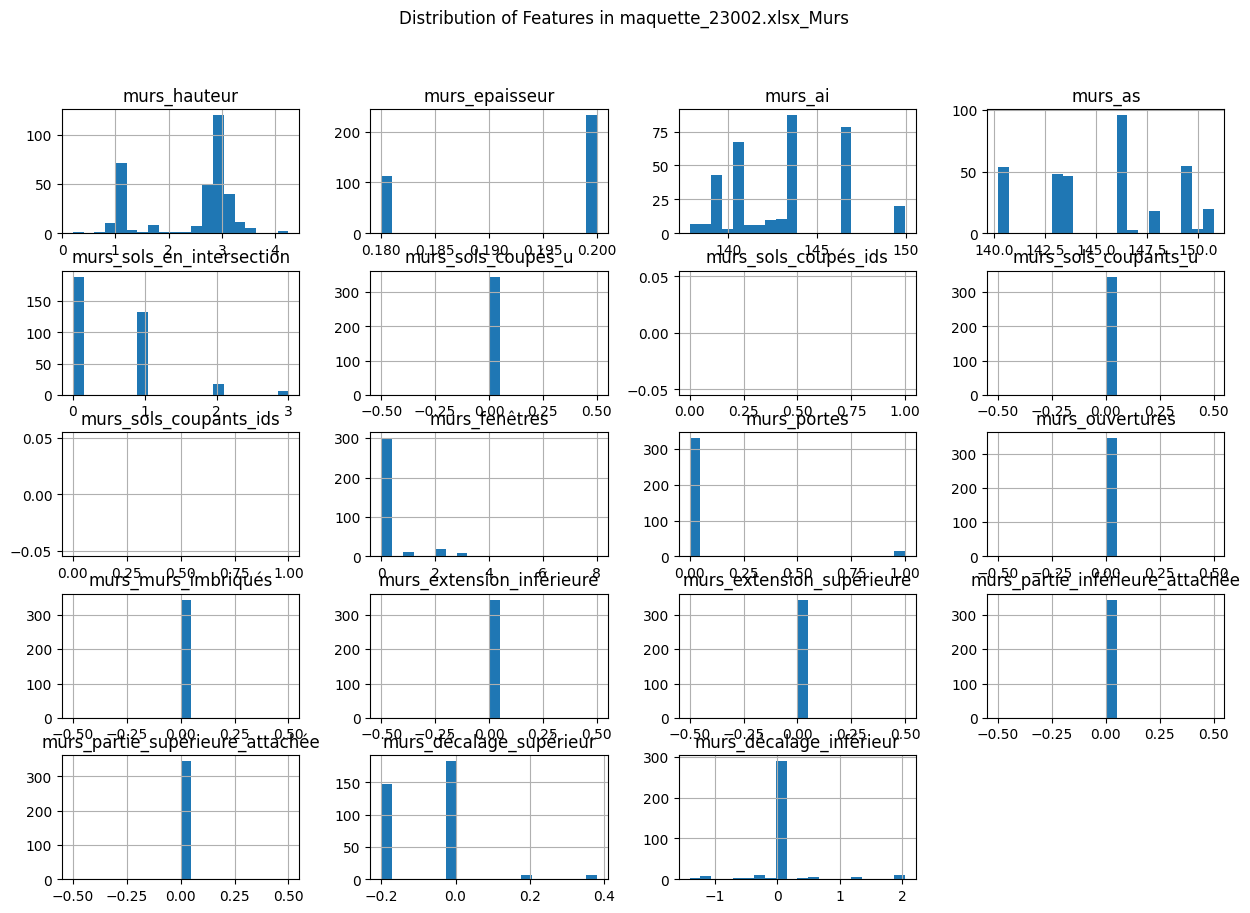

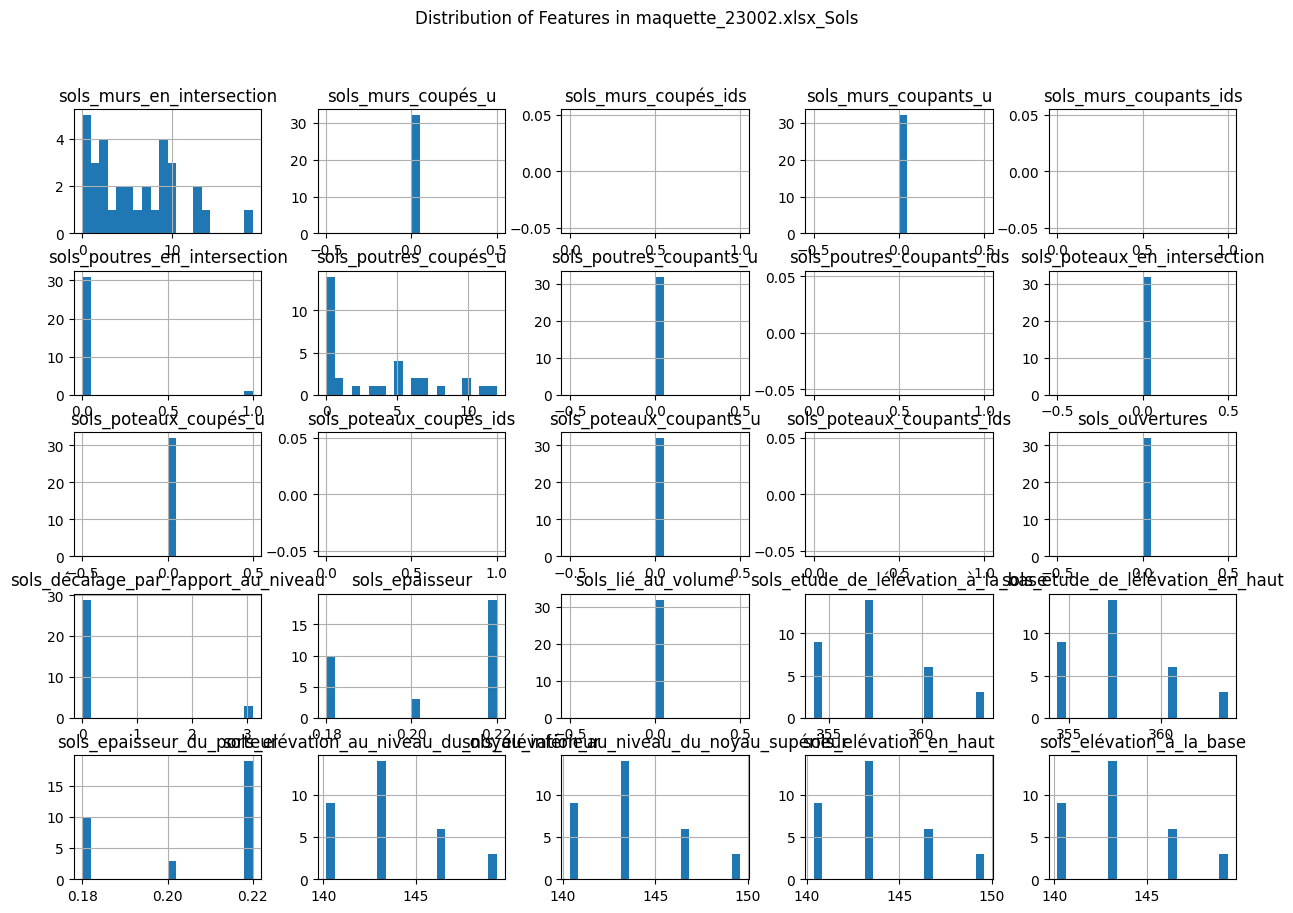

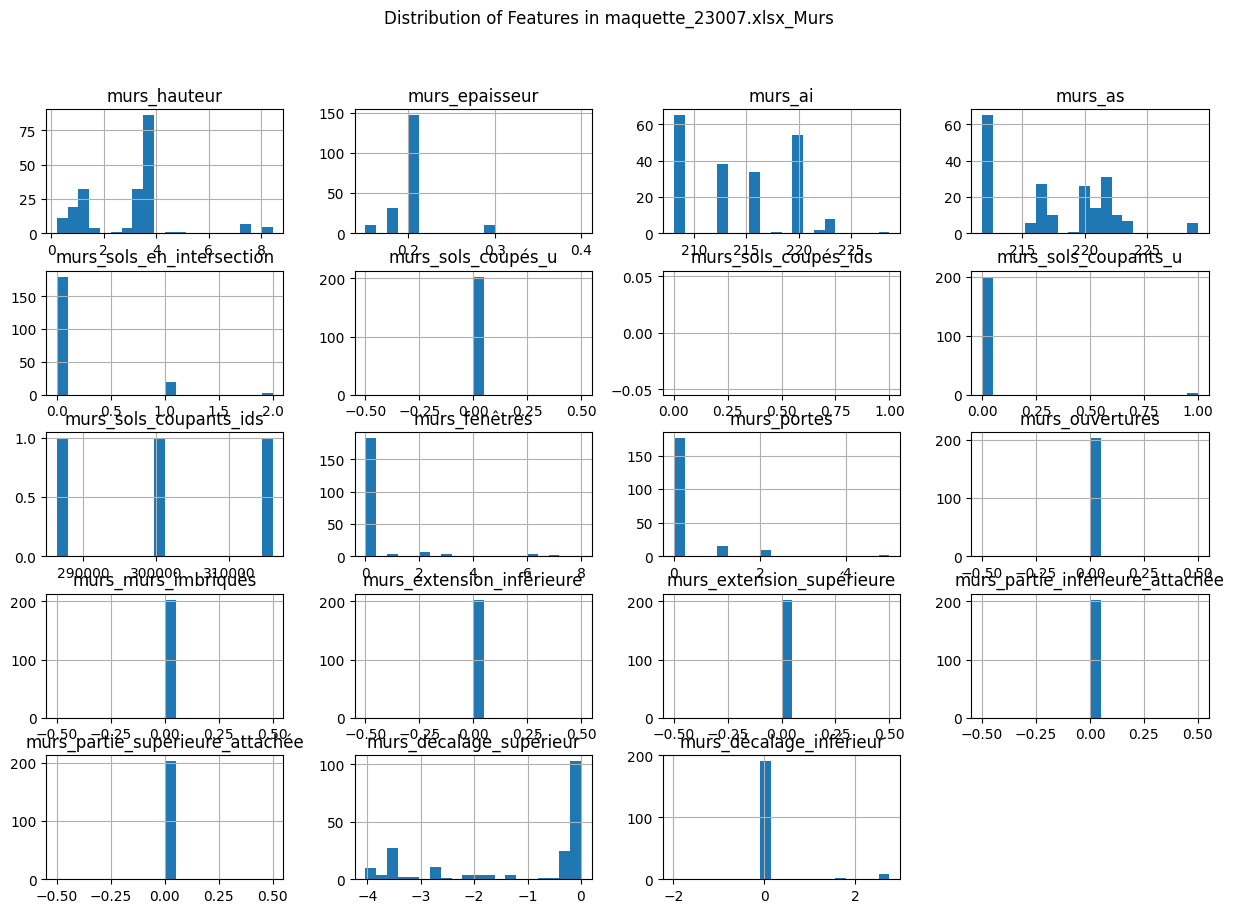

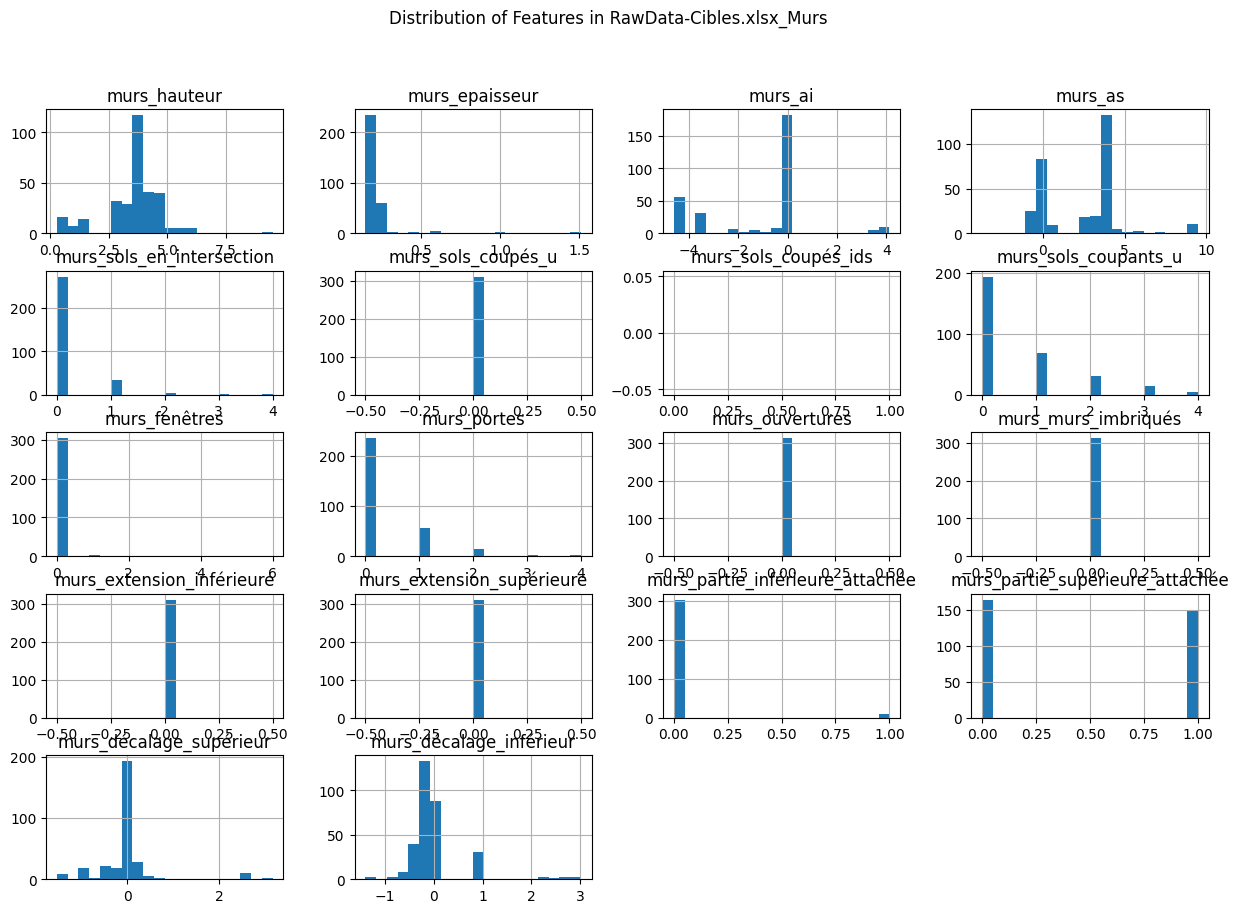

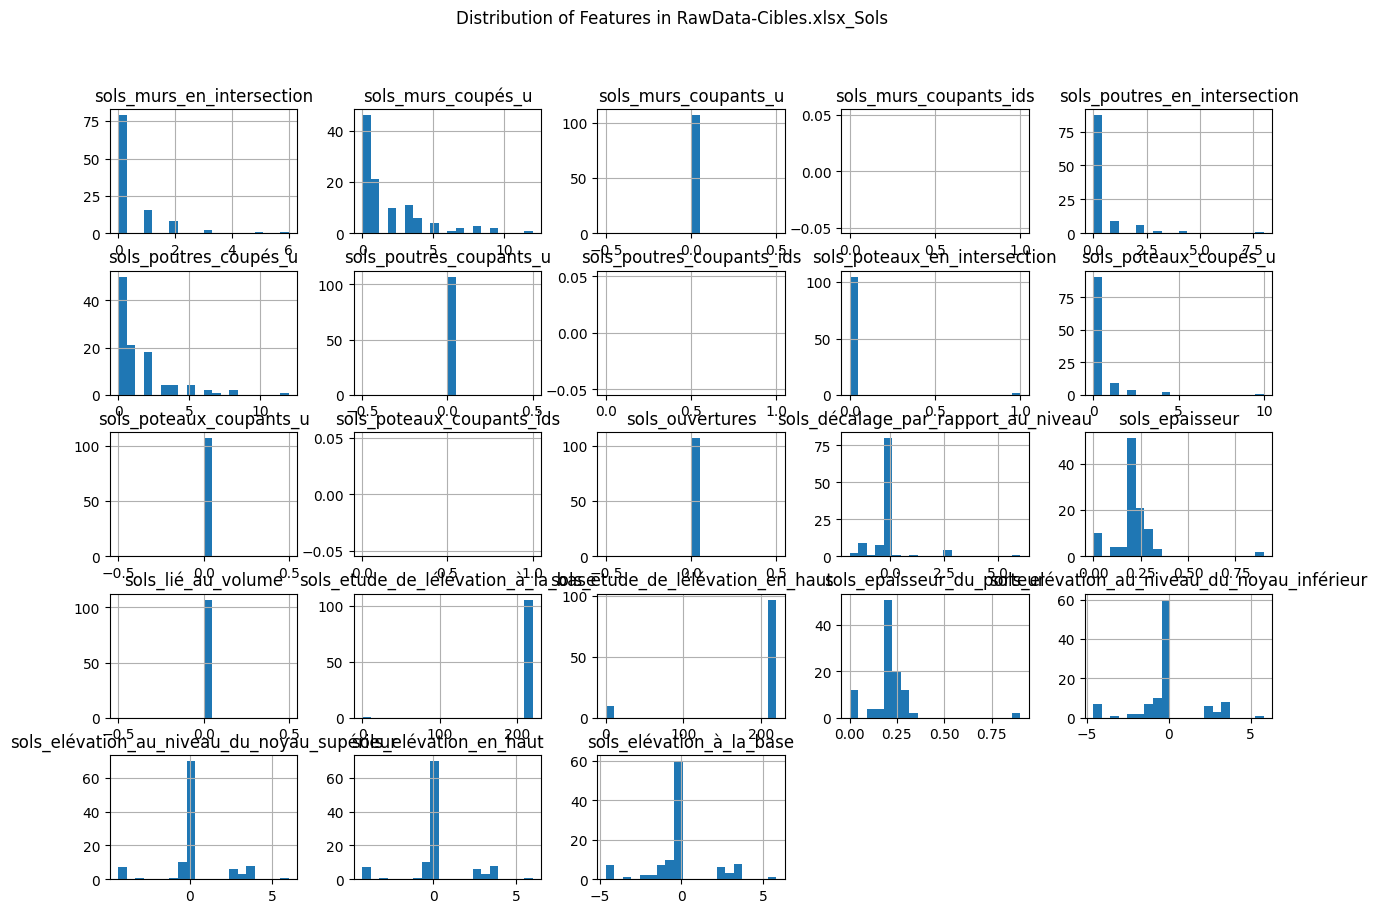

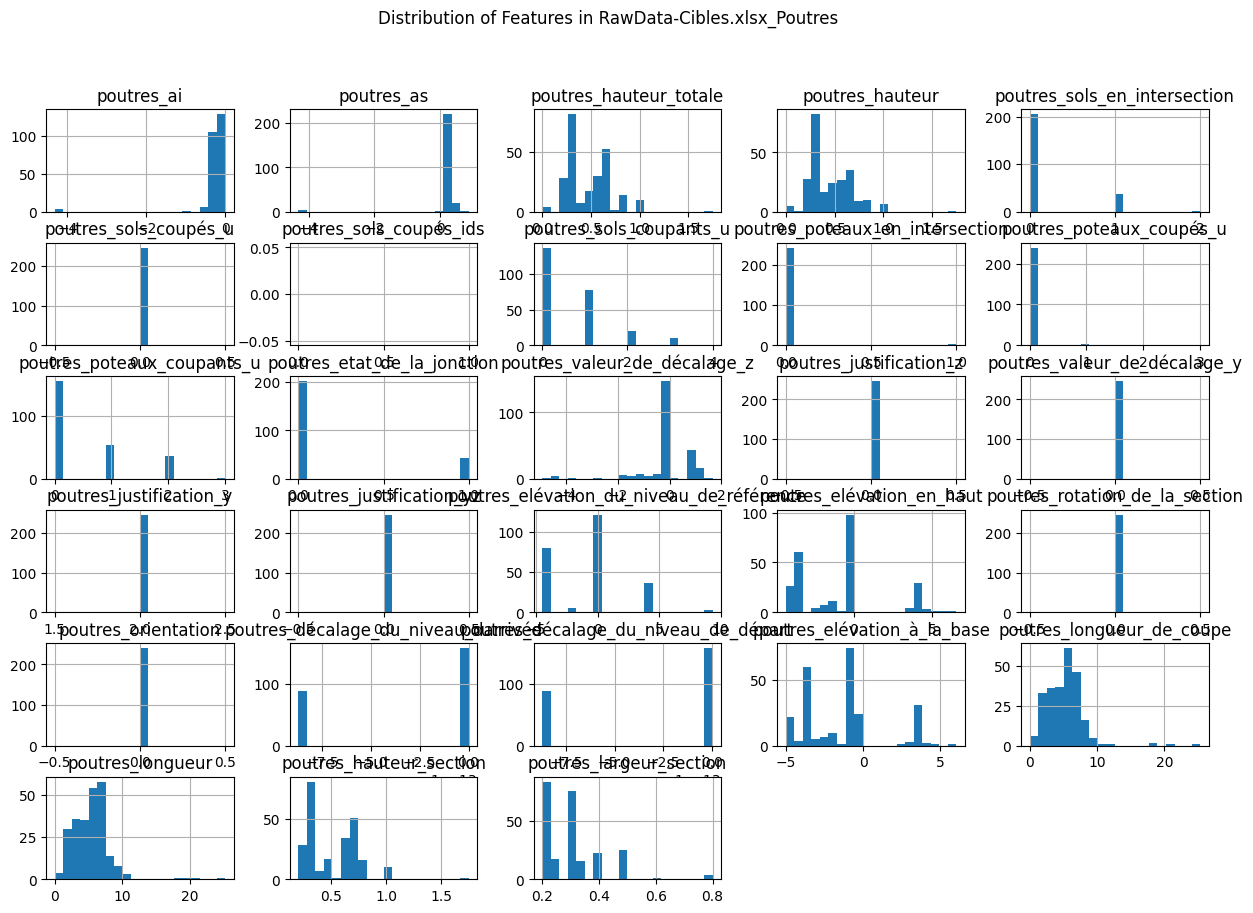

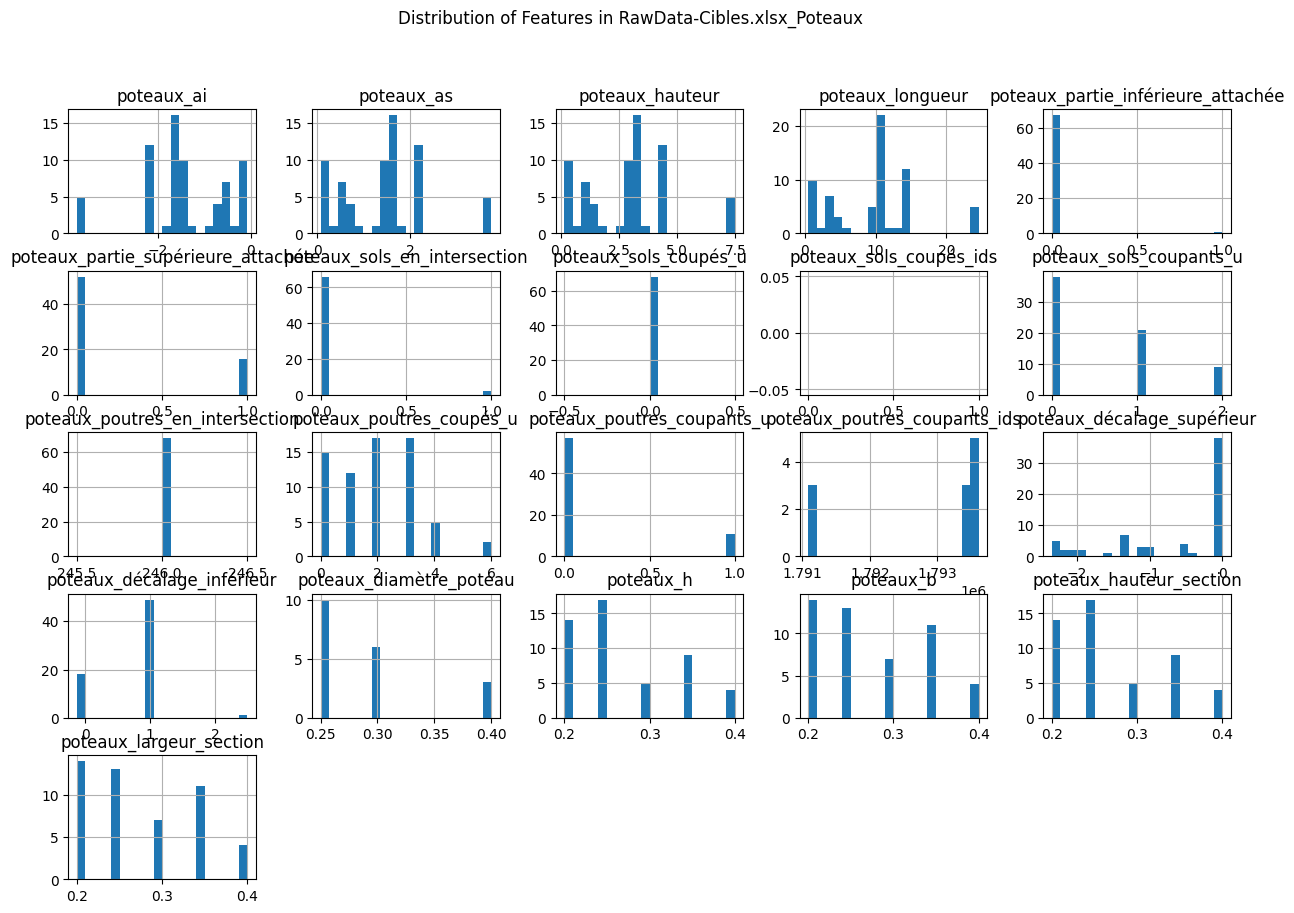

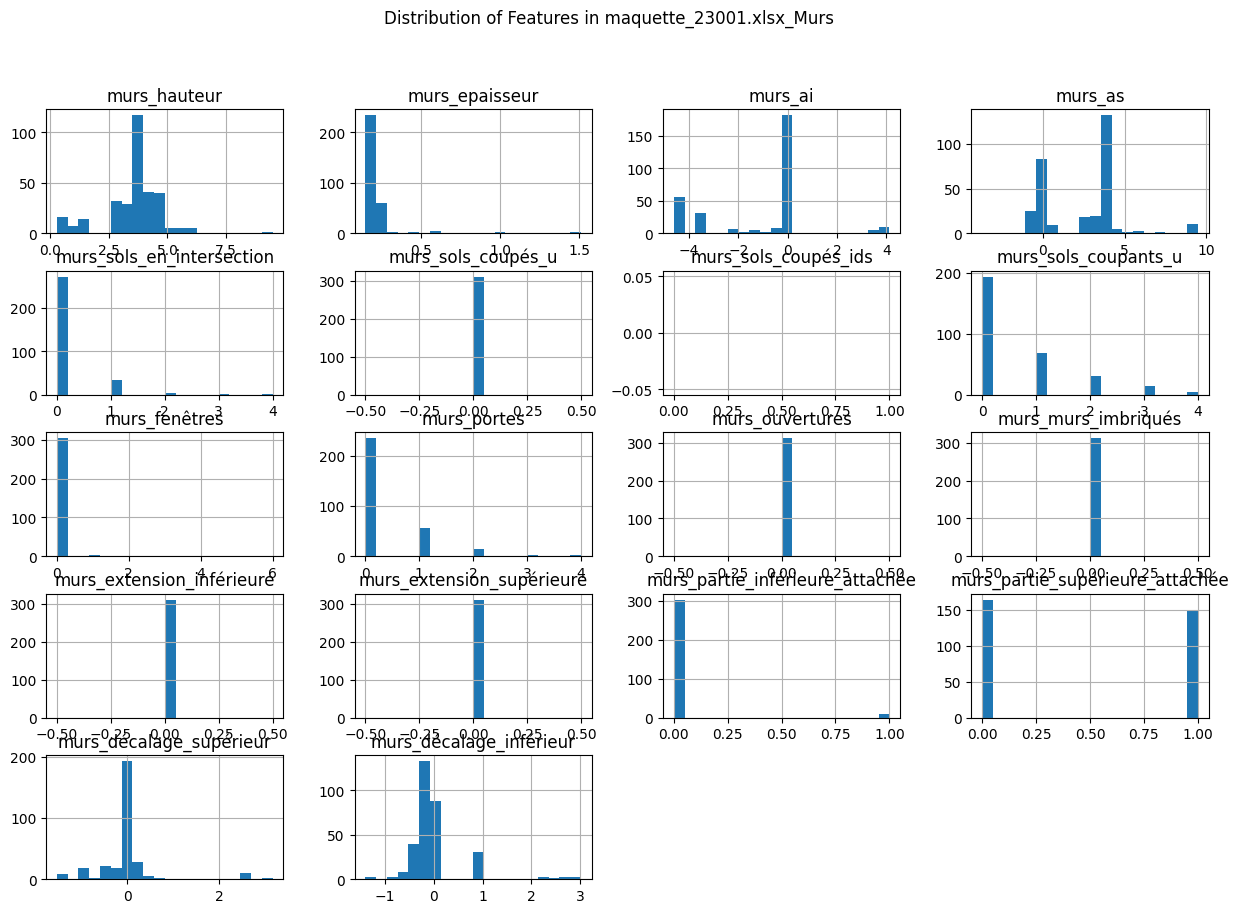

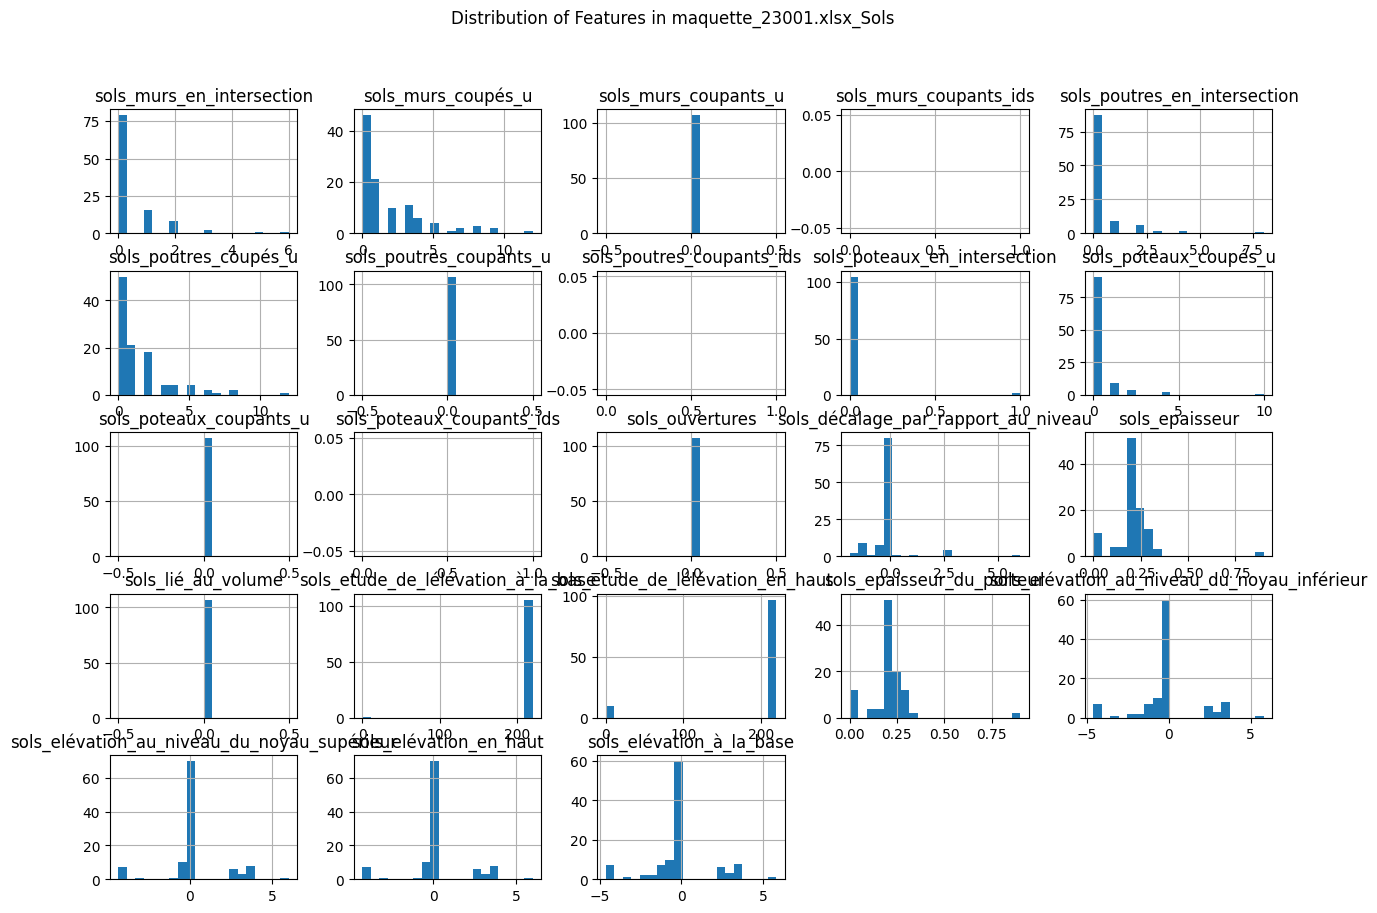

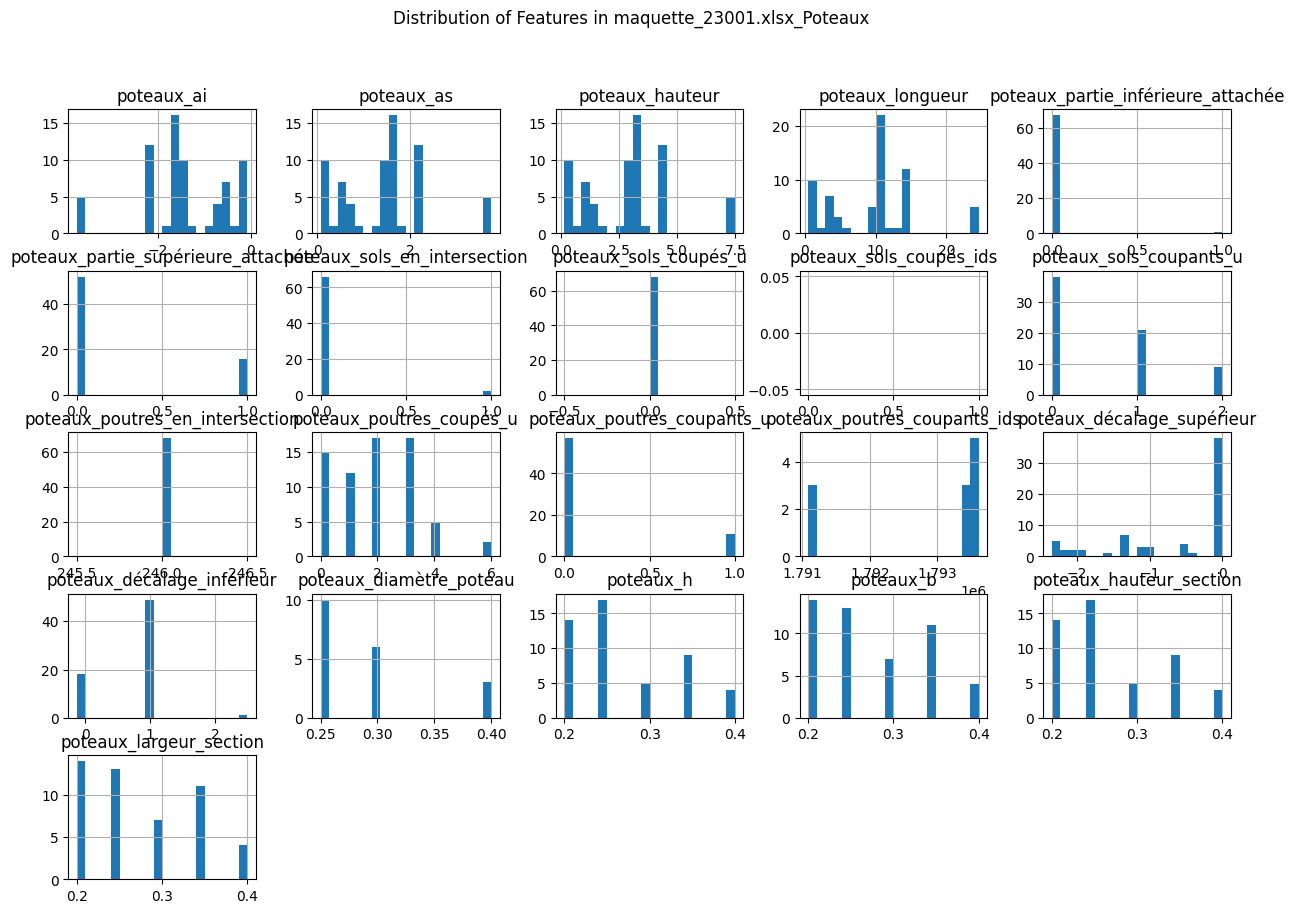

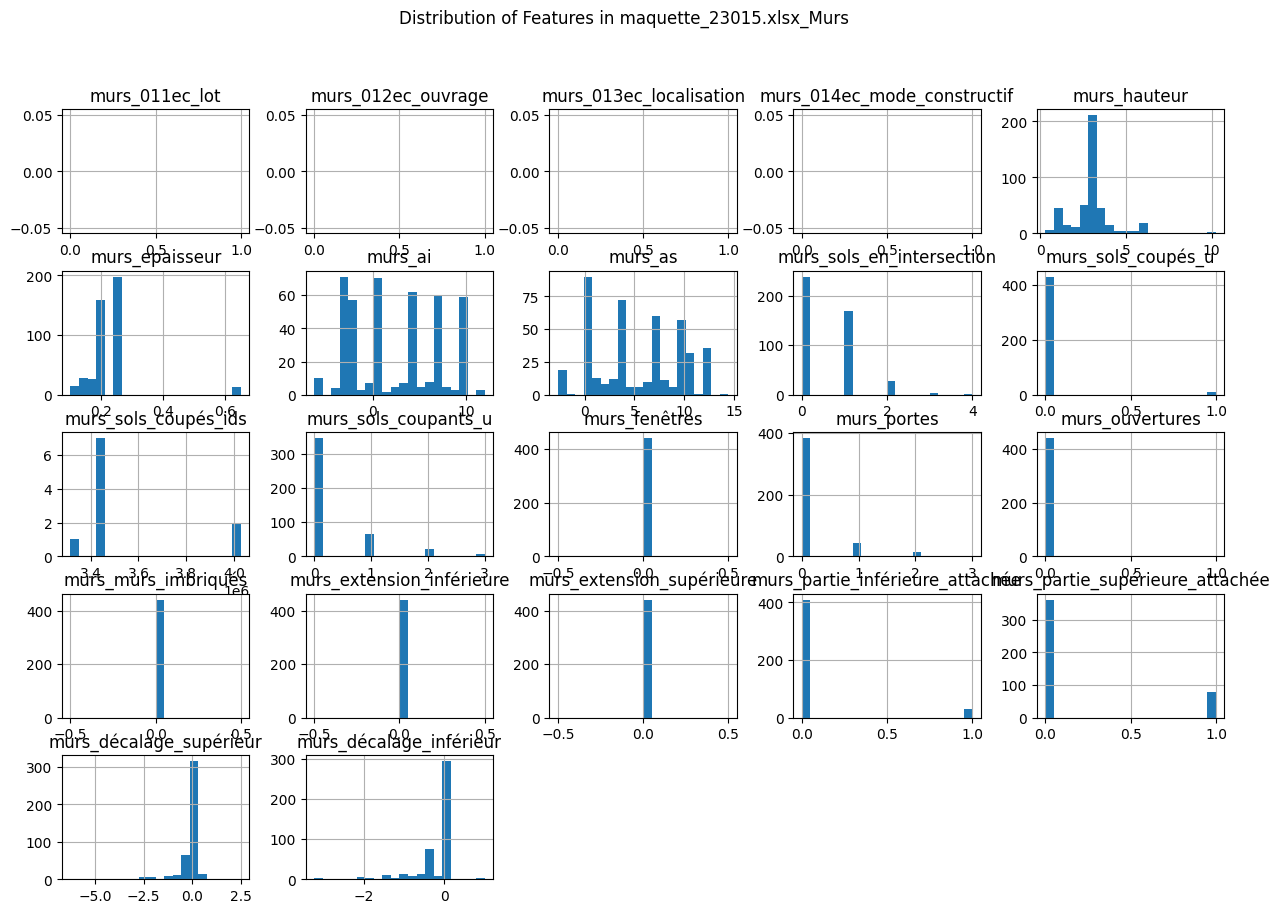

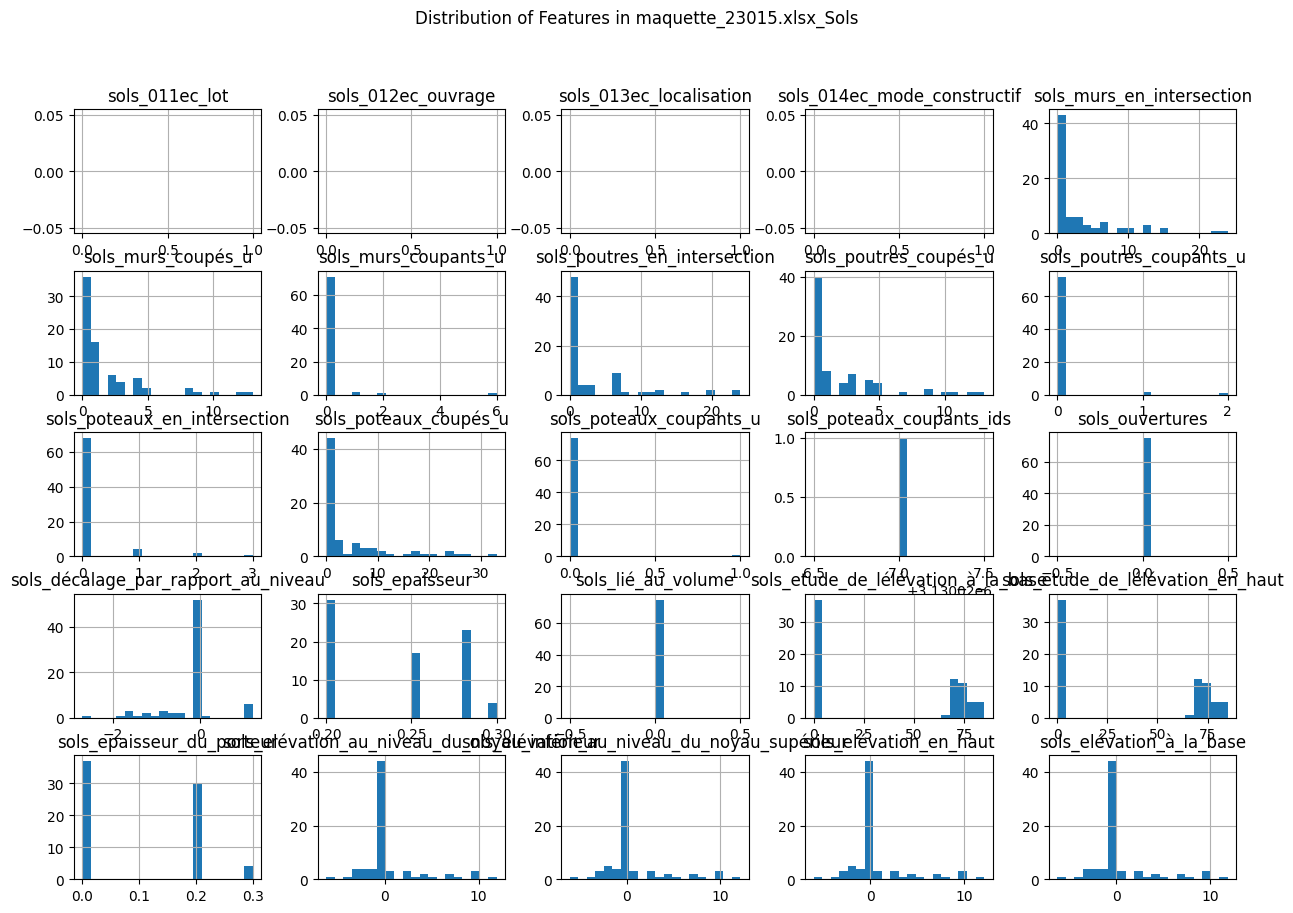

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
for df_name, df in cleaned_dataframes.items():
    df.hist(figsize=(15,10), bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")
    plt.show()

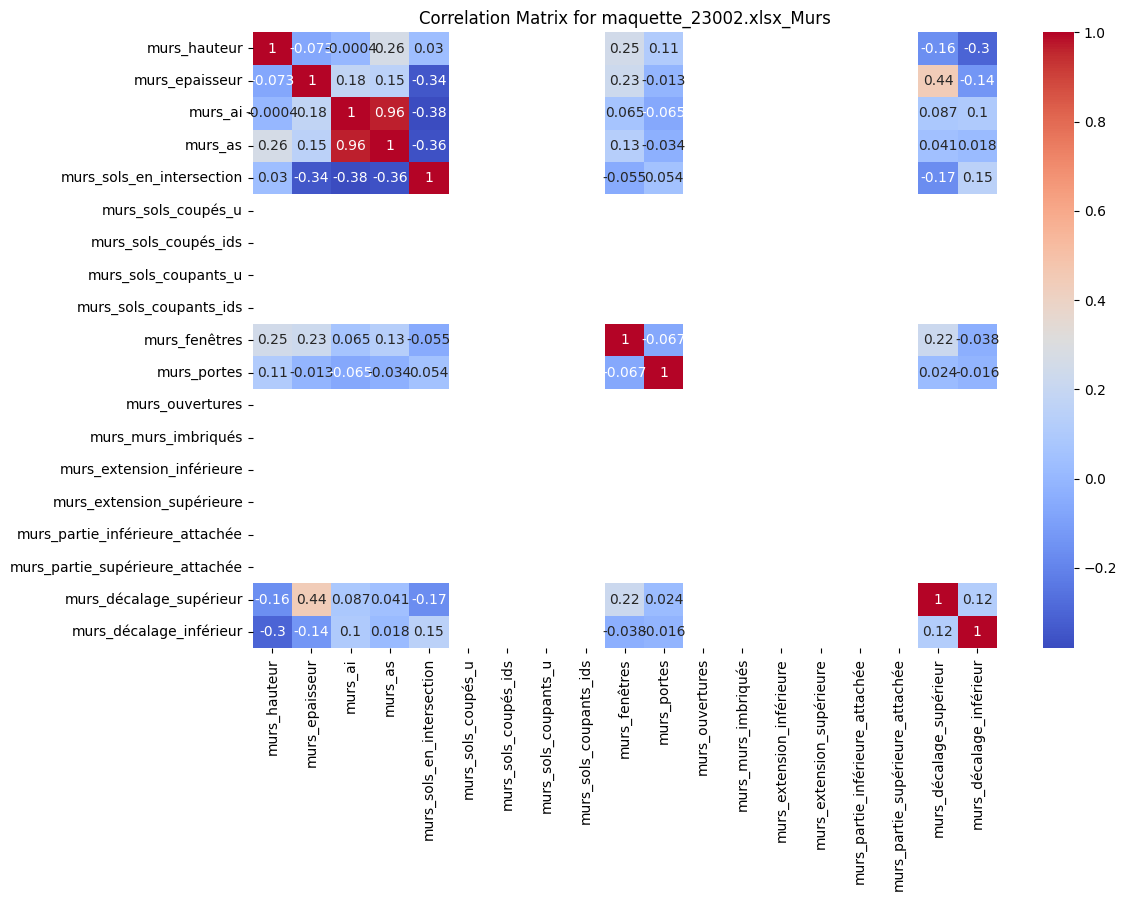

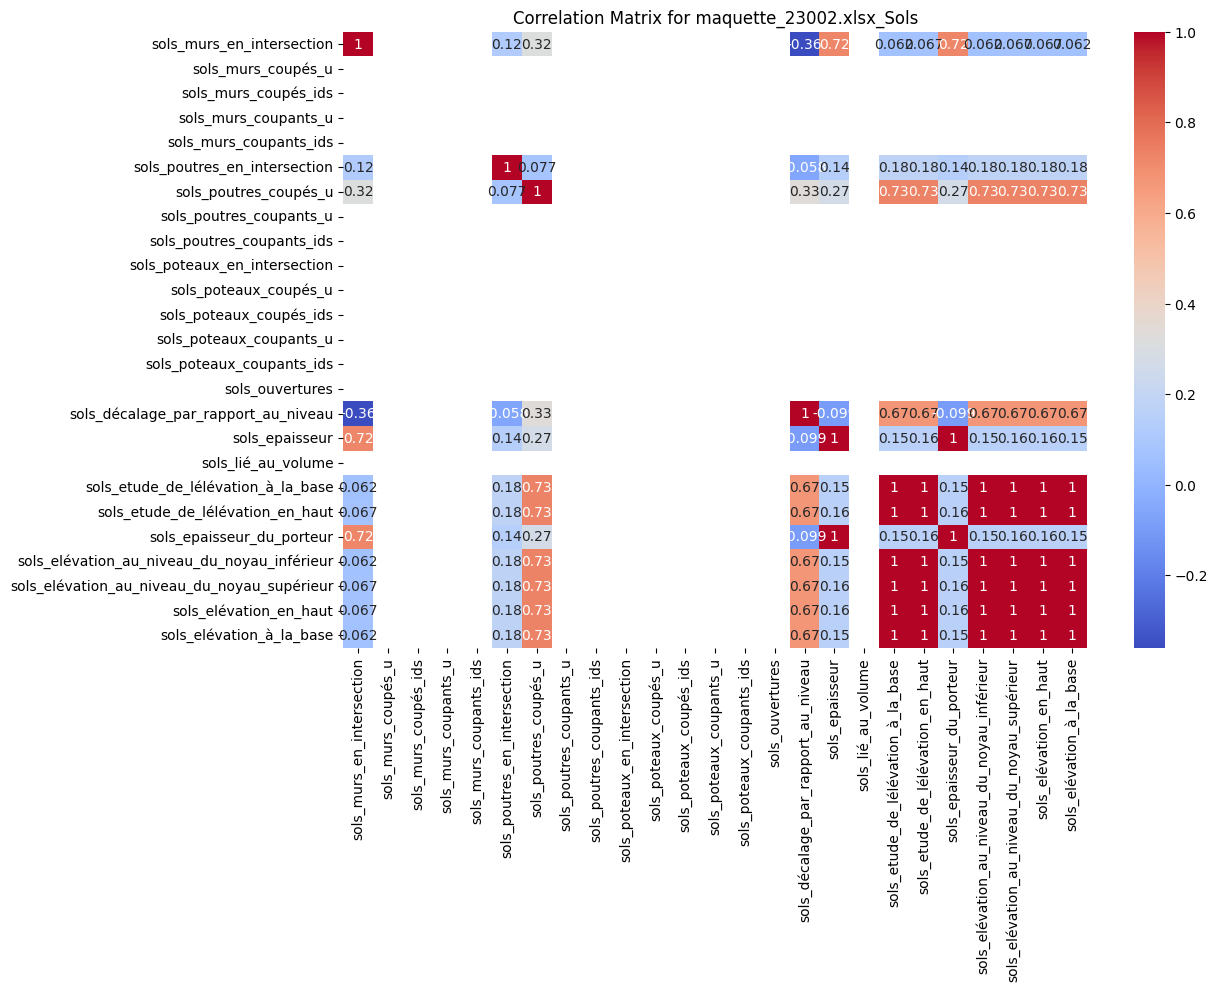

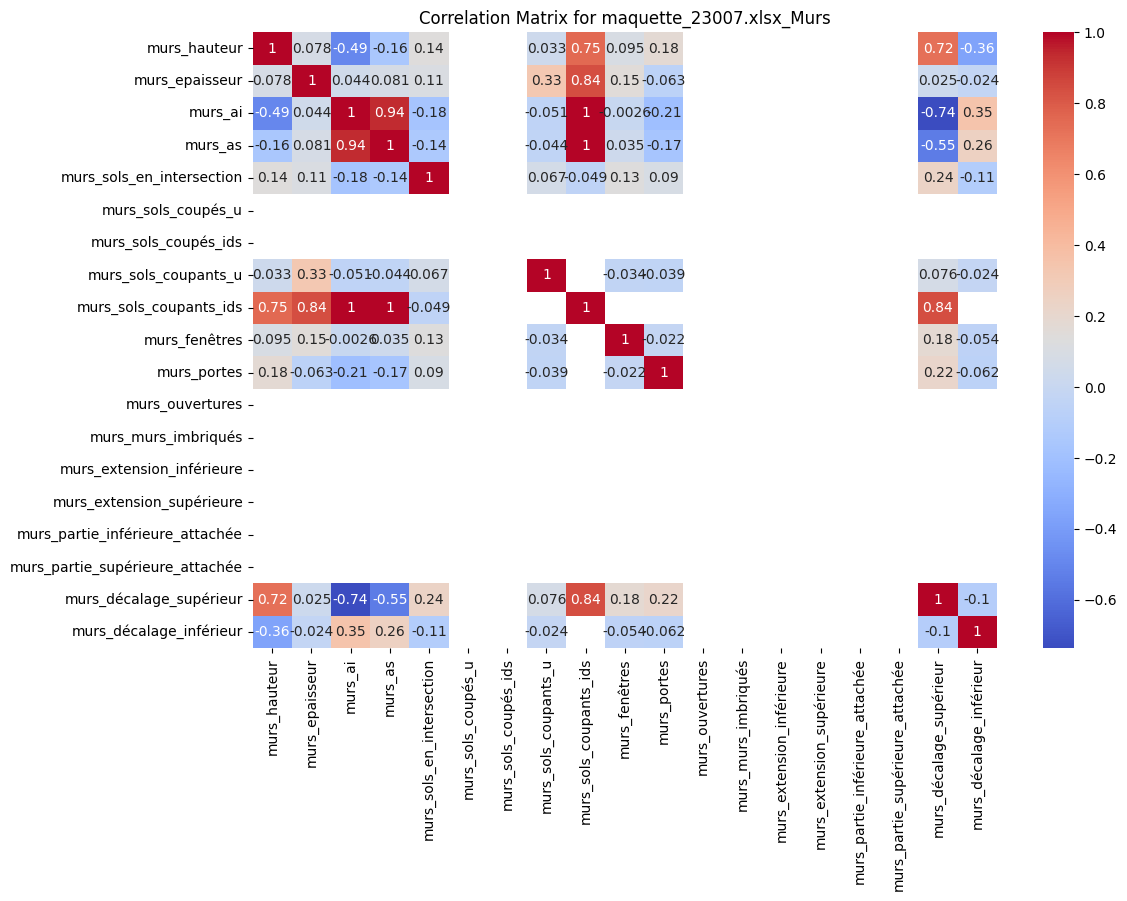

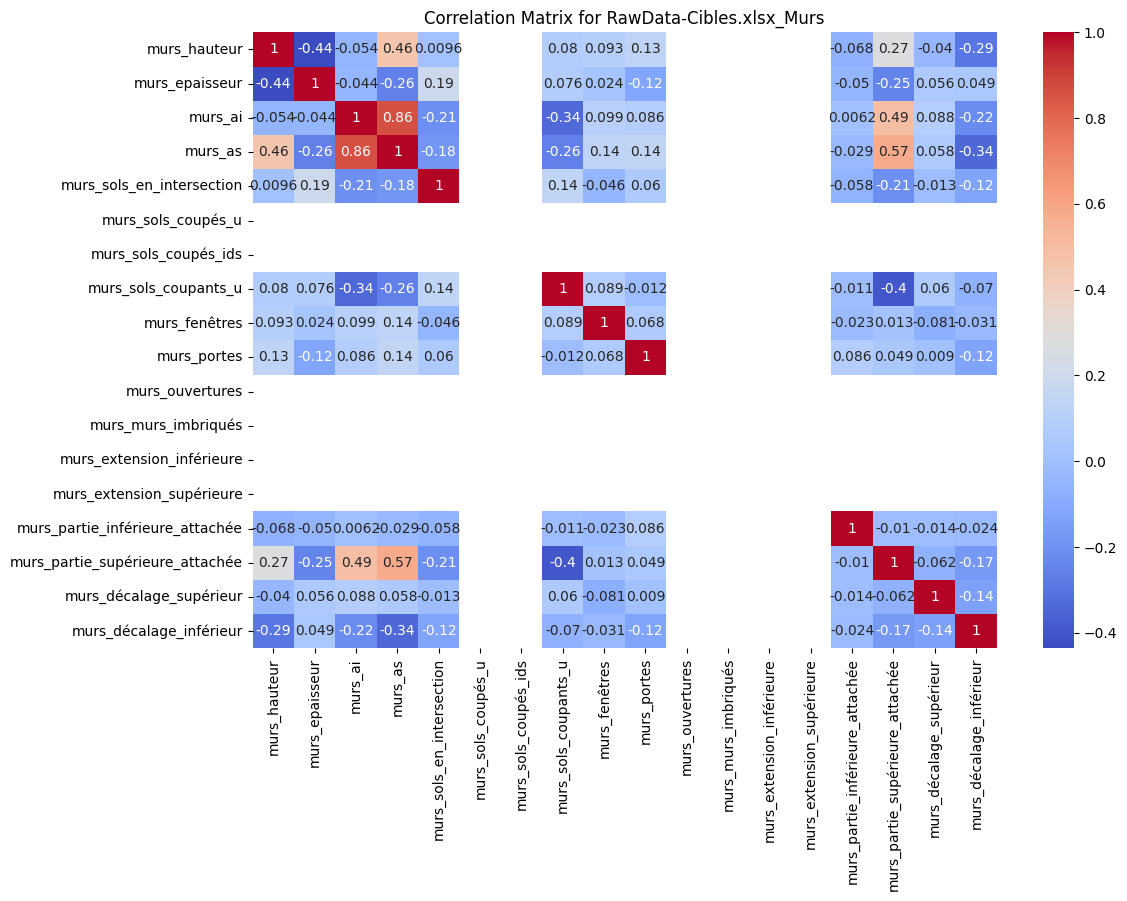

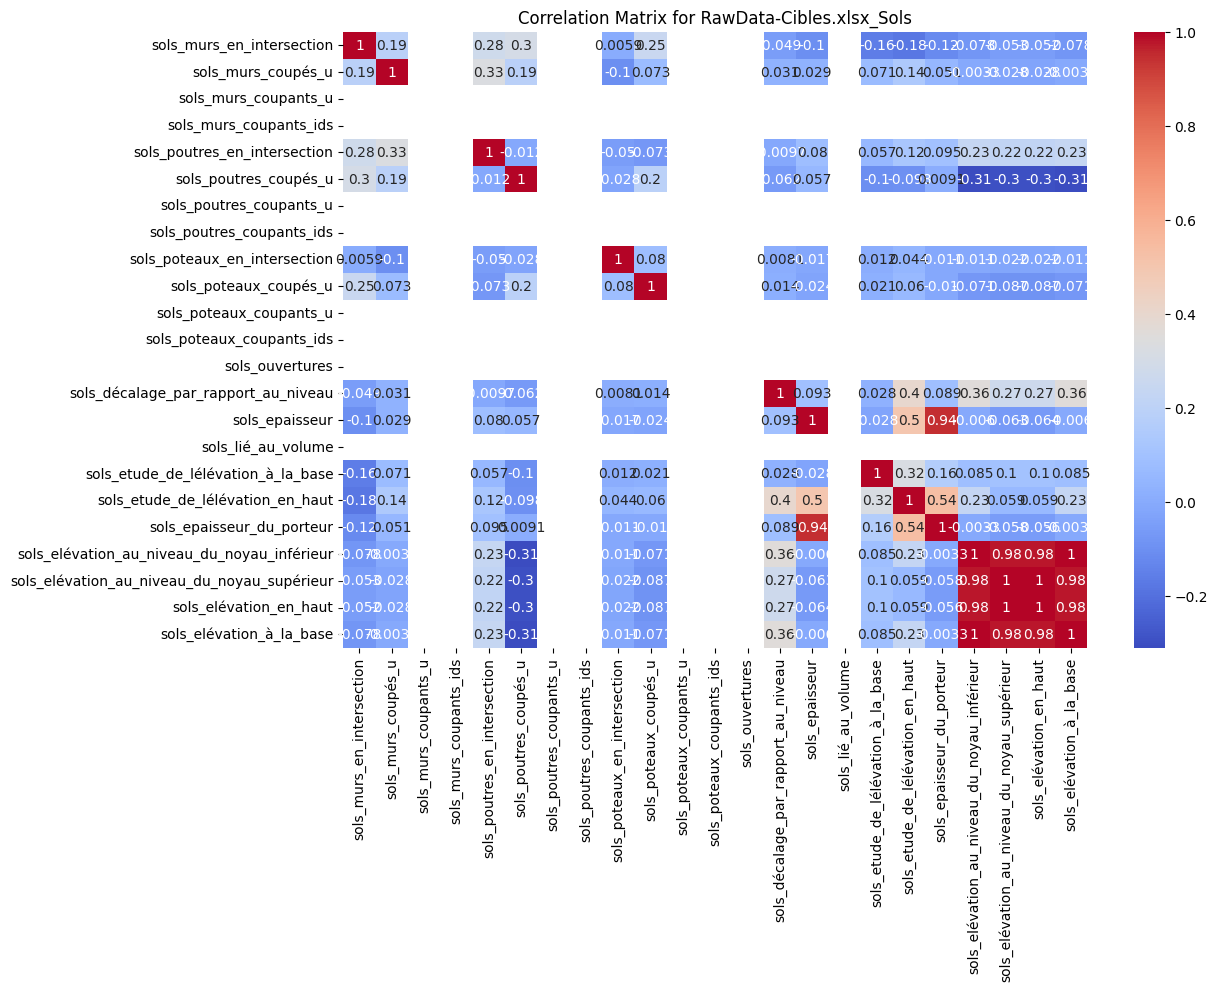

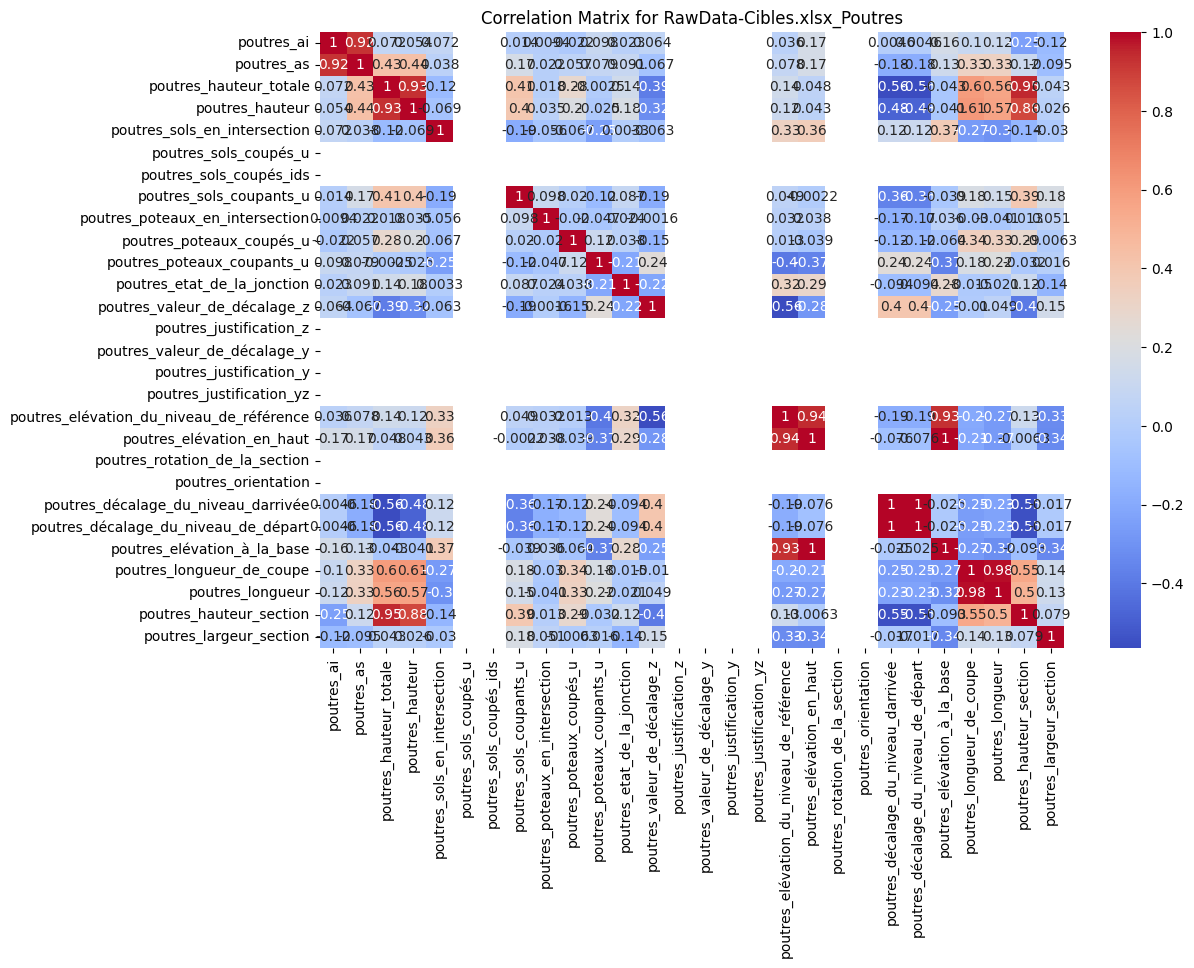

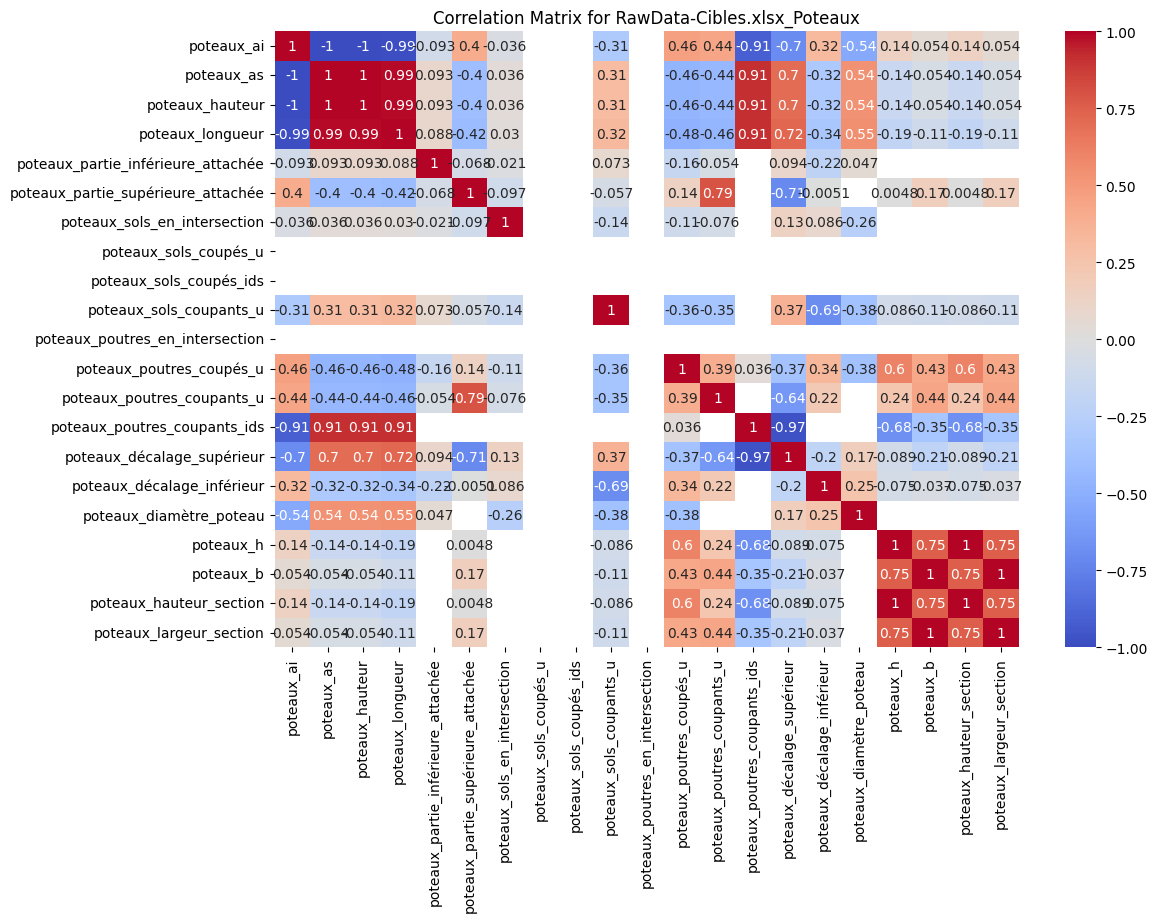

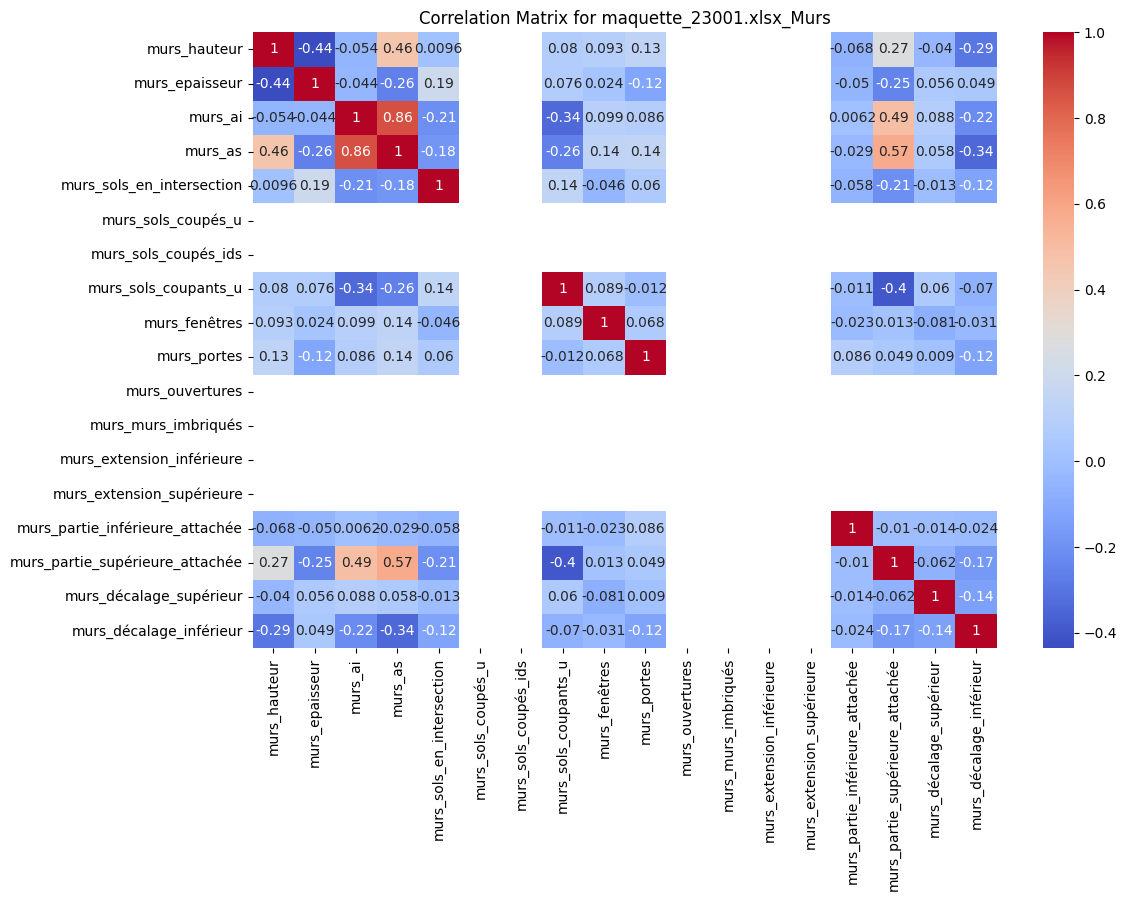

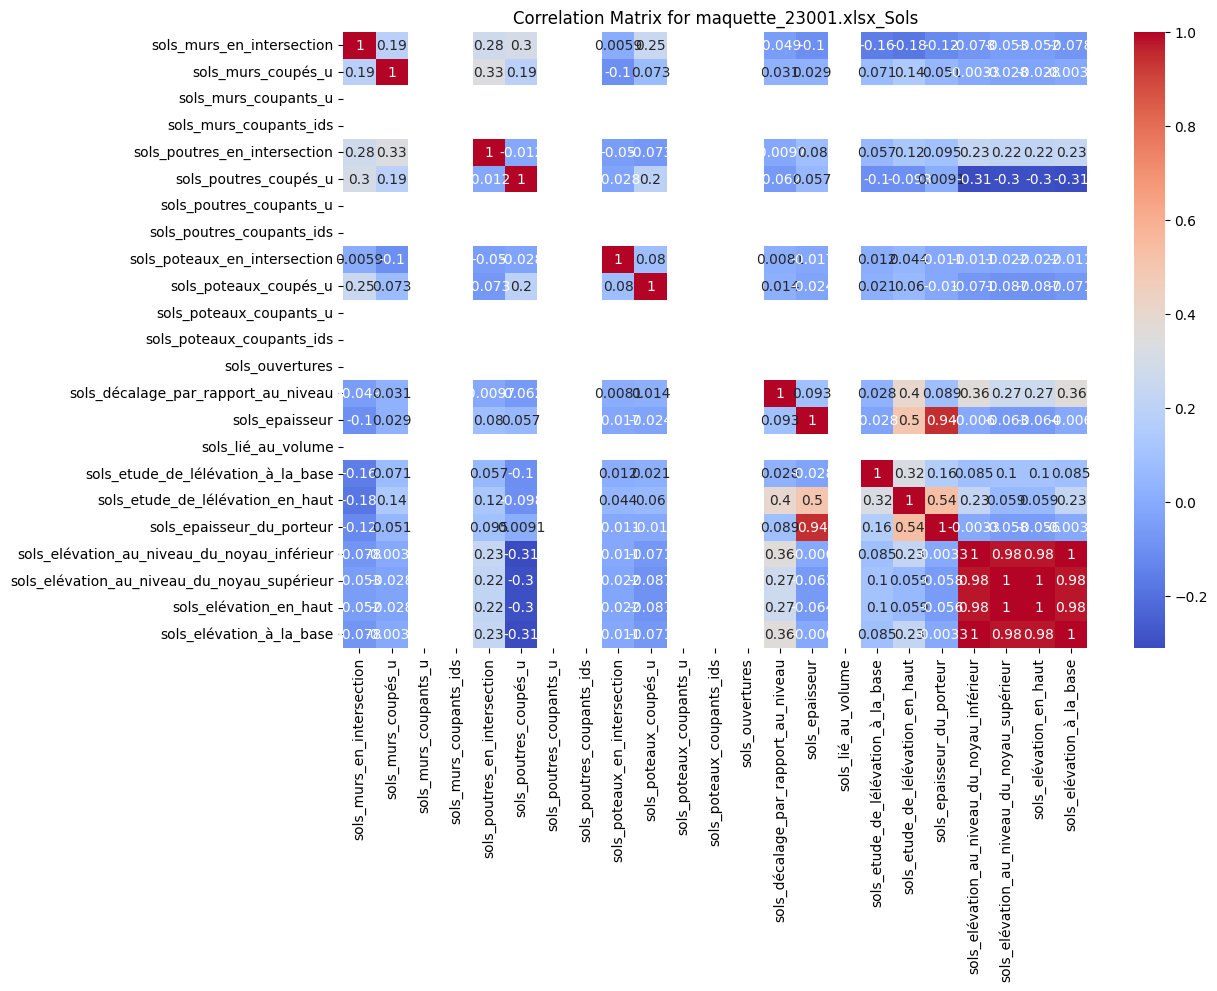

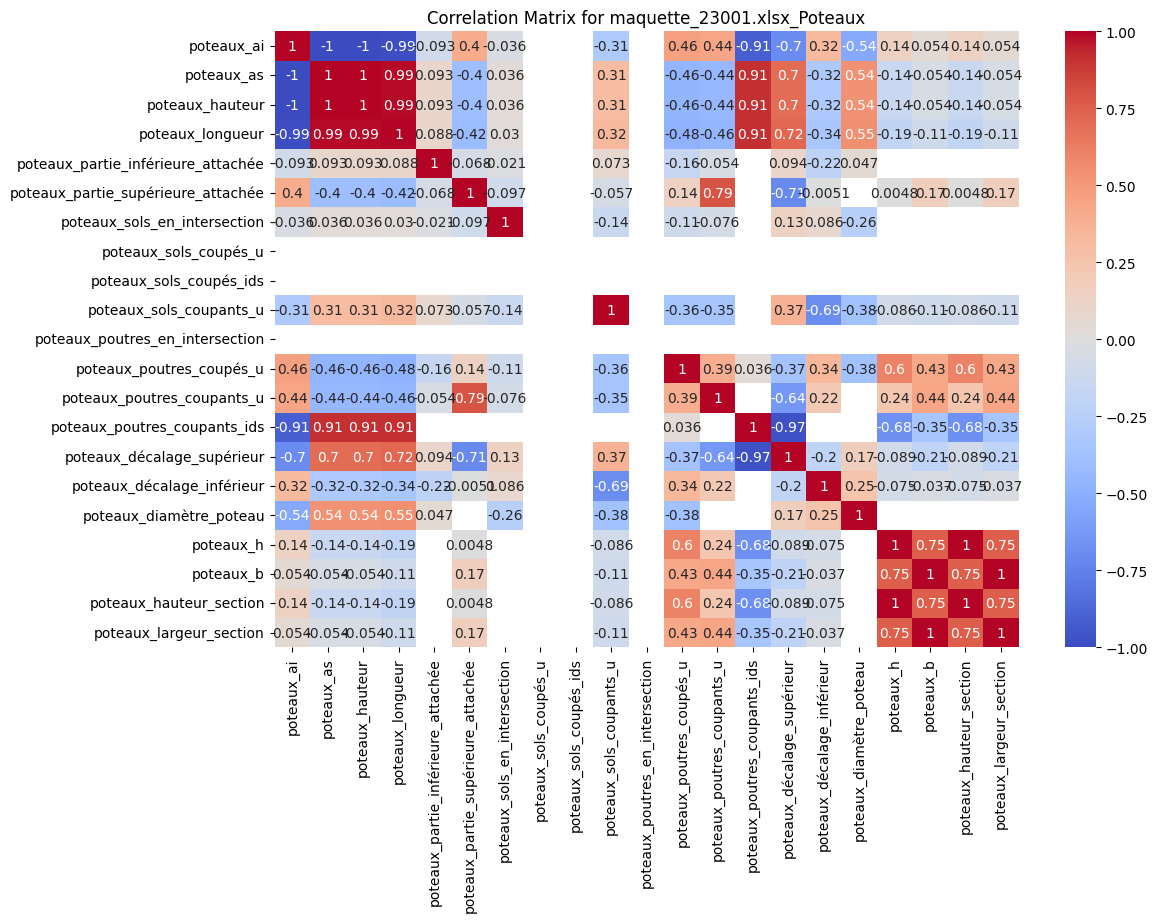

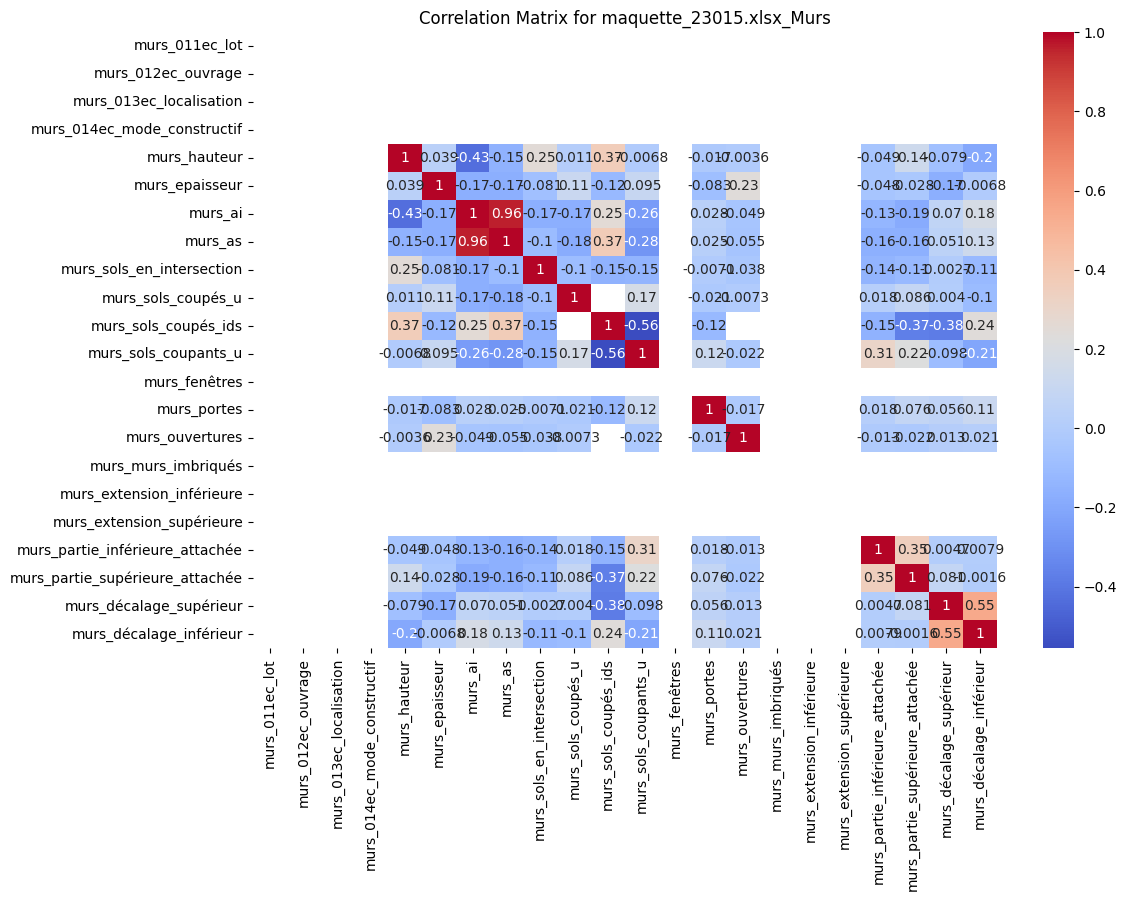

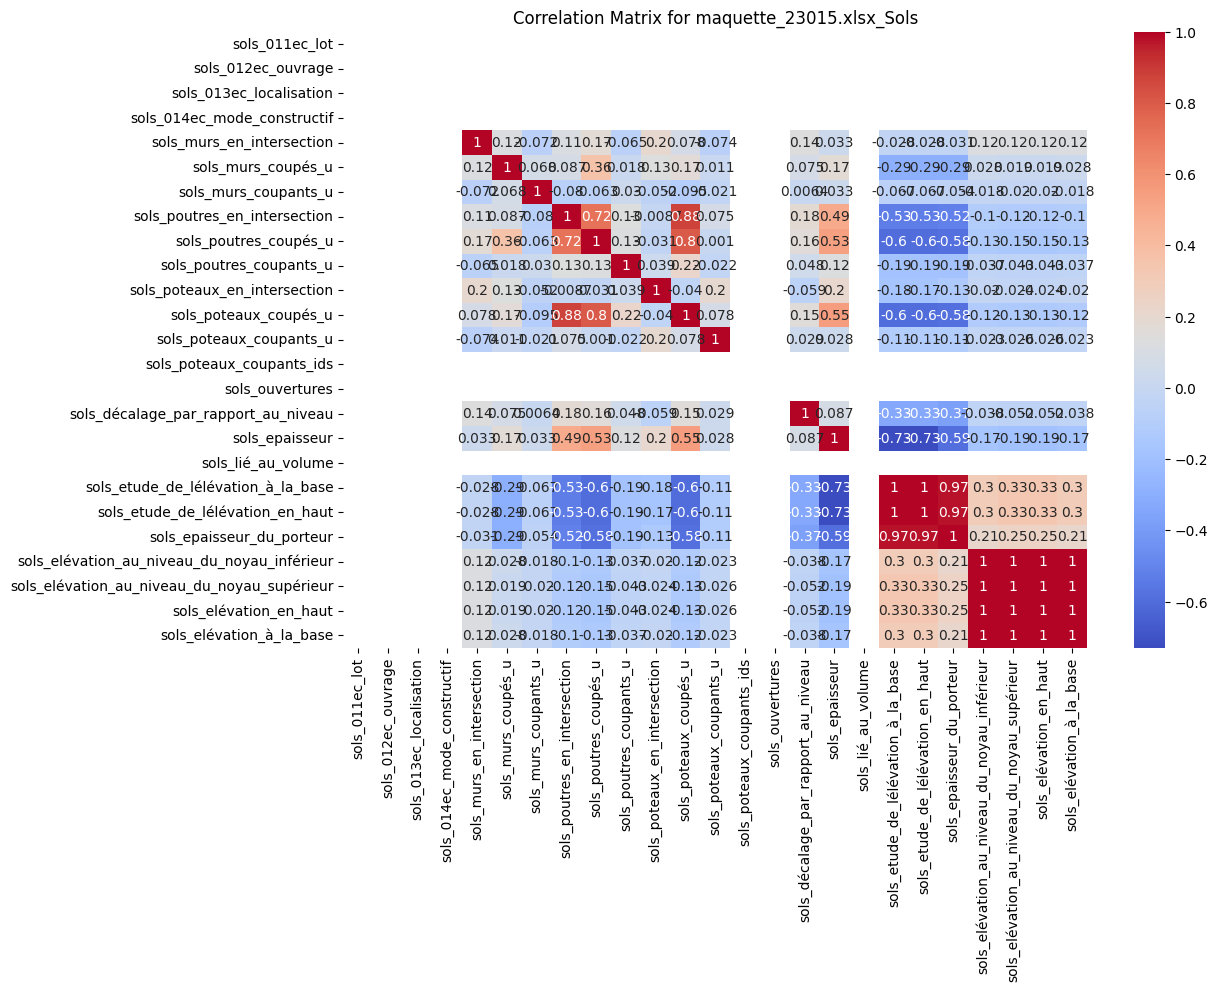

In [9]:
# Compute correlation matrices for numeric columns
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")
    plt.show()

In [10]:
import os

# Ensure base plots directory exists
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# Function to generate subfolder paths for each Excel file
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name.replace('.xlsx', '').replace('.xls', '')}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Save histograms
for df_name, df in cleaned_dataframes.items():
    plt.figure(figsize=(15, 10))
    df.hist(bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")

    # Extract the corresponding Excel file name
    file_name = df_name.split("_")[0]  # Extracts RawData_Cibles.xlsx from "RawData_Cibles.xlsx_Murs"
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_histogram.png")
    plt.savefig(plot_path)
    print(f"Saved histogram in: {plot_path}")

    plt.close()

# Save correlation matrices
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")

    # Extract Excel file name and subfolder
    file_name = df_name.split("_")[0]
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_correlation.png")
    plt.savefig(plot_path)
    print(f"Saved correlation matrix in: {plot_path}")

    plt.close()

Saved histogram in: BIMpredict_project/plots/maquette_Plots/maquette_23002.xlsx_Murs_histogram.png
Saved histogram in: BIMpredict_project/plots/maquette_Plots/maquette_23002.xlsx_Sols_histogram.png
Saved histogram in: BIMpredict_project/plots/maquette_Plots/maquette_23007.xlsx_Murs_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Murs_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Sols_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poutres_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poteaux_histogram.png
Saved histogram in: BIMpredict_project/plots/maquette_Plots/maquette_23001.xlsx_Murs_histogram.png
Saved histogram in: BIMpredict_project/plots/maquette_Plots/maquette_23001.xlsx_Sols_histogram.png
Saved histogram in: BIMpredict_project/plots/maquette_Plots/maquette_23001.xlsx

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<!-- ### Feature Selection -->

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Function to remove low-variance & highly correlated features
def optimize_feature_selection(df, variance_threshold=0.02, correlation_threshold=0.98):
    print(f"\n🔍 Processing {df.shape[0]} rows & {df.shape[1]} columns")

    # Step 1: Remove Low-Variance Features
    selector = VarianceThreshold(variance_threshold)
    numeric_df = df.select_dtypes(include=["number"])  # Focus only on numerical columns
    selector.fit(numeric_df)

    low_variance_cols = numeric_df.columns[~selector.get_support()]
    keep_cols = [col for col in low_variance_cols if any(keyword in col.lower() for keyword in ["coupés", "coupants"])]
    drop_cols = [col for col in low_variance_cols if col not in keep_cols and col not in TARGET_COLUMNS]

    df.drop(columns=drop_cols, inplace=True)
    print(f"⚠️ Dropped {len(drop_cols)} low-variance columns (excluding 'coupés' and target columns): {drop_cols}")

    # Step 2: Remove Highly Correlated Features
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    correlated_features = [
        col for col in upper_triangle.columns
        if any(upper_triangle[col] > correlation_threshold) and col not in TARGET_COLUMNS
    ]

    df.drop(columns=correlated_features, inplace=True)
    print(f"⚠️ Dropped {len(correlated_features)} highly correlated columns (excluding target columns): {correlated_features}")

    print(f"✅ Final shape after filtering: {df.shape}")
    return df

# Apply optimized feature selection to all datasets
final_cleaned_dataframes = {name: optimize_feature_selection(df) for name, df in final_cleaned_dataframes.items()}

print("🚀 Optimized feature selection completed successfully!")


🔍 Processing 115 rows & 29 columns
⚠️ Dropped 7 low-variance columns (excluding 'coupés' and target columns): ['murs_epaisseur', 'murs_ouvertures', 'murs_murs_imbriqués', 'murs_extension_inférieure', 'murs_extension_supérieure', 'murs_partie_inférieure_attachée', 'murs_partie_supérieure_attachée']
⚠️ Dropped 0 highly correlated columns (excluding target columns): []
✅ Final shape after filtering: (115, 22)

🔍 Processing 30 rows & 33 columns
⚠️ Dropped 5 low-variance columns (excluding 'coupés' and target columns): ['sols_poteaux_en_intersection', 'sols_ouvertures', 'sols_epaisseur', 'sols_lié_au_volume', 'sols_epaisseur_du_porteur']
⚠️ Dropped 5 highly correlated columns (excluding target columns): ['sols_etude_de_lélévation_en_haut', 'sols_elévation_au_niveau_du_noyau_inférieur', 'sols_elévation_au_niveau_du_noyau_supérieur', 'sols_elévation_en_haut', 'sols_elévation_à_la_base']
✅ Final shape after filtering: (30, 23)

🔍 Processing 111 rows & 29 columns
⚠️ Dropped 7 low-variance colu

In [12]:
# %pip install ipywidgets

In [13]:
# Identify target columns dynamically across all DataFrames
target_columns_found = set()
for df_name, df in final_cleaned_dataframes.items():
    found_targets = [
        col for col in df.columns
        if any(target.lower() in col.lower() for target in TARGET_COLUMNS)
    ]
    target_columns_found.update(found_targets)

print(f"\nTarget columns detected across datasets: {target_columns_found}")


Target columns detected across datasets: {'poteaux_012ec_ouvrage', 'poteaux_013ec_localisation', 'murs_013ec_localisation', 'sols_011ec_lot', 'murs_014ec_mode_constructif', 'poteaux_011ec_lot', 'sols_014ec_mode_constructif', 'poutres_013ec_localisation', 'murs_011ec_lot', 'poutres_014ec_mode_constructif', 'murs_012ec_ouvrage', 'poutres_011ec_lot', 'poteaux_014ec_mode_constructif', 'poutres_012ec_ouvrage', 'sols_012ec_ouvrage', 'sols_013ec_localisation'}


In [14]:
import os

# Function to generate subfolder paths for storing SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# ✅ Ensure SHAP is applied to the fully processed dataset
final_shap_dataframes = final_cleaned_dataframes  # Use the cleaned dataset after variance/correlation removal

print("🚀 SHAP analysis will now use the final processed data!")

for target_column in TARGET_COLUMNS:
    for df_name, df in final_cleaned_dataframes.items():
        # Check if any column in the dataframe contains the target column name as a substring
        matching_columns = [col for col in df.columns if target_column in col]
        if matching_columns:
            unique_values = df[matching_columns[0]].nunique()
            print(f"{target_column} in {df_name} has {unique_values} unique values.")
        else:
            print(f"{target_column} not found in {df_name}.")

🚀 SHAP analysis will now use the final processed data!
011ec_lot in maquette_23002.xlsx_Murs has 1 unique values.
011ec_lot in maquette_23002.xlsx_Sols has 1 unique values.
011ec_lot in maquette_23007.xlsx_Murs has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Murs has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Sols has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Poutres has 2 unique values.
011ec_lot in RawData-Cibles.xlsx_Poteaux has 1 unique values.
011ec_lot in maquette_23001.xlsx_Murs has 1 unique values.
011ec_lot in maquette_23001.xlsx_Sols has 1 unique values.
011ec_lot in maquette_23001.xlsx_Poteaux has 1 unique values.
011ec_lot not found in maquette_23015.xlsx_Murs.
011ec_lot not found in maquette_23015.xlsx_Sols.
012ec_ouvrage in maquette_23002.xlsx_Murs has 1 unique values.
012ec_ouvrage in maquette_23002.xlsx_Sols has 2 unique values.
012ec_ouvrage in maquette_23007.xlsx_Murs has 6 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Murs has 7 unique valu


Processing SHAP for maquette_23002.xlsx_Murs...
🎯 Target columns found in maquette_23002.xlsx_Murs: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']
🔍 Analyzing SHAP for target: murs_011ec_lot
📌 Initial shape before SHAP processing: (115, 22)
📊 SHAP values shape: 115, Feature matrix shape: (115, 18)


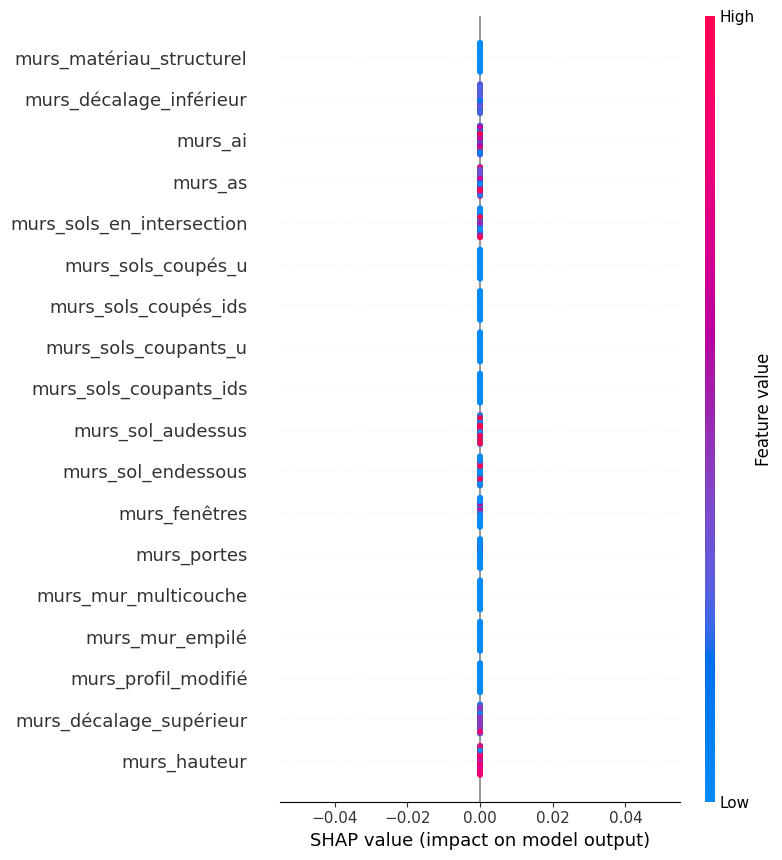

✅ Saved SHAP plot for murs_011ec_lot in: plots/SHAP_maquette_23002.xlsx_Murs_Plots/murs_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (115, 18)
🔍 Analyzing SHAP for target: murs_012ec_ouvrage
📌 Initial shape before SHAP processing: (115, 22)
📊 SHAP values shape: 115, Feature matrix shape: (115, 18)


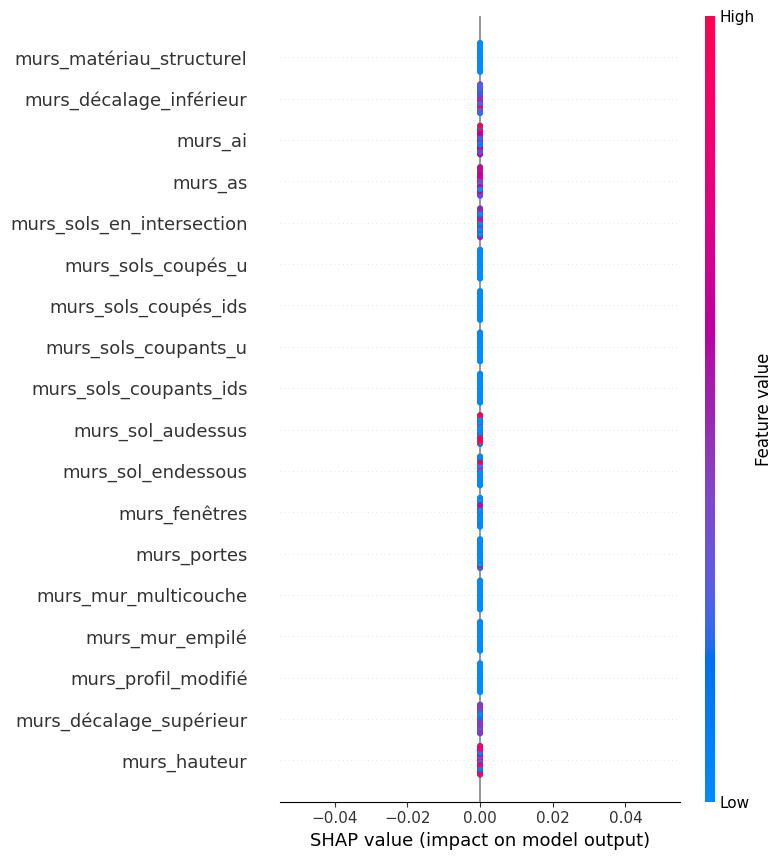

✅ Saved SHAP plot for murs_012ec_ouvrage in: plots/SHAP_maquette_23002.xlsx_Murs_Plots/murs_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (115, 18)
🔍 Analyzing SHAP for target: murs_013ec_localisation
📌 Initial shape before SHAP processing: (115, 22)
📊 SHAP values shape: 115, Feature matrix shape: (115, 18)


<Figure size 640x480 with 0 Axes>

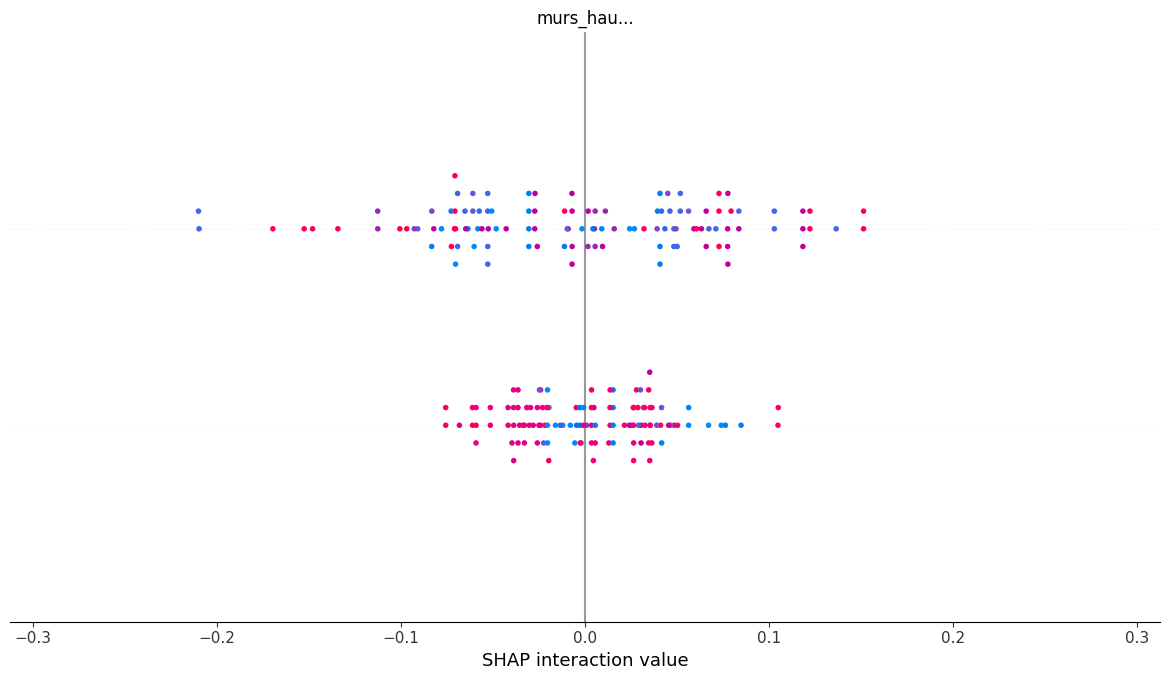

✅ Saved SHAP plot for murs_013ec_localisation in: plots/SHAP_maquette_23002.xlsx_Murs_Plots/murs_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (115, 18)
🔍 Analyzing SHAP for target: murs_014ec_mode_constructif
📌 Initial shape before SHAP processing: (115, 22)
📊 SHAP values shape: 115, Feature matrix shape: (115, 18)


<Figure size 640x480 with 0 Axes>

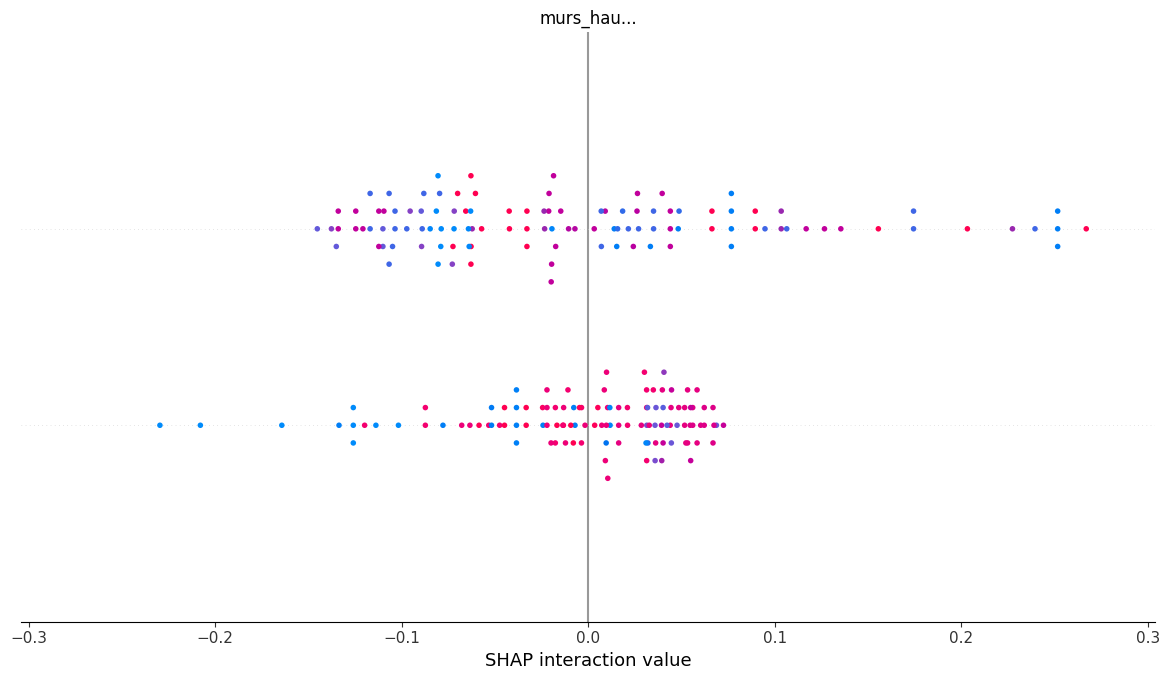

✅ Saved SHAP plot for murs_014ec_mode_constructif in: plots/SHAP_maquette_23002.xlsx_Murs_Plots/murs_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (115, 18)

Processing SHAP for maquette_23002.xlsx_Sols...
🎯 Target columns found in maquette_23002.xlsx_Sols: ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif']
🔍 Analyzing SHAP for target: sols_011ec_lot
📌 Initial shape before SHAP processing: (30, 23)
📊 SHAP values shape: 30, Feature matrix shape: (30, 19)


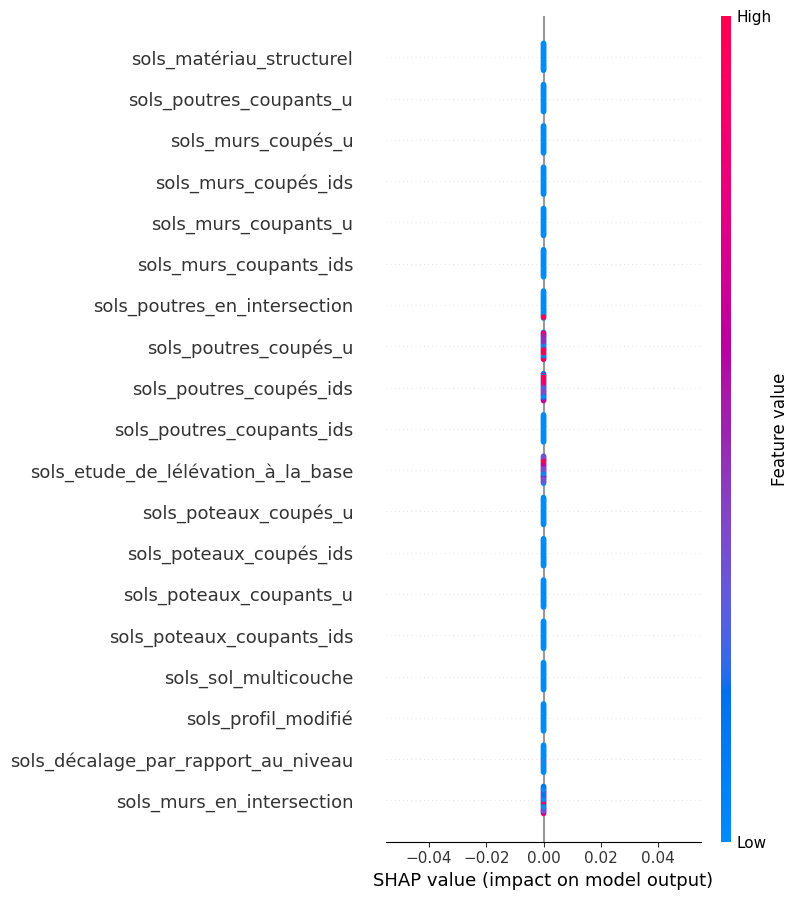

✅ Saved SHAP plot for sols_011ec_lot in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/sols_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (30, 19)
🔍 Analyzing SHAP for target: sols_012ec_ouvrage
📌 Initial shape before SHAP processing: (30, 23)
📊 SHAP values shape: 30, Feature matrix shape: (30, 19)


<Figure size 640x480 with 0 Axes>

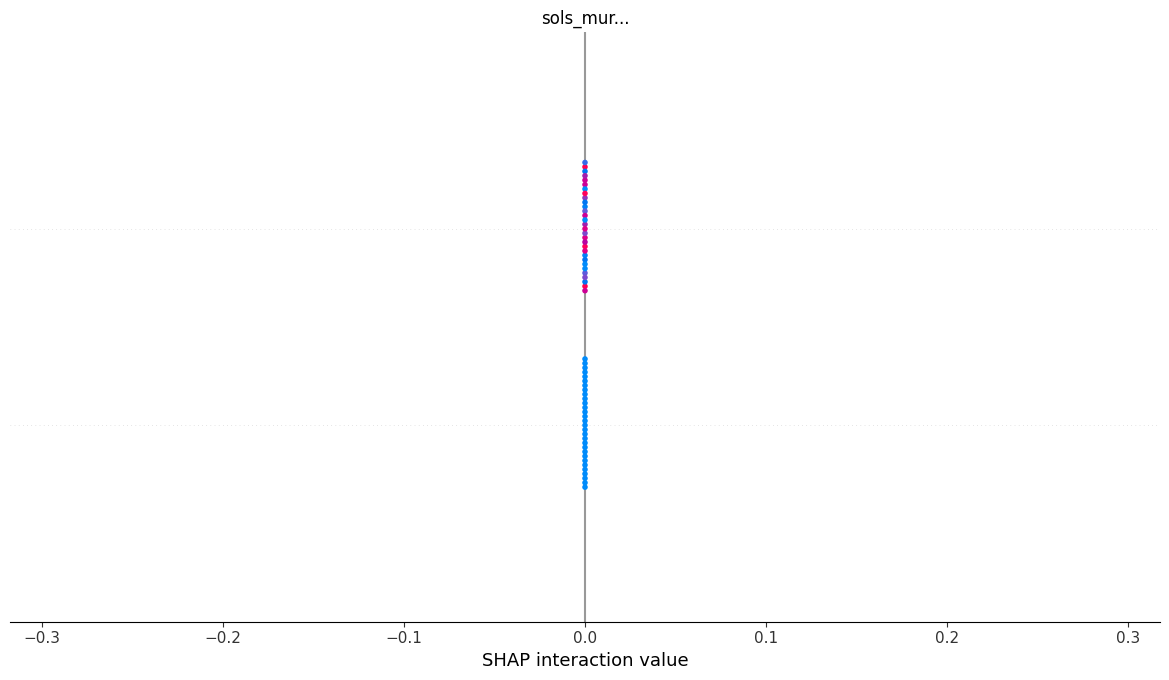

✅ Saved SHAP plot for sols_012ec_ouvrage in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/sols_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (30, 19)
🔍 Analyzing SHAP for target: sols_013ec_localisation
📌 Initial shape before SHAP processing: (30, 23)
📊 SHAP values shape: 30, Feature matrix shape: (30, 19)


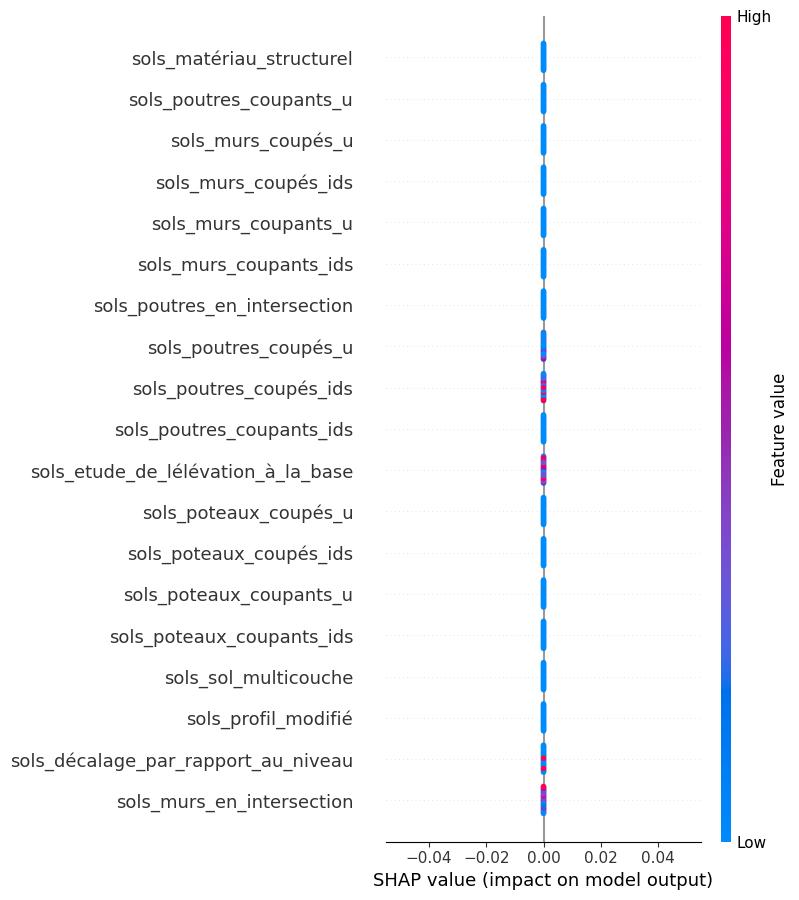

✅ Saved SHAP plot for sols_013ec_localisation in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/sols_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (30, 19)
🔍 Analyzing SHAP for target: sols_014ec_mode_constructif
📌 Initial shape before SHAP processing: (30, 23)
📊 SHAP values shape: 30, Feature matrix shape: (30, 19)


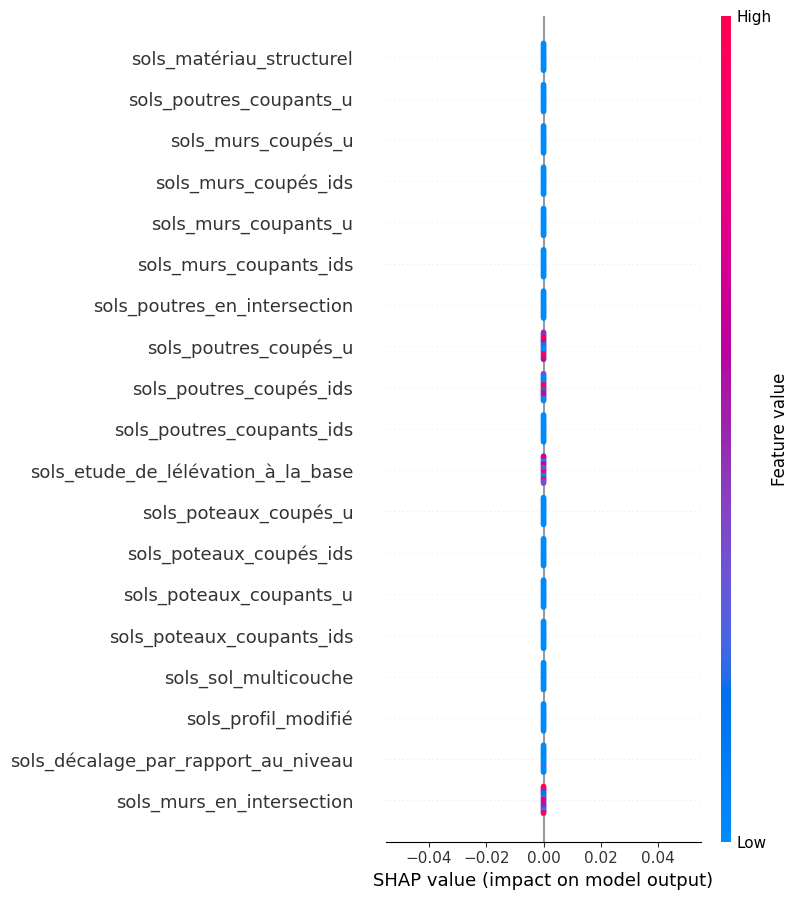

✅ Saved SHAP plot for sols_014ec_mode_constructif in: plots/SHAP_maquette_23002.xlsx_Sols_Plots/sols_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (30, 19)

Processing SHAP for maquette_23007.xlsx_Murs...
🎯 Target columns found in maquette_23007.xlsx_Murs: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']
🔍 Analyzing SHAP for target: murs_011ec_lot
📌 Initial shape before SHAP processing: (111, 21)
📊 SHAP values shape: 111, Feature matrix shape: (111, 17)


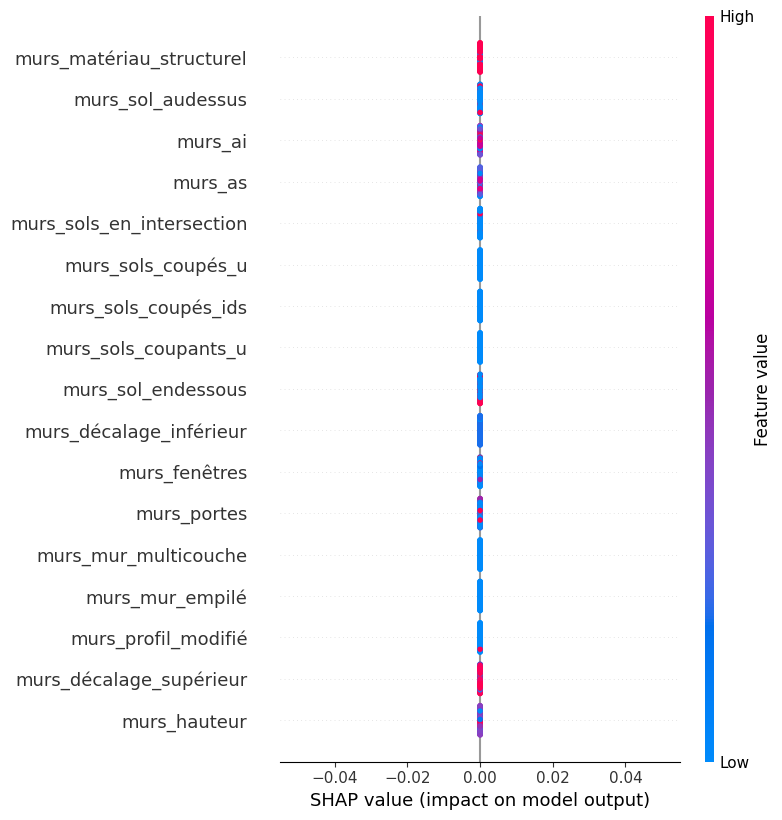

✅ Saved SHAP plot for murs_011ec_lot in: plots/SHAP_maquette_23007.xlsx_Murs_Plots/murs_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (111, 17)
🔍 Analyzing SHAP for target: murs_012ec_ouvrage
📌 Initial shape before SHAP processing: (111, 21)
📊 SHAP values shape: 111, Feature matrix shape: (111, 17)


<Figure size 640x480 with 0 Axes>

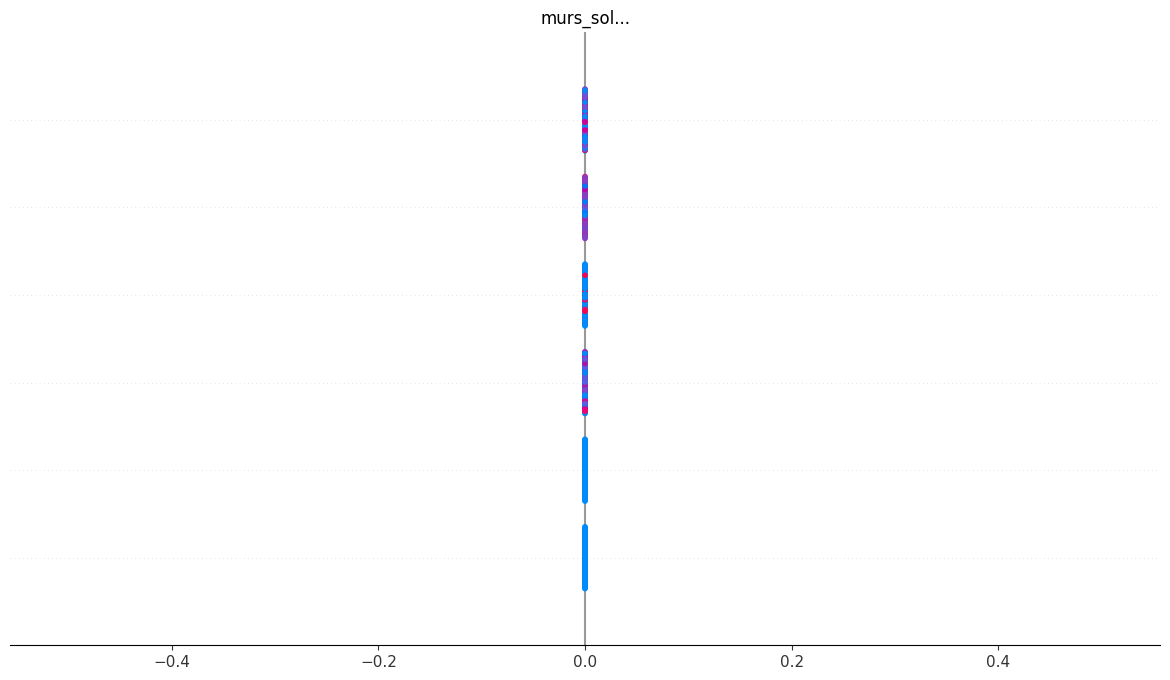

✅ Saved SHAP plot for murs_012ec_ouvrage in: plots/SHAP_maquette_23007.xlsx_Murs_Plots/murs_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (111, 17)
🔍 Analyzing SHAP for target: murs_013ec_localisation
📌 Initial shape before SHAP processing: (111, 21)
📊 SHAP values shape: 111, Feature matrix shape: (111, 17)


<Figure size 640x480 with 0 Axes>

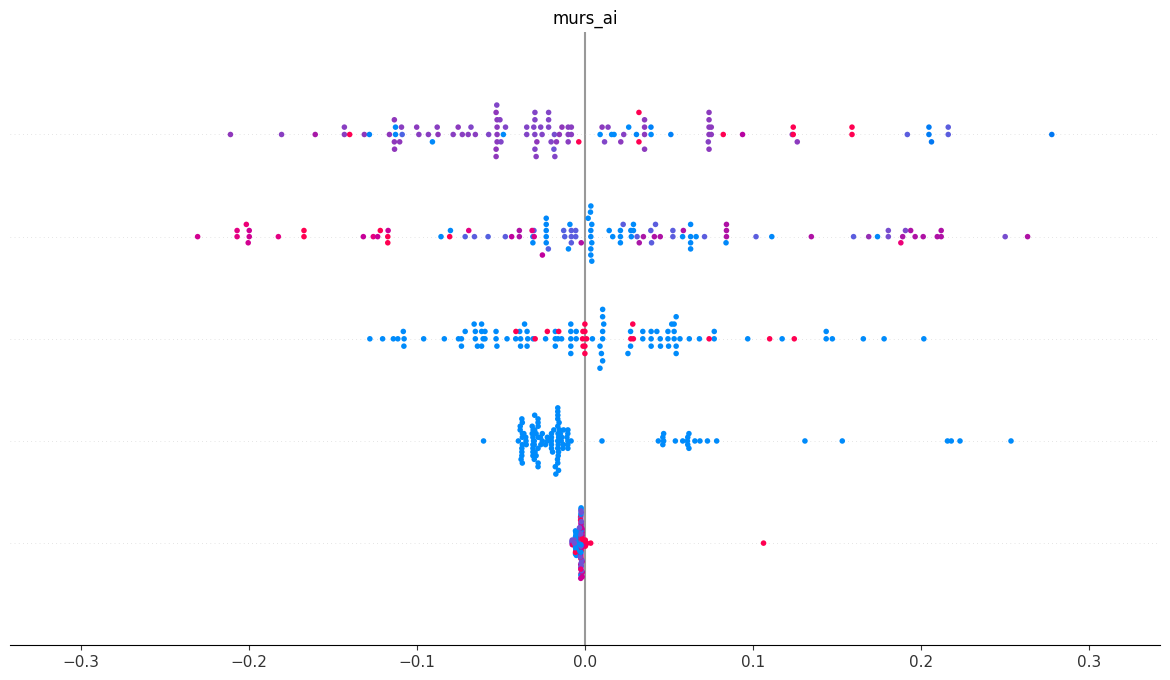

✅ Saved SHAP plot for murs_013ec_localisation in: plots/SHAP_maquette_23007.xlsx_Murs_Plots/murs_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (111, 17)
🔍 Analyzing SHAP for target: murs_014ec_mode_constructif
📌 Initial shape before SHAP processing: (111, 21)
📊 SHAP values shape: 111, Feature matrix shape: (111, 17)


<Figure size 640x480 with 0 Axes>

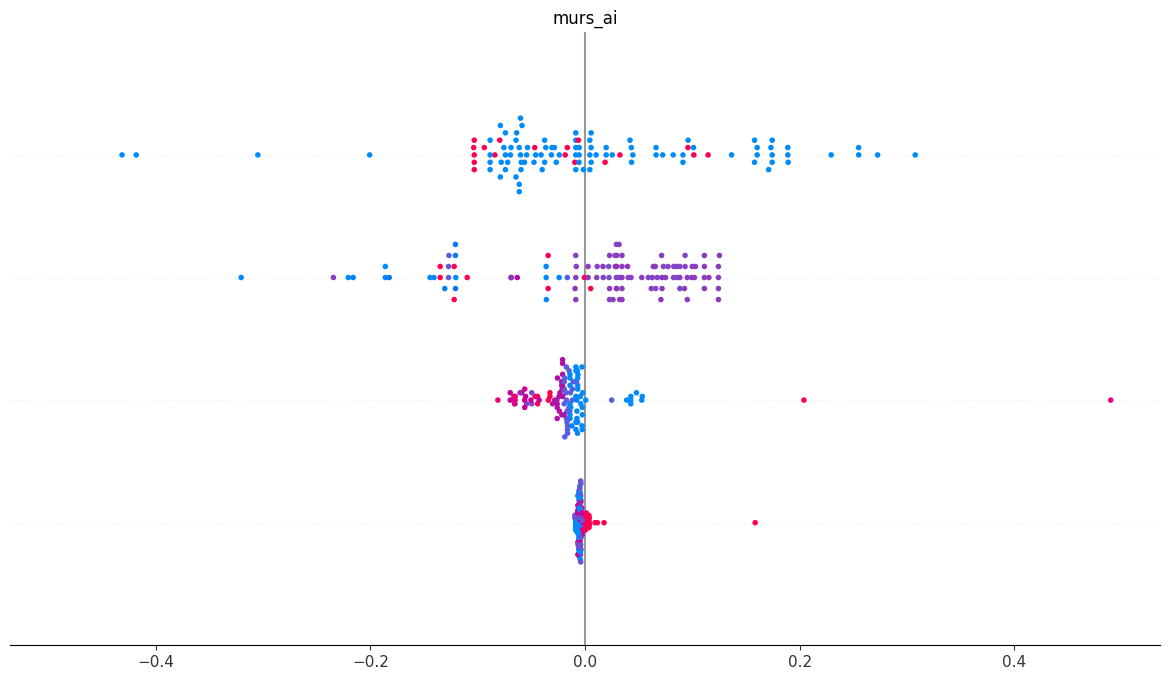

✅ Saved SHAP plot for murs_014ec_mode_constructif in: plots/SHAP_maquette_23007.xlsx_Murs_Plots/murs_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (111, 17)

Processing SHAP for RawData-Cibles.xlsx_Murs...
🎯 Target columns found in RawData-Cibles.xlsx_Murs: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']
🔍 Analyzing SHAP for target: murs_011ec_lot
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


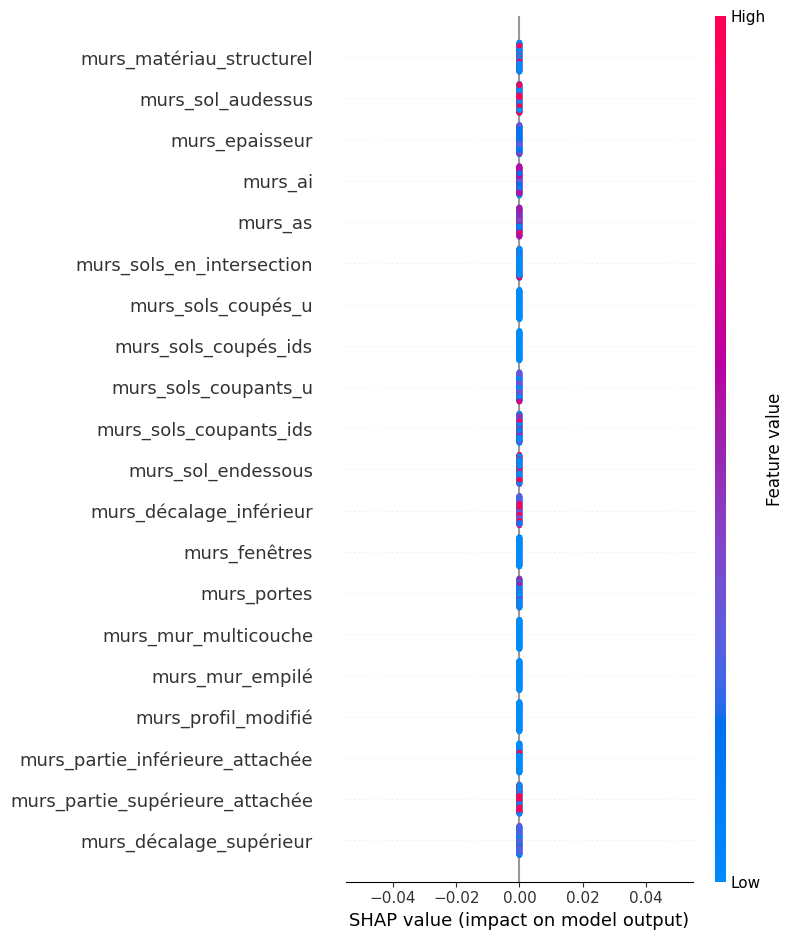

✅ Saved SHAP plot for murs_011ec_lot in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/murs_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (238, 21)
🔍 Analyzing SHAP for target: murs_012ec_ouvrage
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


<Figure size 640x480 with 0 Axes>

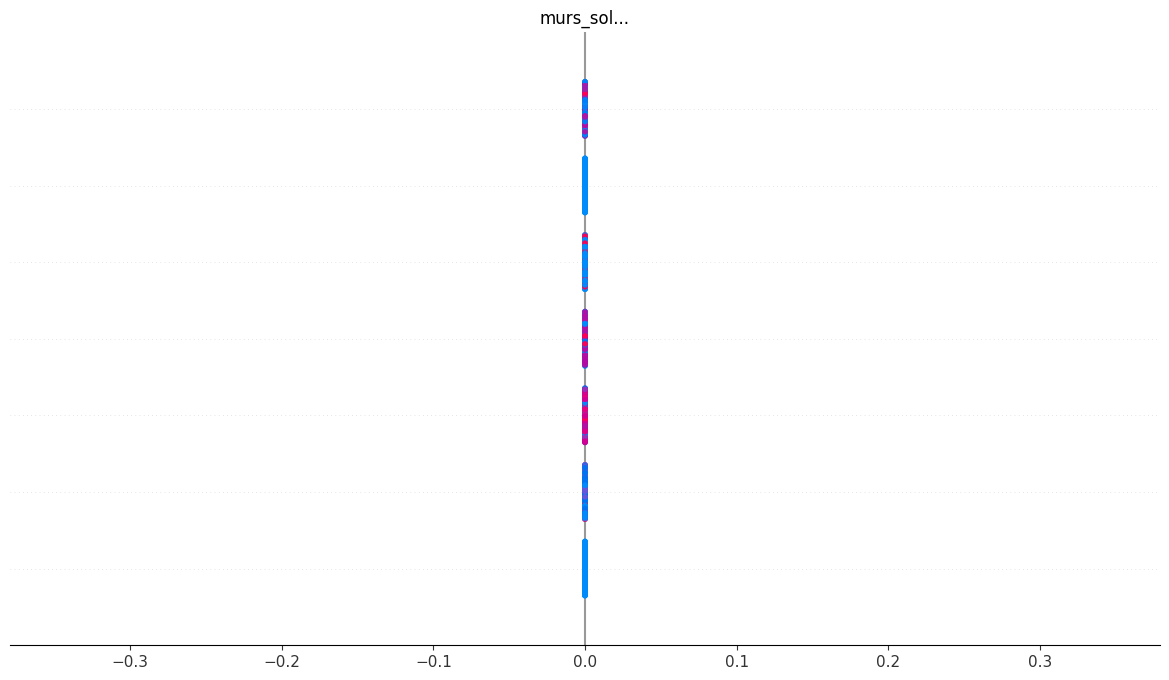

✅ Saved SHAP plot for murs_012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/murs_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (238, 21)
🔍 Analyzing SHAP for target: murs_013ec_localisation
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


<Figure size 640x480 with 0 Axes>

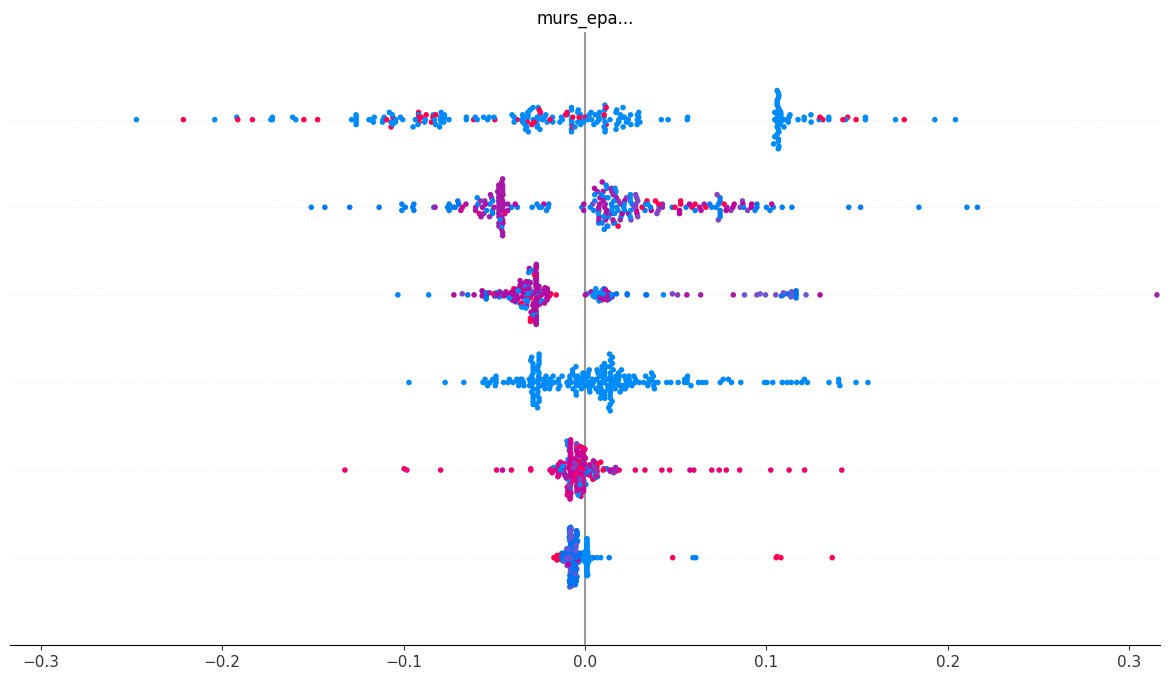

✅ Saved SHAP plot for murs_013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/murs_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (238, 21)
🔍 Analyzing SHAP for target: murs_014ec_mode_constructif
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


<Figure size 640x480 with 0 Axes>

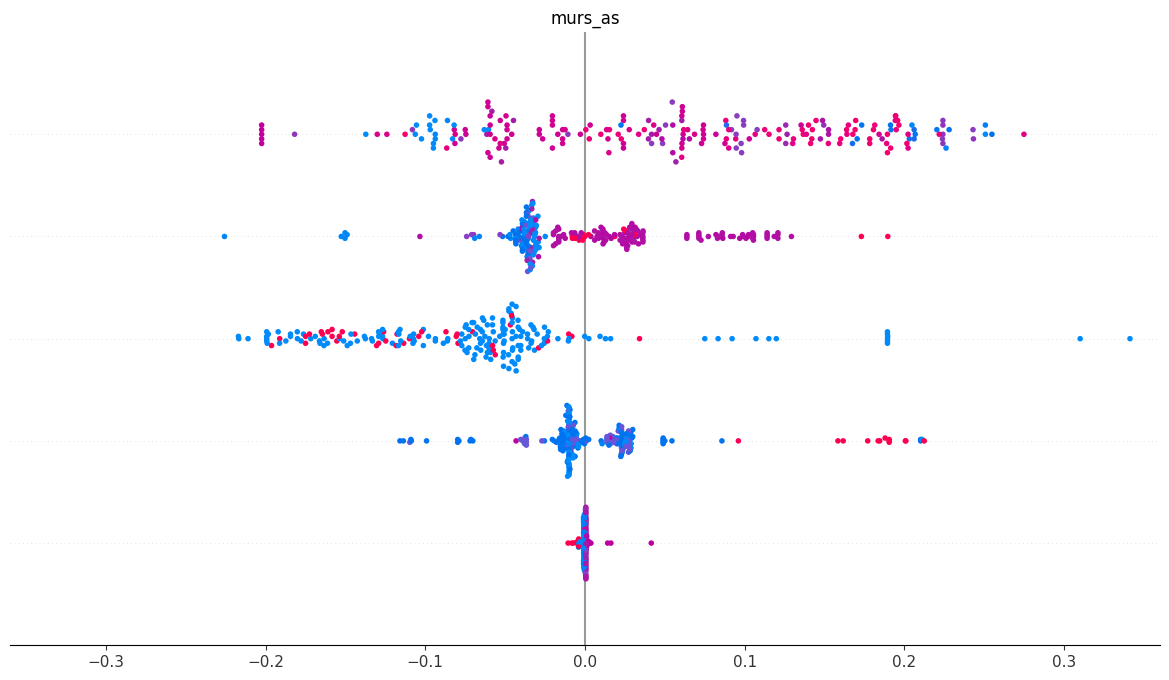

✅ Saved SHAP plot for murs_014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/murs_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (238, 21)

Processing SHAP for RawData-Cibles.xlsx_Sols...
🎯 Target columns found in RawData-Cibles.xlsx_Sols: ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif']
🔍 Analyzing SHAP for target: sols_011ec_lot
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


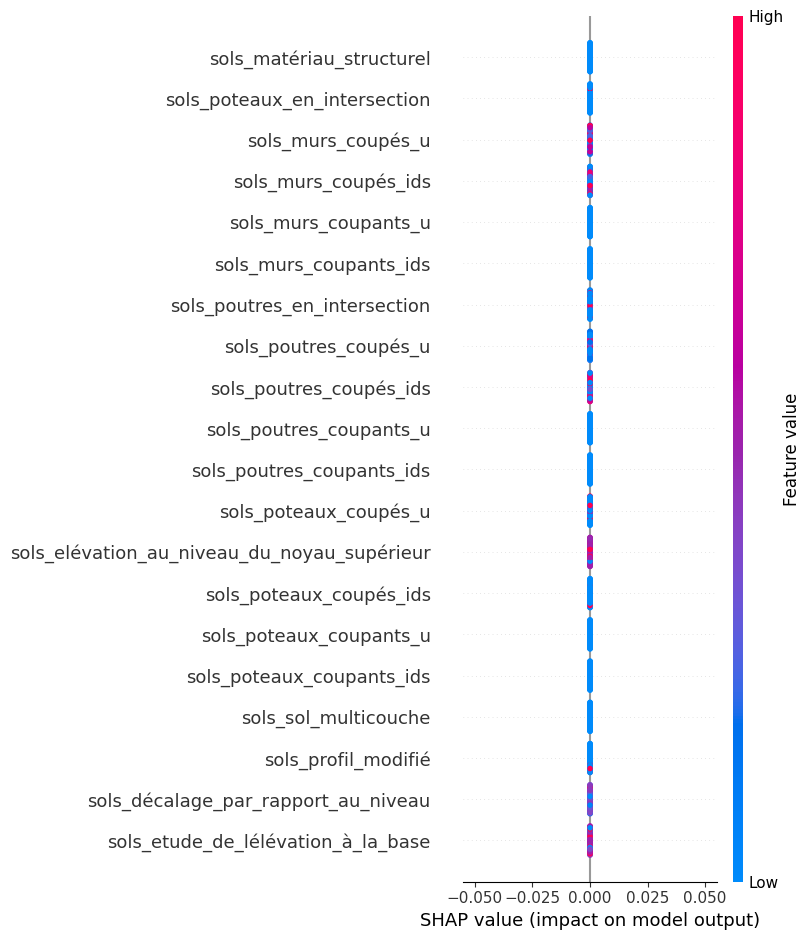

✅ Saved SHAP plot for sols_011ec_lot in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/sols_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (95, 23)
🔍 Analyzing SHAP for target: sols_012ec_ouvrage
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


<Figure size 640x480 with 0 Axes>

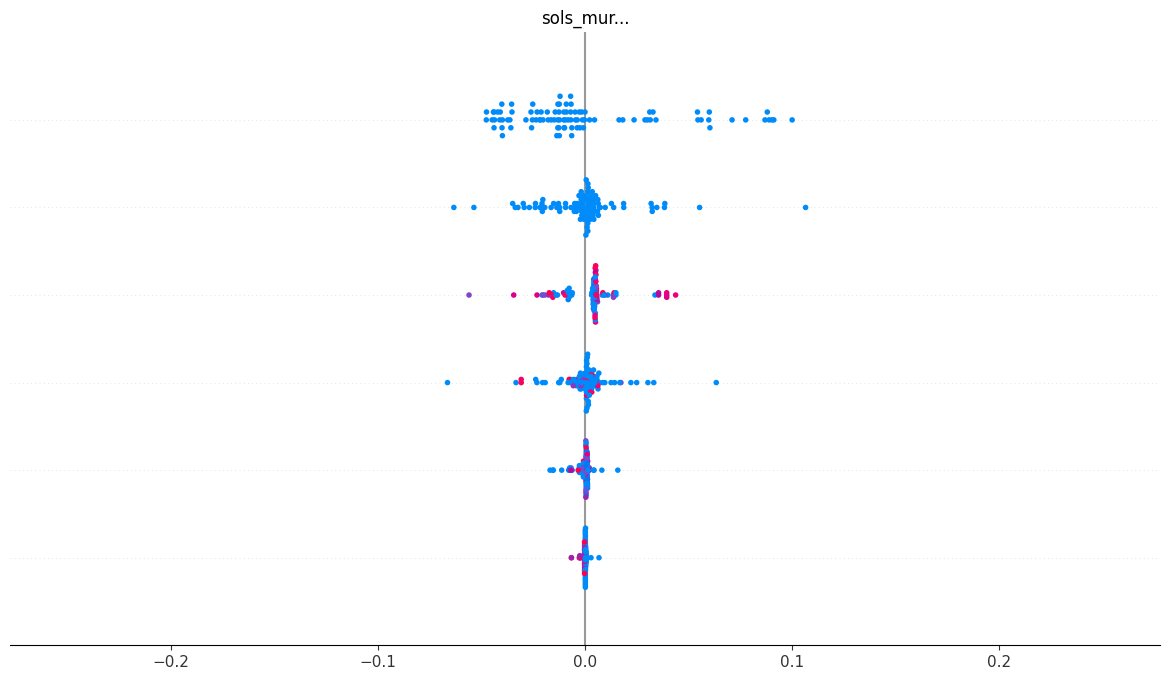

✅ Saved SHAP plot for sols_012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/sols_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (95, 23)
🔍 Analyzing SHAP for target: sols_013ec_localisation
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


<Figure size 640x480 with 0 Axes>

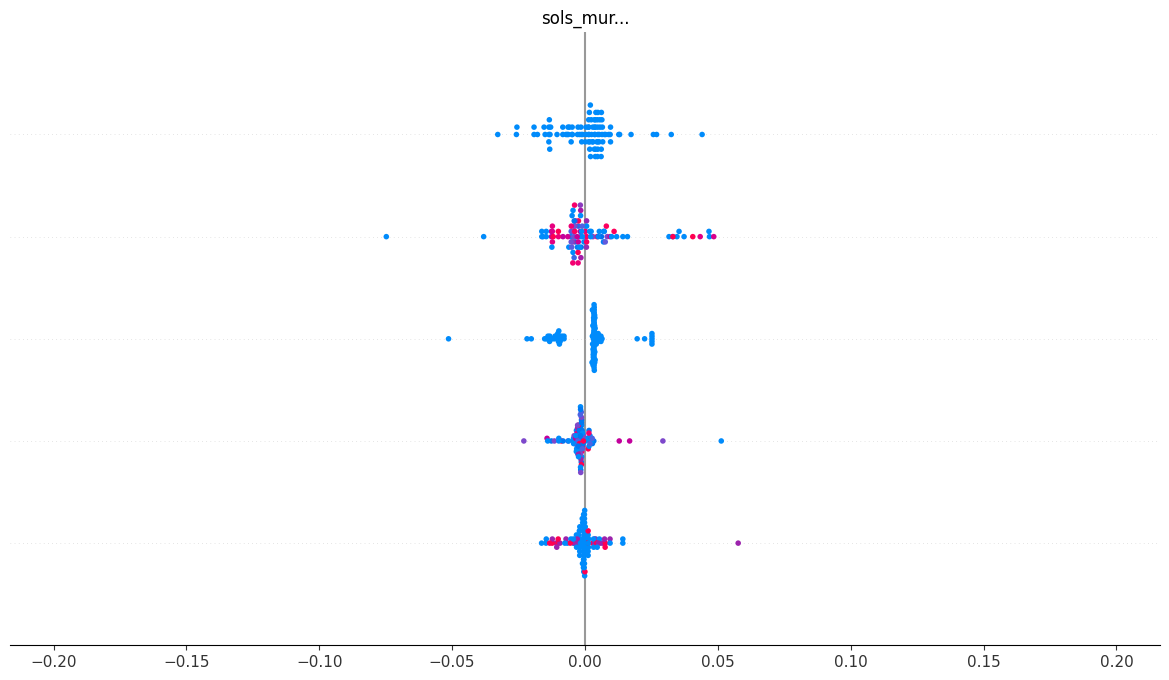

✅ Saved SHAP plot for sols_013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/sols_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (95, 23)
🔍 Analyzing SHAP for target: sols_014ec_mode_constructif
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


<Figure size 640x480 with 0 Axes>

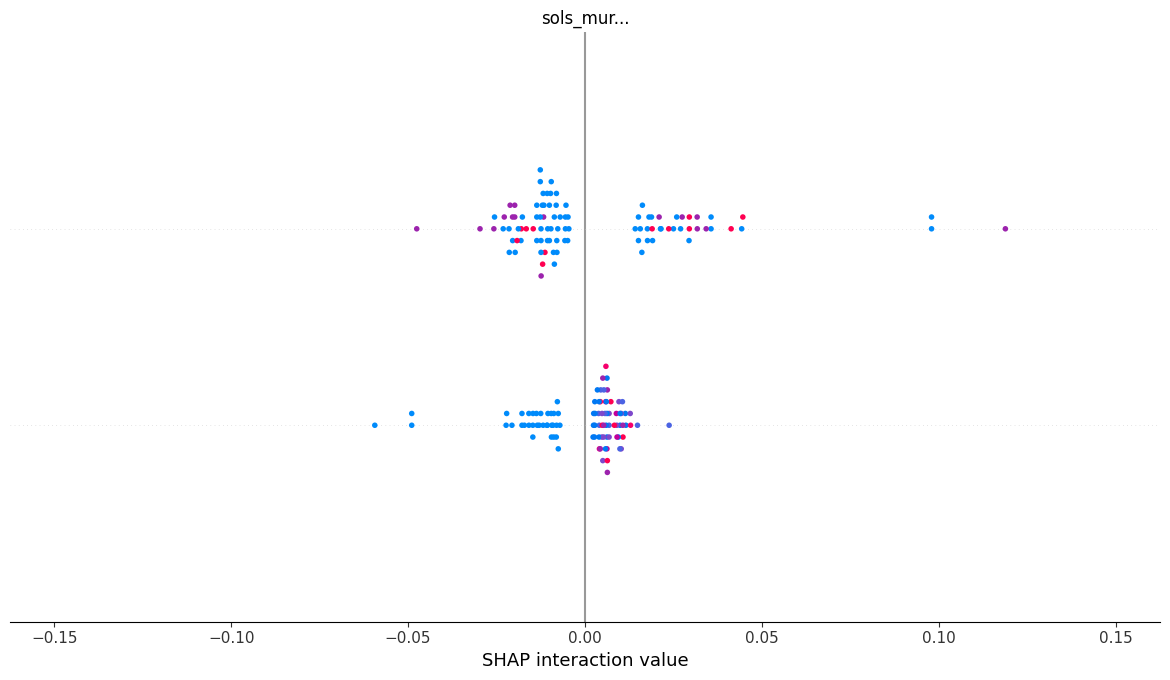

✅ Saved SHAP plot for sols_014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/sols_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (95, 23)

Processing SHAP for RawData-Cibles.xlsx_Poutres...
🎯 Target columns found in RawData-Cibles.xlsx_Poutres: ['poutres_011ec_lot', 'poutres_012ec_ouvrage', 'poutres_013ec_localisation', 'poutres_014ec_mode_constructif']
🔍 Analyzing SHAP for target: poutres_011ec_lot
📌 Initial shape before SHAP processing: (244, 26)
📊 SHAP values shape: 244, Feature matrix shape: (244, 22)


<Figure size 640x480 with 0 Axes>

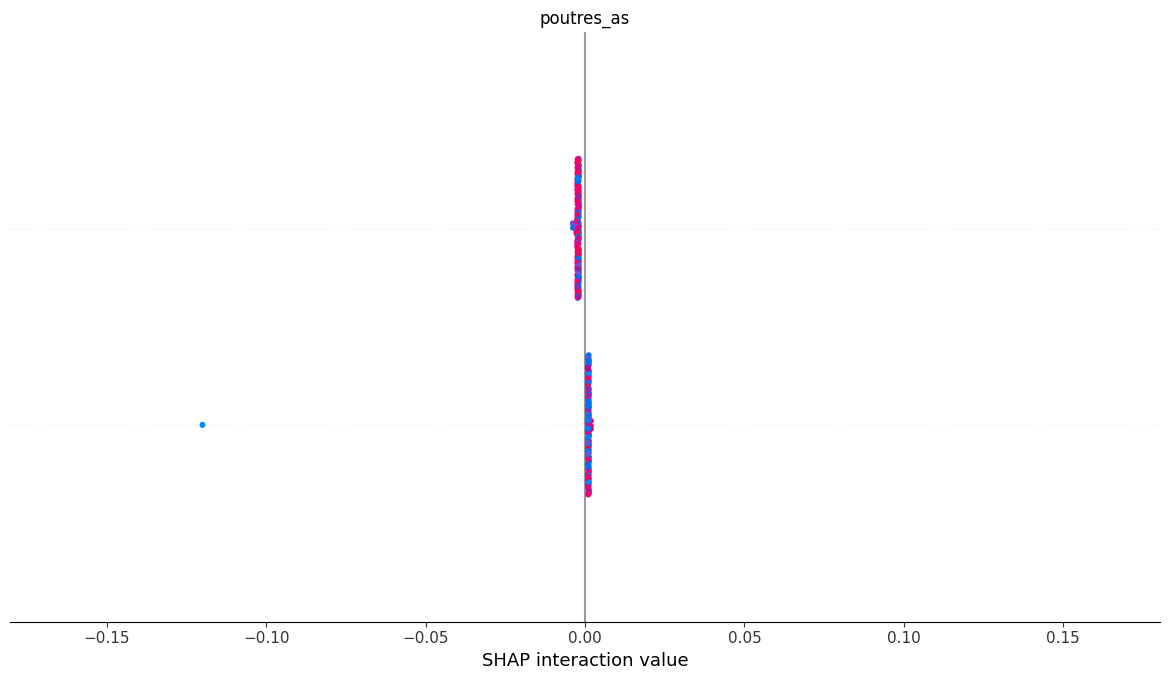

✅ Saved SHAP plot for poutres_011ec_lot in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/poutres_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (244, 22)
🔍 Analyzing SHAP for target: poutres_012ec_ouvrage
📌 Initial shape before SHAP processing: (244, 26)
📊 SHAP values shape: 244, Feature matrix shape: (244, 22)


<Figure size 640x480 with 0 Axes>

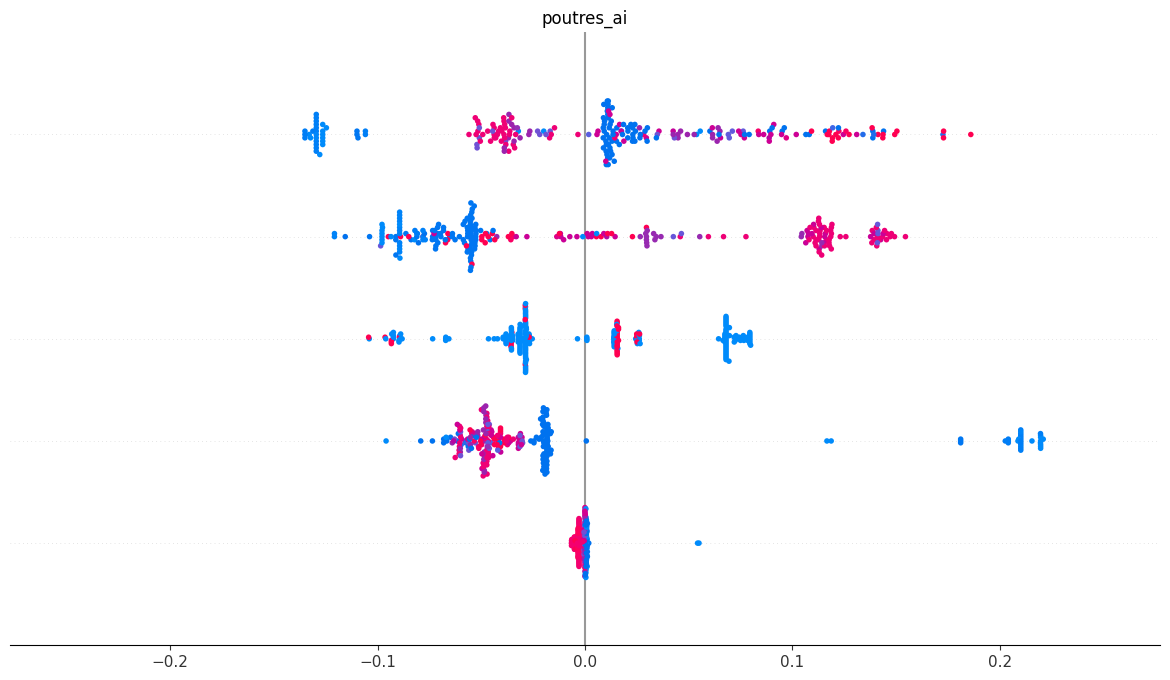

✅ Saved SHAP plot for poutres_012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/poutres_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (244, 22)
🔍 Analyzing SHAP for target: poutres_013ec_localisation
📌 Initial shape before SHAP processing: (244, 26)
📊 SHAP values shape: 244, Feature matrix shape: (244, 22)


<Figure size 640x480 with 0 Axes>

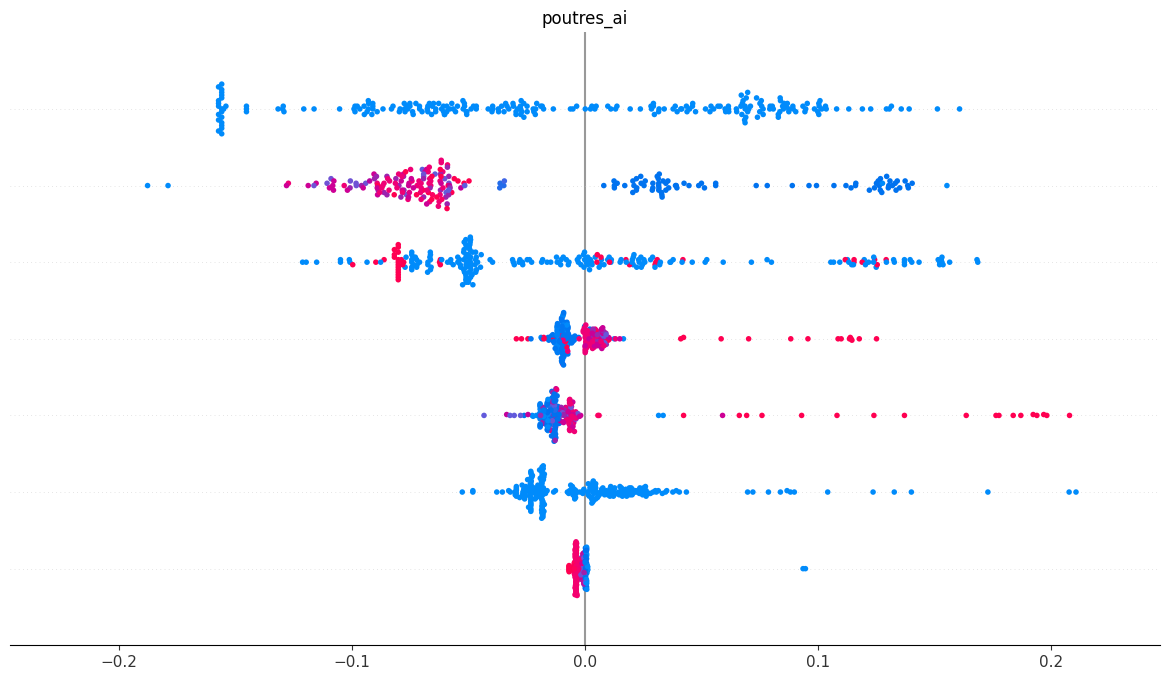

✅ Saved SHAP plot for poutres_013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/poutres_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (244, 22)
🔍 Analyzing SHAP for target: poutres_014ec_mode_constructif
📌 Initial shape before SHAP processing: (244, 26)
📊 SHAP values shape: 244, Feature matrix shape: (244, 22)


<Figure size 640x480 with 0 Axes>

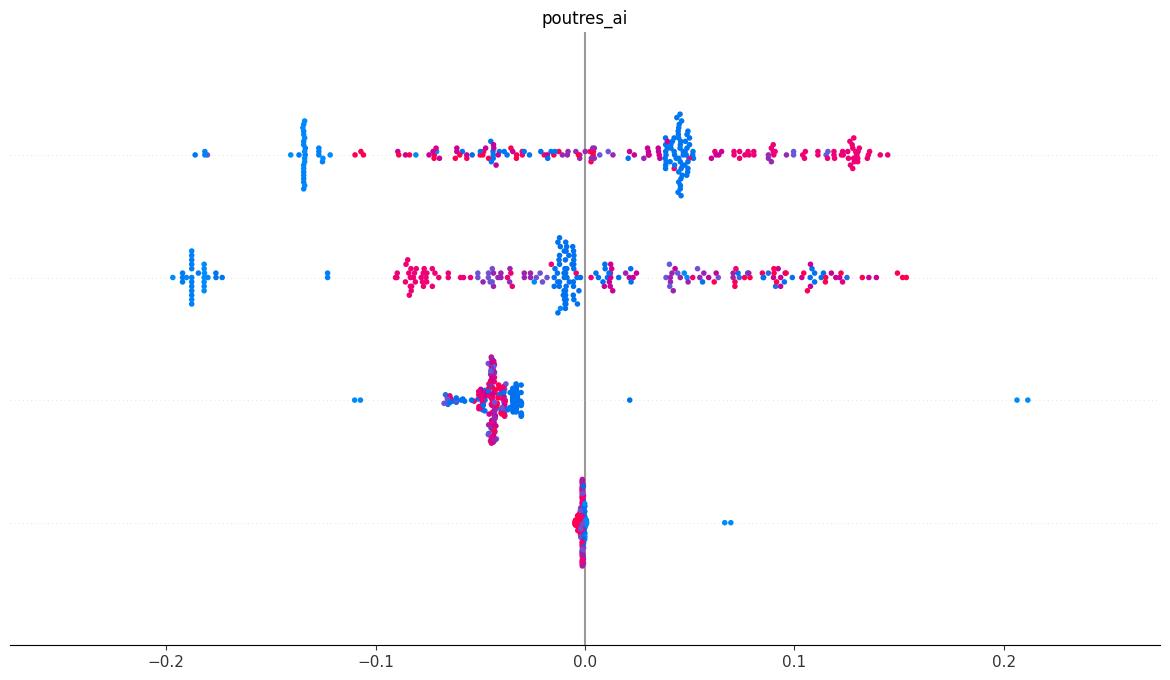

✅ Saved SHAP plot for poutres_014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/poutres_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (244, 22)

Processing SHAP for RawData-Cibles.xlsx_Poteaux...
🎯 Target columns found in RawData-Cibles.xlsx_Poteaux: ['poteaux_011ec_lot', 'poteaux_012ec_ouvrage', 'poteaux_013ec_localisation', 'poteaux_014ec_mode_constructif']
🔍 Analyzing SHAP for target: poteaux_011ec_lot
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


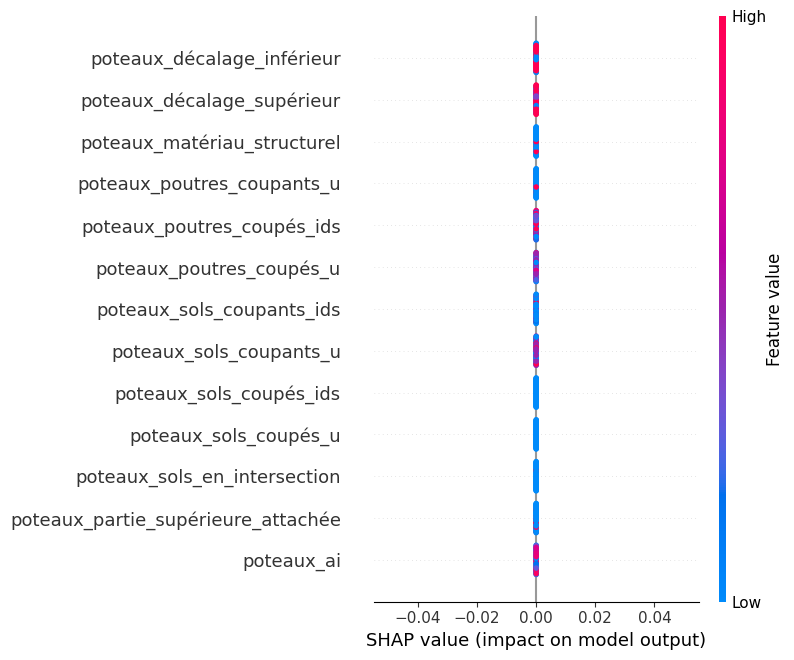

✅ Saved SHAP plot for poteaux_011ec_lot in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/poteaux_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (65, 13)
🔍 Analyzing SHAP for target: poteaux_012ec_ouvrage
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


<Figure size 640x480 with 0 Axes>

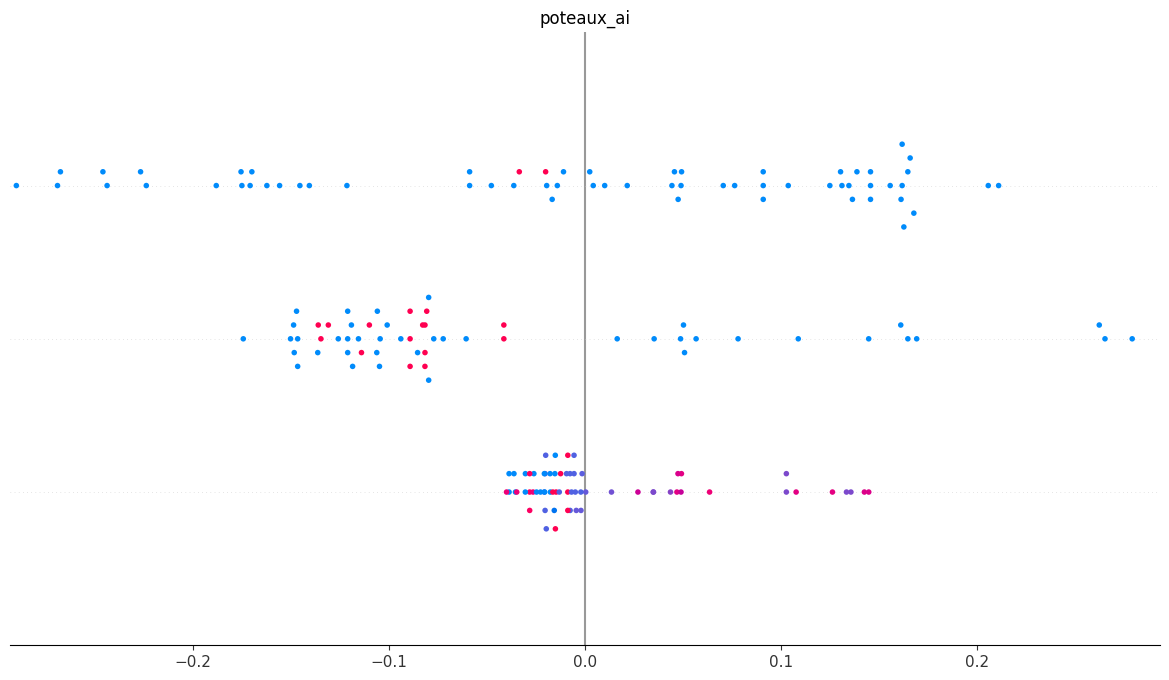

✅ Saved SHAP plot for poteaux_012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/poteaux_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (65, 13)
🔍 Analyzing SHAP for target: poteaux_013ec_localisation
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


<Figure size 640x480 with 0 Axes>

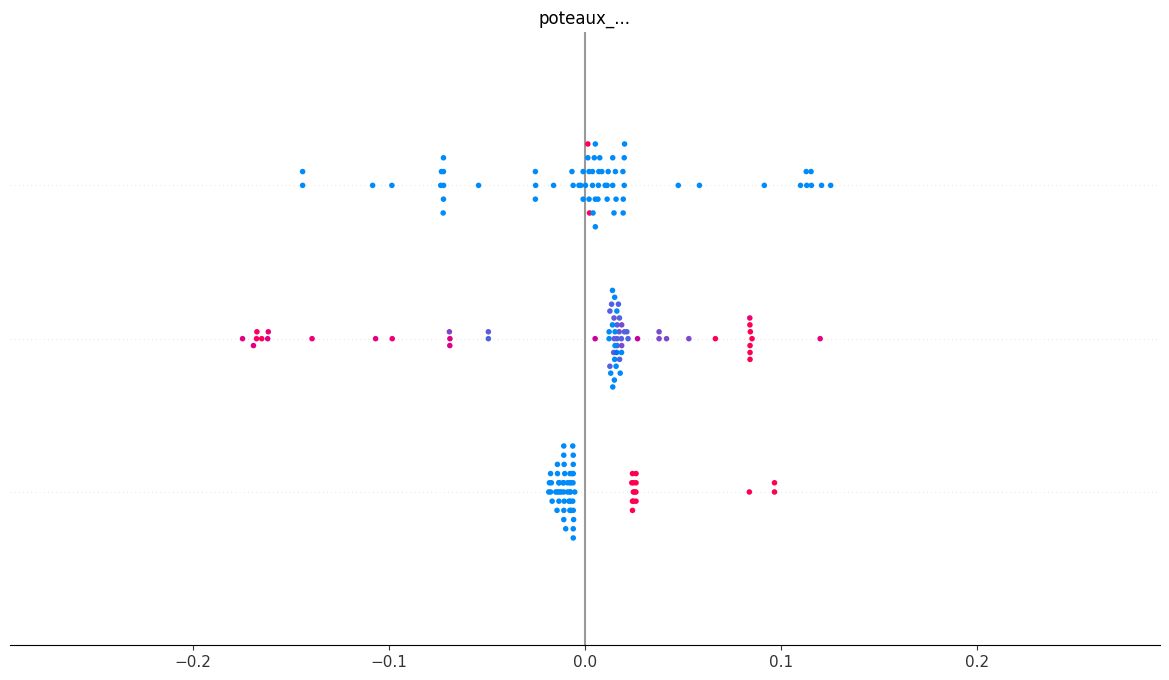

✅ Saved SHAP plot for poteaux_013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/poteaux_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (65, 13)
🔍 Analyzing SHAP for target: poteaux_014ec_mode_constructif
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


<Figure size 640x480 with 0 Axes>

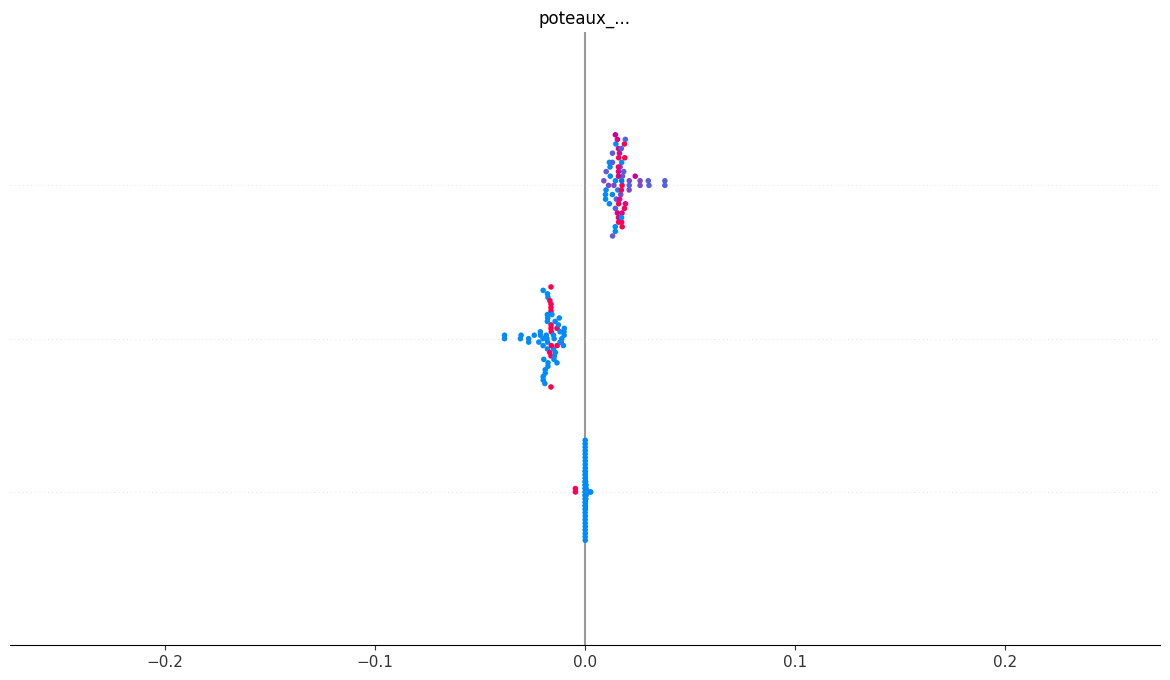

✅ Saved SHAP plot for poteaux_014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/poteaux_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (65, 13)

Processing SHAP for maquette_23001.xlsx_Murs...
🎯 Target columns found in maquette_23001.xlsx_Murs: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif']
🔍 Analyzing SHAP for target: murs_011ec_lot
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


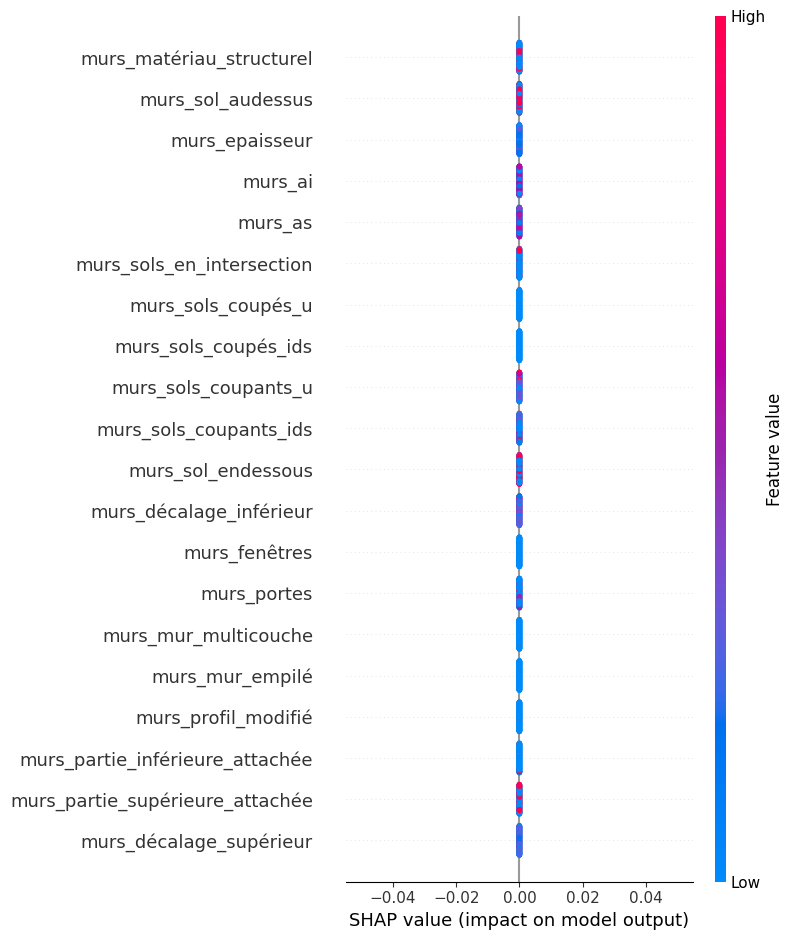

✅ Saved SHAP plot for murs_011ec_lot in: plots/SHAP_maquette_23001.xlsx_Murs_Plots/murs_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (238, 21)
🔍 Analyzing SHAP for target: murs_012ec_ouvrage
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


<Figure size 640x480 with 0 Axes>

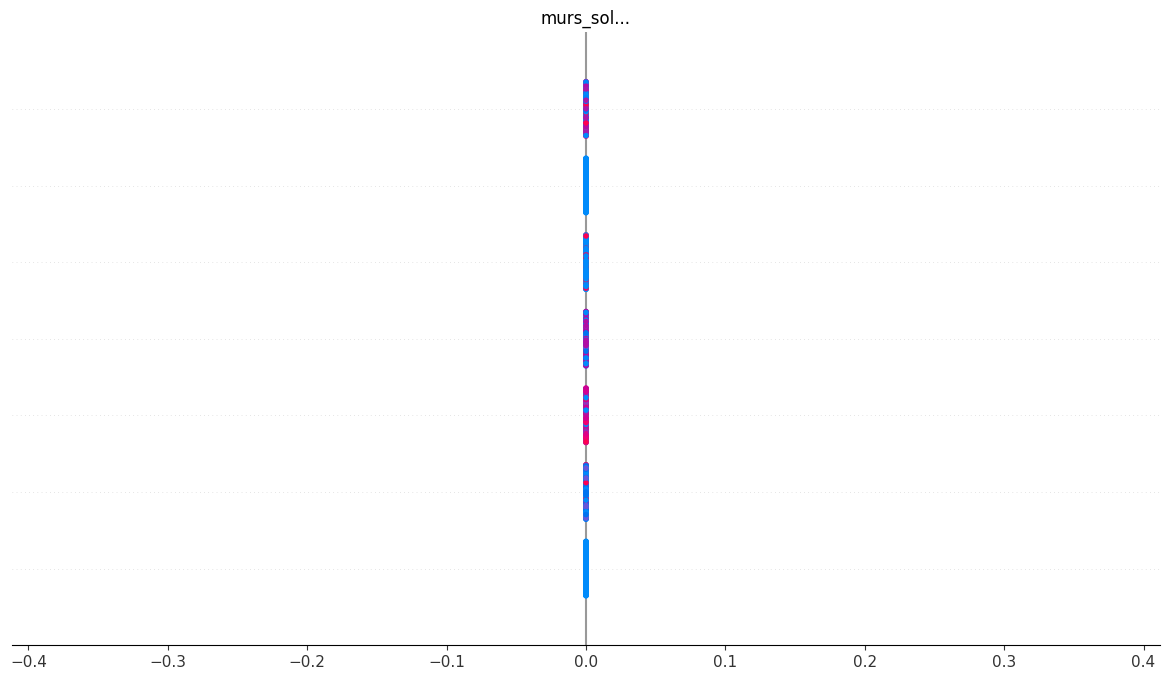

✅ Saved SHAP plot for murs_012ec_ouvrage in: plots/SHAP_maquette_23001.xlsx_Murs_Plots/murs_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (238, 21)
🔍 Analyzing SHAP for target: murs_013ec_localisation
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


<Figure size 640x480 with 0 Axes>

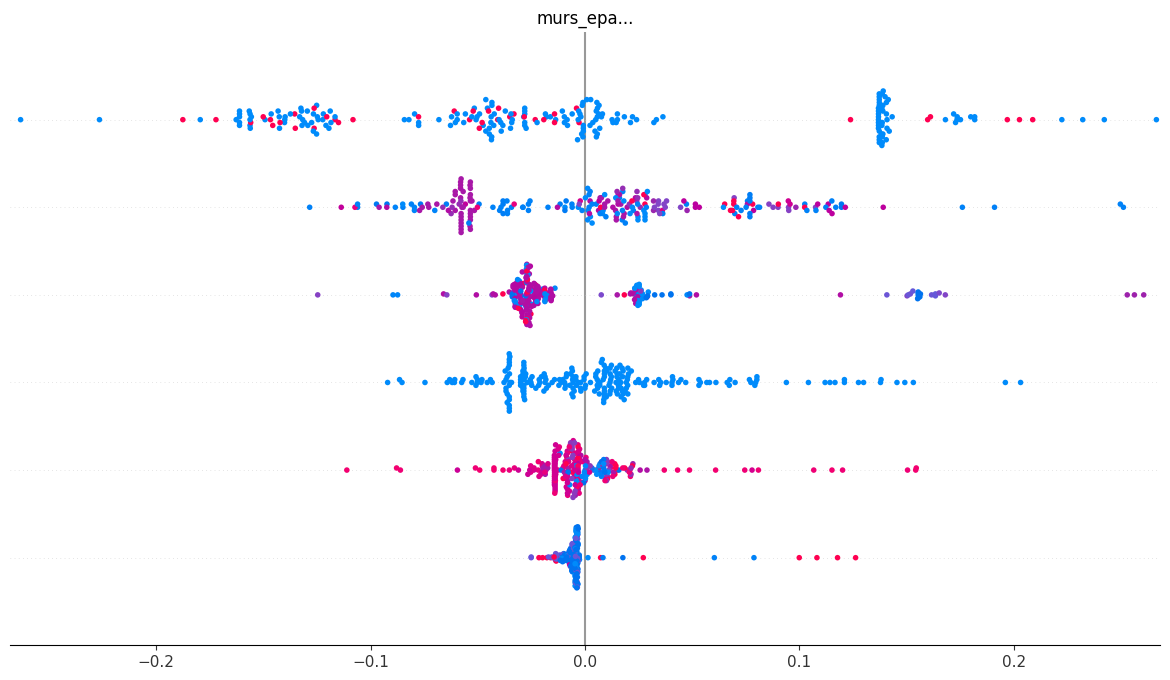

✅ Saved SHAP plot for murs_013ec_localisation in: plots/SHAP_maquette_23001.xlsx_Murs_Plots/murs_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (238, 21)
🔍 Analyzing SHAP for target: murs_014ec_mode_constructif
📌 Initial shape before SHAP processing: (238, 25)
📊 SHAP values shape: 238, Feature matrix shape: (238, 21)


<Figure size 640x480 with 0 Axes>

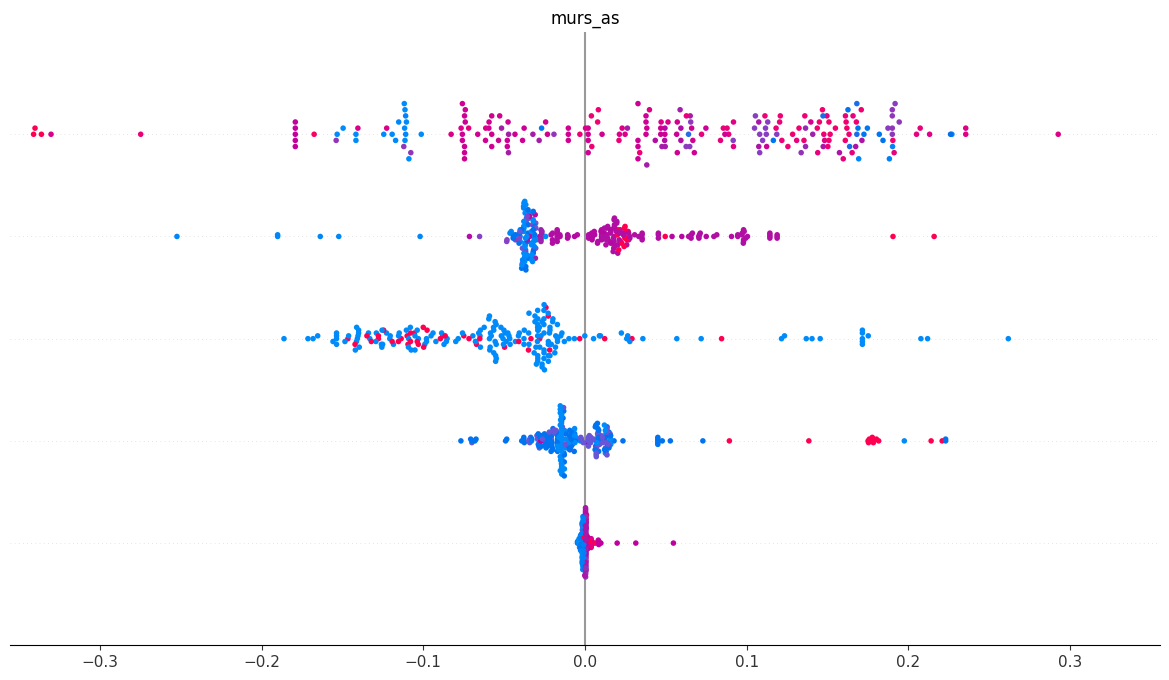

✅ Saved SHAP plot for murs_014ec_mode_constructif in: plots/SHAP_maquette_23001.xlsx_Murs_Plots/murs_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (238, 21)

Processing SHAP for maquette_23001.xlsx_Sols...
🎯 Target columns found in maquette_23001.xlsx_Sols: ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif']
🔍 Analyzing SHAP for target: sols_011ec_lot
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


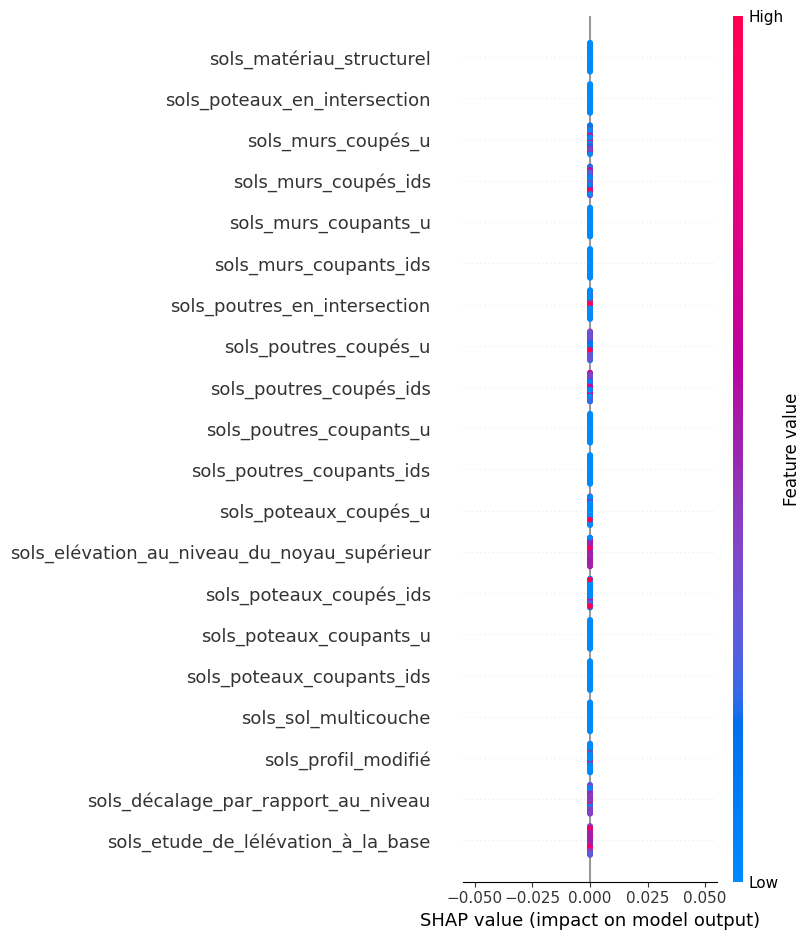

✅ Saved SHAP plot for sols_011ec_lot in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/sols_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (95, 23)
🔍 Analyzing SHAP for target: sols_012ec_ouvrage
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


<Figure size 640x480 with 0 Axes>

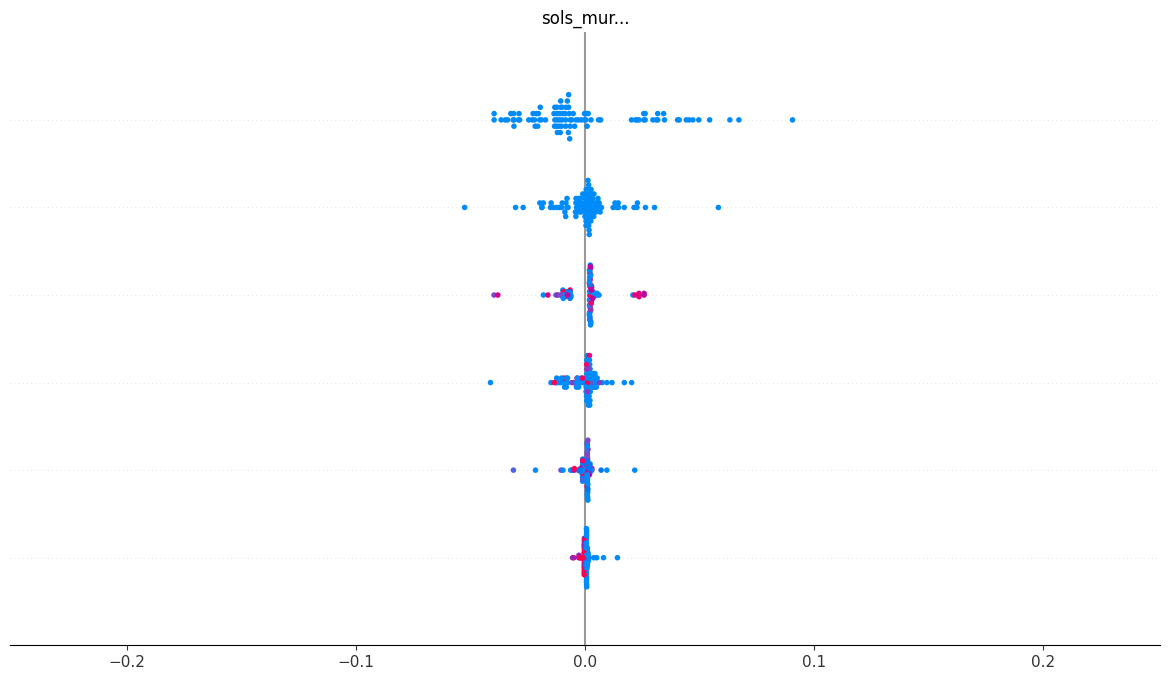

✅ Saved SHAP plot for sols_012ec_ouvrage in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/sols_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (95, 23)
🔍 Analyzing SHAP for target: sols_013ec_localisation
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


<Figure size 640x480 with 0 Axes>

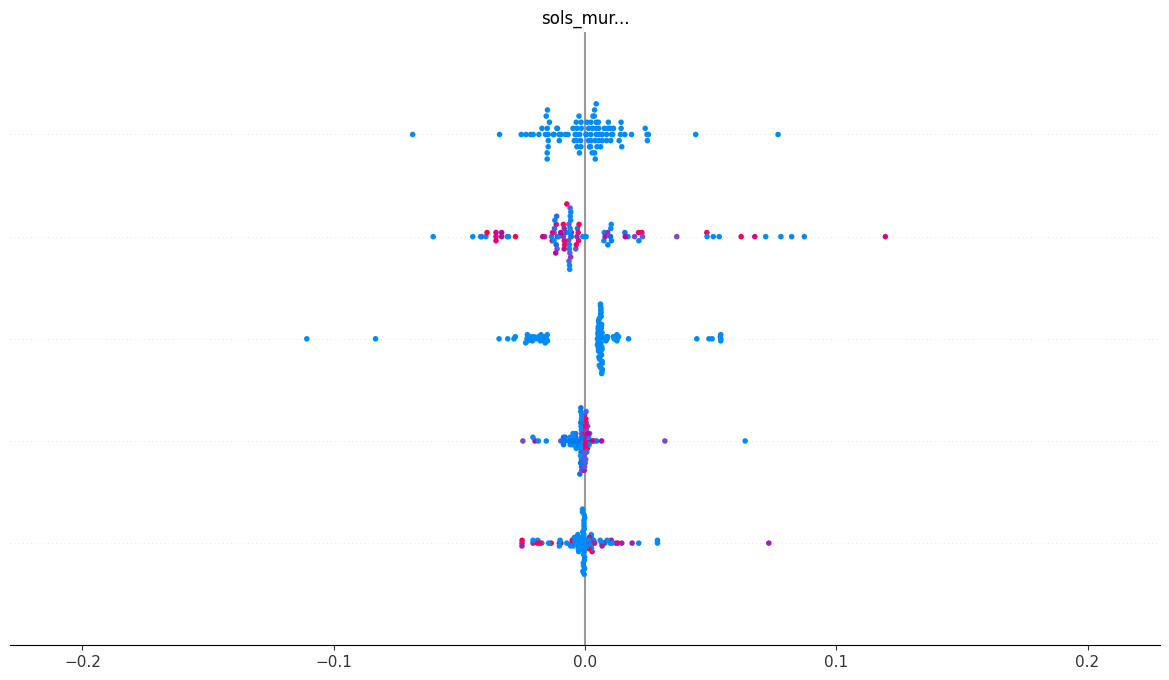

✅ Saved SHAP plot for sols_013ec_localisation in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/sols_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (95, 23)
🔍 Analyzing SHAP for target: sols_014ec_mode_constructif
📌 Initial shape before SHAP processing: (95, 27)
📊 SHAP values shape: 95, Feature matrix shape: (95, 23)


<Figure size 640x480 with 0 Axes>

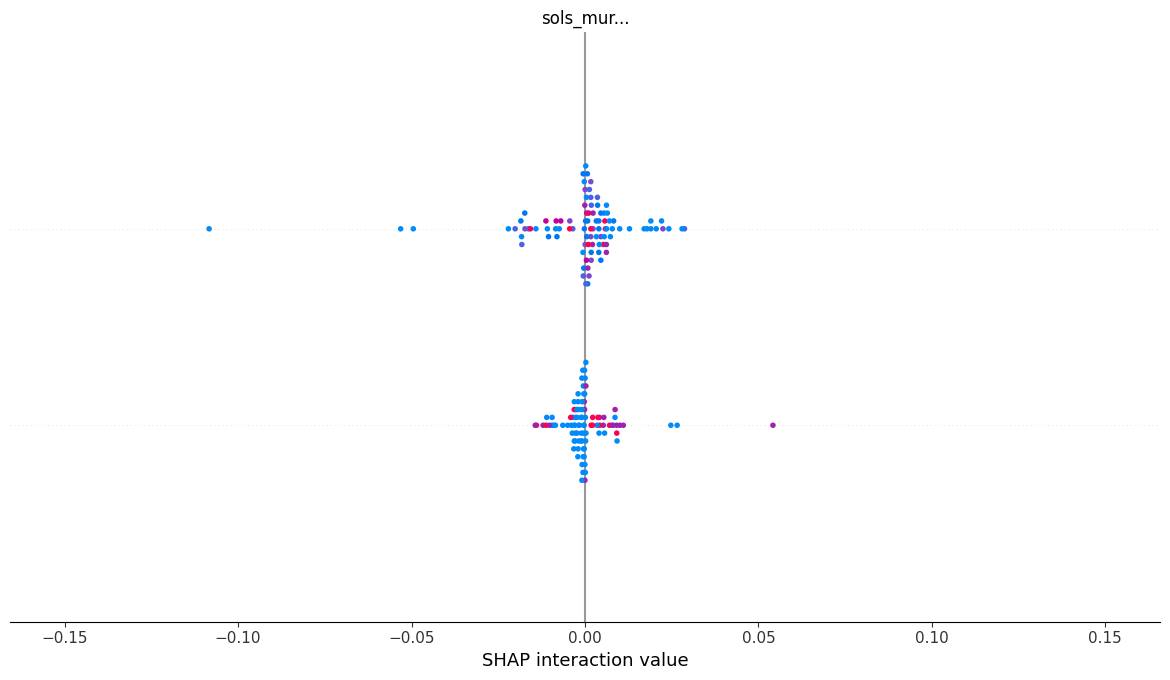

✅ Saved SHAP plot for sols_014ec_mode_constructif in: plots/SHAP_maquette_23001.xlsx_Sols_Plots/sols_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (95, 23)

Processing SHAP for maquette_23001.xlsx_Poteaux...
🎯 Target columns found in maquette_23001.xlsx_Poteaux: ['poteaux_011ec_lot', 'poteaux_012ec_ouvrage', 'poteaux_013ec_localisation', 'poteaux_014ec_mode_constructif']
🔍 Analyzing SHAP for target: poteaux_011ec_lot
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


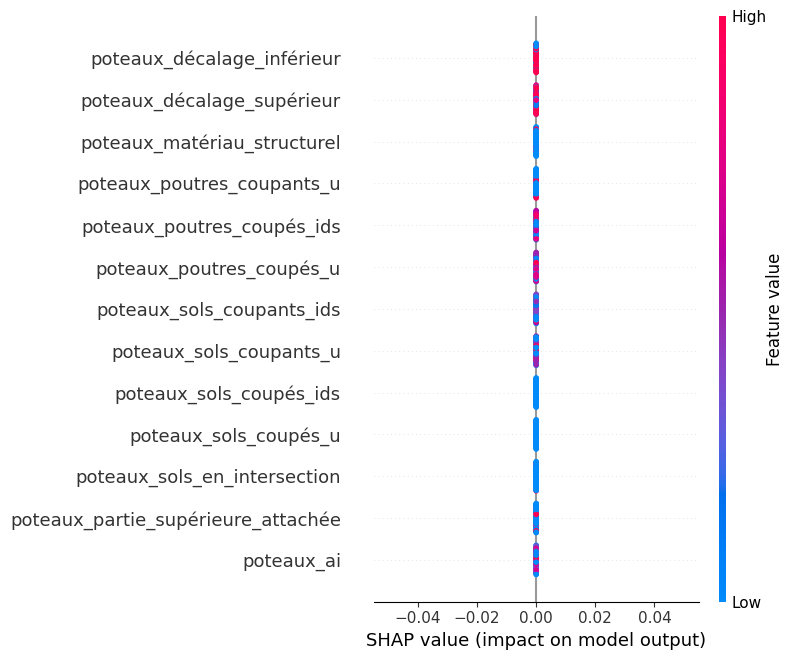

✅ Saved SHAP plot for poteaux_011ec_lot in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/poteaux_011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (65, 13)
🔍 Analyzing SHAP for target: poteaux_012ec_ouvrage
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


<Figure size 640x480 with 0 Axes>

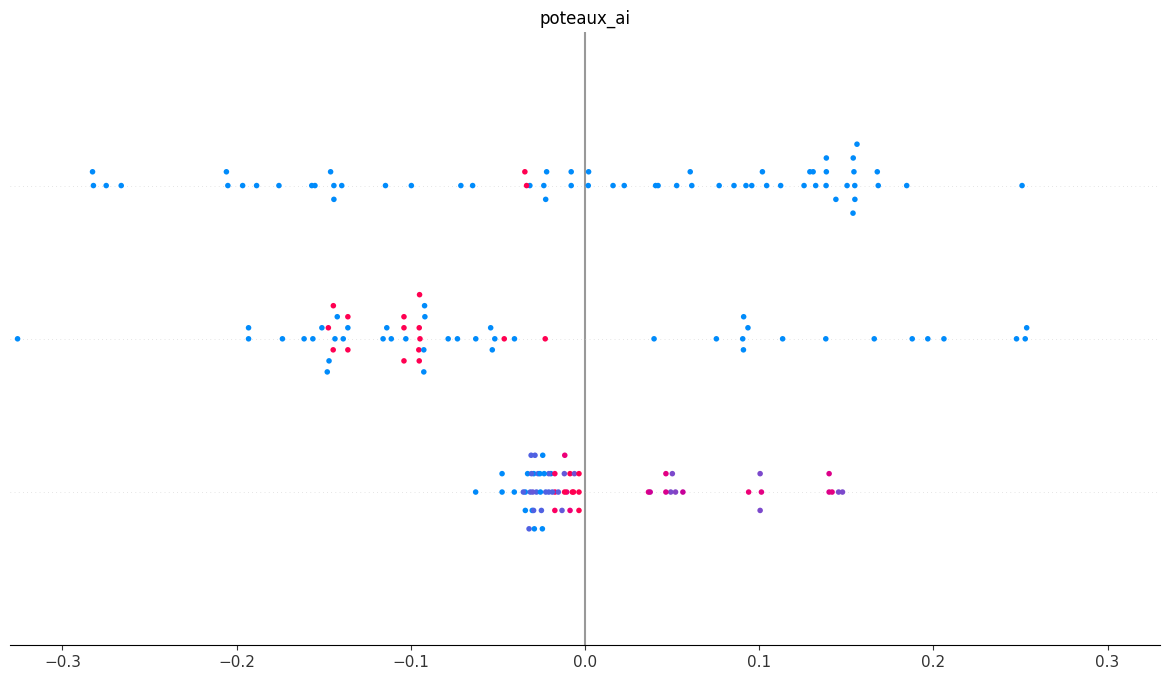

✅ Saved SHAP plot for poteaux_012ec_ouvrage in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/poteaux_012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (65, 13)
🔍 Analyzing SHAP for target: poteaux_013ec_localisation
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


<Figure size 640x480 with 0 Axes>

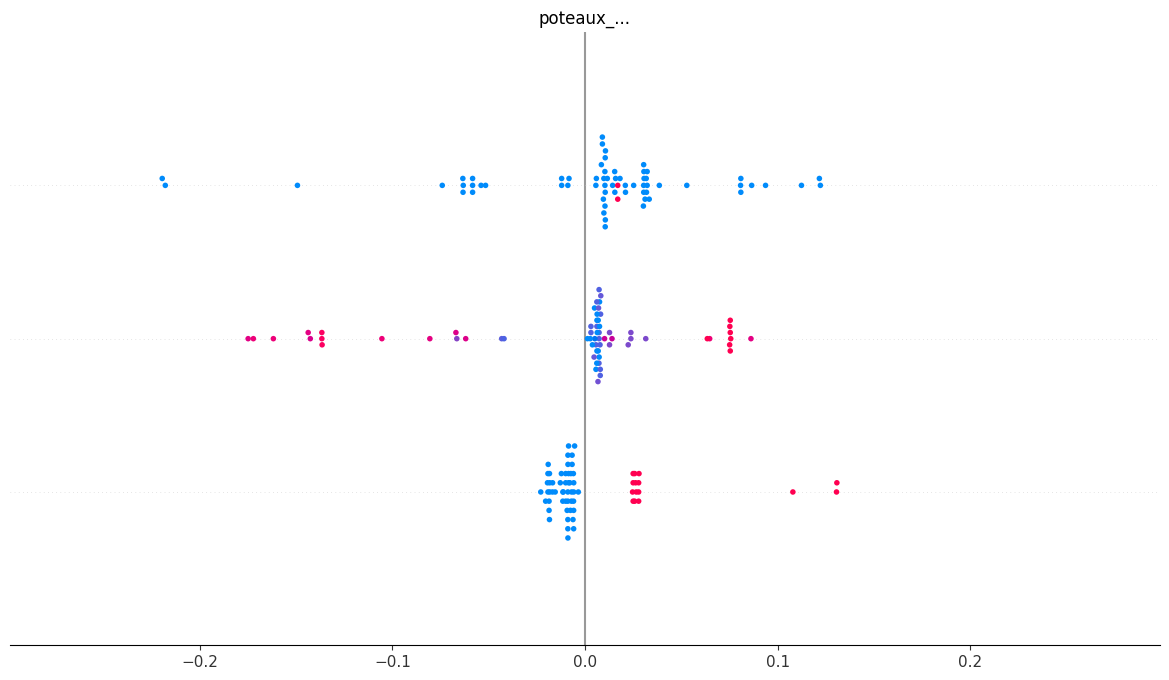

✅ Saved SHAP plot for poteaux_013ec_localisation in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/poteaux_013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (65, 13)
🔍 Analyzing SHAP for target: poteaux_014ec_mode_constructif
📌 Initial shape before SHAP processing: (65, 17)
📊 SHAP values shape: 65, Feature matrix shape: (65, 13)


<Figure size 640x480 with 0 Axes>

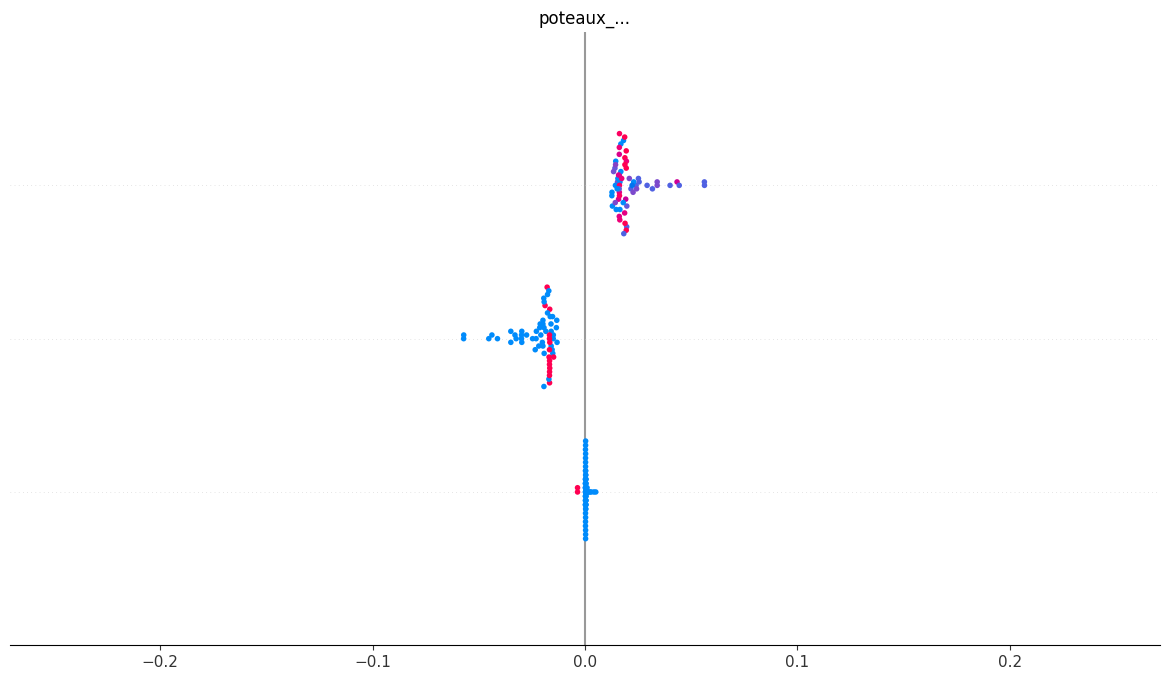

✅ Saved SHAP plot for poteaux_014ec_mode_constructif in: plots/SHAP_maquette_23001.xlsx_Poteaux_Plots/poteaux_014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (65, 13)

Processing SHAP for maquette_23015.xlsx_Murs...
⚠️ No valid target columns found in maquette_23015.xlsx_Murs. Skipping...

Processing SHAP for maquette_23015.xlsx_Sols...
⚠️ No valid target columns found in maquette_23015.xlsx_Sols. Skipping...


In [15]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import os

# Ensure SHAP initializes properly
shap.initjs()

# Function to create subfolder for SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join("plots", subfolder_name)  # Adjust path as needed

    # Create subfolder if it doesn’t exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Loop through all fully processed dataframes
for df_name, df in final_cleaned_dataframes.items():  # ✅ Use fully processed dataset
    print(f"\nProcessing SHAP for {df_name}...")

    # Identify available target columns in the current dataframe
    # Identify target columns by checking if any target column is a substring of the dataframe's columns
    existing_target_columns = [
        col for col in df.columns
        if any(target in col.lower() for target in TARGET_COLUMNS)
    ]

    if existing_target_columns:
        print(f"🎯 Target columns found in {df_name}: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"🔍 Analyzing SHAP for target: {target_column}")

            # Display shape before training
            initial_shape = df.shape
            print(f"📌 Initial shape before SHAP processing: {initial_shape}")

            # Prepare the data
            X = df.drop(columns=existing_target_columns)  # Exclude target columns from features

            # Convert categorical columns in X to numeric
            for col in X.select_dtypes(include=["object"]).columns:
                X[col] = X[col].astype("category").cat.codes

            # Convert target column to numeric
            y = df[target_column].astype("category").cat.codes

            # Train RandomForestClassifier
            model = RandomForestClassifier()
            model.fit(X, y)

            # Compute SHAP values
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)

            # Verify SHAP output shape before plotting
            print(f"📊 SHAP values shape: {len(shap_values)}, Feature matrix shape: {X.shape}")
            if isinstance(shap_values, list):
                shap_values = shap_values[0]  # Use first class for visualization in multi-class models

            # Create subfolder for SHAP plots
            plot_subfolder = get_plot_subfolder(f"SHAP_{df_name}")
            plot_path = os.path.join(plot_subfolder, f"{target_column}_SHAP.png")

            # Display & save SHAP summary plot
            shap.summary_plot(shap_values, X, show=False)
            plt.savefig(plot_path)
            plt.show()

            print(f"✅ Saved SHAP plot for {target_column} in: {plot_path}")

            # Display shape after SHAP analysis
            final_shape = X.shape
            print(f"📌 Final shape after SHAP processing: {final_shape}")

    else:
        print(f"⚠️ No valid target columns found in {df_name}. Skipping...")

<!-- ## Training and testing  -->

<!-- Where to Go from Here?
🔹 Feature engineering: If accuracy is low, refine features further
🔹 Hyperparameter tuning: Optimize n_estimators, max_depth, etc.
🔹 Compare multiple models: Try XGBoost or SVM for better performance

Your Next Step
Run the model training and evaluation, then let me know if you'd like tuning suggestions or deeper insights! 🚀🔥
This is getting exciting—you're building something powerful! 💡 -->


In [16]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for maquette_23002.xlsx_Murs:
murs_011ec_lot                  object
murs_012ec_ouvrage              object
murs_013ec_localisation         object
murs_014ec_mode_constructif     object
murs_hauteur                   float64
murs_ai                        float64
murs_as                        float64
murs_sols_en_intersection        int64
murs_sols_coupés_u               int64
murs_sols_coupés_ids           float64
murs_sols_coupants_u             int64
murs_sols_coupants_ids         float64
murs_sol_audessus                 bool
murs_sol_endessous                bool
murs_fenêtres                    int64
murs_portes                      int64
murs_mur_multicouche              bool
murs_mur_empilé                   bool
murs_profil_modifié               bool
murs_décalage_supérieur        float64
murs_décalage_inférieur        float64
murs_matériau_structurel        object
dtype: object


Dtypes for maquette_23002.xlsx_Sols:
sols_011ec_lot                          object
sols_

In [17]:
import pandas as pd

# Function to convert ID strings into a numeric count feature
def count_ids(id_string):
    """Convert string of IDs into a numeric count."""
    return len(id_string.split(",")) if isinstance(id_string, str) else 0

# Apply processing to fully cleaned datasets
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Processing ID count transformation for {df_name}...")

    # Identify relevant ID columns
    id_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ["coupés_(ids)", "coupants_(ids)"])]

    if id_columns:
        print(f"📌 Found ID columns: {id_columns}")

        # Transform ID columns into numeric count and drop originals
        df[[f"{col}_count" for col in id_columns]] = df[id_columns].applymap(count_ids)
        df.drop(columns=id_columns, inplace=True)  # Remove original text-based ID columns

    # Ensure only ID-related columns are converted to numeric
    df[id_columns] = df[id_columns].apply(pd.to_numeric, errors="coerce").fillna(0)

    # Store the updated dataframe
    final_cleaned_dataframes[df_name] = df

    print(f"✅ Final shape after ID count transformation: {df.shape}")

print("🚀 ID count transformation completed successfully!")


🔄 Processing ID count transformation for maquette_23002.xlsx_Murs...
✅ Final shape after ID count transformation: (115, 22)

🔄 Processing ID count transformation for maquette_23002.xlsx_Sols...
✅ Final shape after ID count transformation: (30, 23)

🔄 Processing ID count transformation for maquette_23007.xlsx_Murs...
✅ Final shape after ID count transformation: (111, 21)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Murs...
✅ Final shape after ID count transformation: (238, 25)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Sols...
✅ Final shape after ID count transformation: (95, 27)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poutres...
✅ Final shape after ID count transformation: (244, 26)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poteaux...
✅ Final shape after ID count transformation: (65, 17)

🔄 Processing ID count transformation for maquette_23001.xlsx_Murs...
✅ Final shape after ID count transformation: (238, 2

In [18]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for maquette_23002.xlsx_Murs:
murs_011ec_lot                  object
murs_012ec_ouvrage              object
murs_013ec_localisation         object
murs_014ec_mode_constructif     object
murs_hauteur                   float64
murs_ai                        float64
murs_as                        float64
murs_sols_en_intersection        int64
murs_sols_coupés_u               int64
murs_sols_coupés_ids           float64
murs_sols_coupants_u             int64
murs_sols_coupants_ids         float64
murs_sol_audessus                 bool
murs_sol_endessous                bool
murs_fenêtres                    int64
murs_portes                      int64
murs_mur_multicouche              bool
murs_mur_empilé                   bool
murs_profil_modifié               bool
murs_décalage_supérieur        float64
murs_décalage_inférieur        float64
murs_matériau_structurel        object
dtype: object


Dtypes for maquette_23002.xlsx_Sols:
sols_011ec_lot                          object
sols_

In [19]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns Before Encoding: {categorical_cols.tolist()}")


📌 maquette_23002.xlsx_Murs - Categorical Columns Before Encoding: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif', 'murs_matériau_structurel']

📌 maquette_23002.xlsx_Sols - Categorical Columns Before Encoding: ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif', 'sols_poutres_coupés_ids', 'sols_matériau_structurel']

📌 maquette_23007.xlsx_Murs - Categorical Columns Before Encoding: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif', 'murs_matériau_structurel']

📌 RawData-Cibles.xlsx_Murs - Categorical Columns Before Encoding: ['murs_011ec_lot', 'murs_012ec_ouvrage', 'murs_013ec_localisation', 'murs_014ec_mode_constructif', 'murs_sols_coupants_ids', 'murs_matériau_structurel']

📌 RawData-Cibles.xlsx_Sols - Categorical Columns Before Encoding: ['sols_011ec_lot', 'sols_012ec_ouvrage', 'sols_013ec_localisation', 'sols_014ec_mode_constructif', 'sols

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Dictionaries to store encoders
feature_encoders = {}  # Stores encoders for feature columns
target_encoders = {}  # Stores encoders for target columns

# Encode features and targets separately
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Encoding categorical features for {df_name}...")

    # Identify categorical columns again after ID transformation
    categorical_cols = df.select_dtypes(include=["object"]).columns
    target_cols = [col for col in categorical_cols if col in TARGET_COLUMNS]
    feature_cols = [col for col in categorical_cols if col not in TARGET_COLUMNS]

    # Encode target columns
    for col in target_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        target_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Target Encoder for {df_name} - {col}")

    # Encode feature columns
    one_hot_cols = []
    for col in feature_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        feature_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Feature Encoder for {df_name} - {col}")
        one_hot_cols.append(col)  # Mark column for One-Hot Encoding if needed

    # Apply One-Hot Encoding only to select categorical variables
    if one_hot_cols:
        encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        encoded_values = encoder.fit_transform(df[one_hot_cols])

        # Create a new DataFrame with proper column names
        encoded_df = pd.DataFrame(encoded_values, index=df.index, columns=encoder.get_feature_names_out(one_hot_cols))

        # Remove original one-hot columns and add encoded features
        df.drop(columns=one_hot_cols, inplace=True)
        df = pd.concat([df, encoded_df], axis=1)

    # Save updated dataframe
    final_cleaned_dataframes[df_name] = df

    print(f"✅ Successfully encoded categorical features for {df_name}. New shape: {df.shape}")

print("🚀 Final categorical encoding applied successfully across all datasets!")


🔄 Encoding categorical features for maquette_23002.xlsx_Murs...
✅ Stored Feature Encoder for maquette_23002.xlsx_Murs - murs_011ec_lot
✅ Stored Feature Encoder for maquette_23002.xlsx_Murs - murs_012ec_ouvrage
✅ Stored Feature Encoder for maquette_23002.xlsx_Murs - murs_013ec_localisation
✅ Stored Feature Encoder for maquette_23002.xlsx_Murs - murs_014ec_mode_constructif
✅ Stored Feature Encoder for maquette_23002.xlsx_Murs - murs_matériau_structurel
✅ Successfully encoded categorical features for maquette_23002.xlsx_Murs. New shape: (115, 24)

🔄 Encoding categorical features for maquette_23002.xlsx_Sols...
✅ Stored Feature Encoder for maquette_23002.xlsx_Sols - sols_011ec_lot
✅ Stored Feature Encoder for maquette_23002.xlsx_Sols - sols_012ec_ouvrage
✅ Stored Feature Encoder for maquette_23002.xlsx_Sols - sols_013ec_localisation
✅ Stored Feature Encoder for maquette_23002.xlsx_Sols - sols_014ec_mode_constructif
✅ Stored Feature Encoder for maquette_23002.xlsx_Sols - sols_poutres_coupé

In [21]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns After Encoding: {categorical_cols.tolist()}")


📌 maquette_23002.xlsx_Murs - Categorical Columns After Encoding: []

📌 maquette_23002.xlsx_Sols - Categorical Columns After Encoding: []

📌 maquette_23007.xlsx_Murs - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Murs - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Sols - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Poutres - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Poteaux - Categorical Columns After Encoding: []

📌 maquette_23001.xlsx_Murs - Categorical Columns After Encoding: []

📌 maquette_23001.xlsx_Sols - Categorical Columns After Encoding: []

📌 maquette_23001.xlsx_Poteaux - Categorical Columns After Encoding: []

📌 maquette_23015.xlsx_Murs - Categorical Columns After Encoding: []

📌 maquette_23015.xlsx_Sols - Categorical Columns After Encoding: []


In [22]:
# print(train_test_data.keys())

In [ ]:
# # RandomForestClassifier by Excel

# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Train and evaluate models on each dataset
# model_results = {}

# for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
#     print(f"\n🚀 Training model for {key}...")

#     # Train a Random Forest model
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train)  # Predictions on training data
#     y_test_pred = model.predict(X_test)  # Predictions on test data

#     # Evaluate accuracy
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     test_accuracy = accuracy_score(y_test, y_test_pred)
#     model_results[key] = (train_accuracy, test_accuracy)

#     print(f"📊 Training Accuracy for {key}: {train_accuracy:.4f}")
#     print(f"🎯 Test Accuracy for {key}: {test_accuracy:.4f}")

# # Plot Learning Curve
# plt.figure(figsize=(10, 5))

# train_accs = [train_accuracy for train_accuracy, _ in model_results.values()]
# test_accs = [test_accuracy for _, test_accuracy in model_results.values()]
# datasets = list(model_results.keys())

# plt.plot(datasets, train_accs, marker='o', label="Training Accuracy", color="blue")
# plt.plot(datasets, test_accs, marker='s', label="Test Accuracy", color="red")

# plt.xticks(rotation=90)
# plt.ylabel("Accuracy")
# plt.title("Model Learning Curve Across Datasets")
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Ensure necessary directories exist
os.makedirs('data/processed_data', exist_ok=True)

def train_random_forest(X_combined, y_combined):
    """Trains a single Random Forest model on processed data with evaluation plots."""
    print("\n🔍 Checking for missing values...")
    imputer = SimpleImputer(strategy='mean')
    X_combined = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
    X_combined.dropna(inplace=True)
    y_combined.dropna(inplace=True)

    # Apply feature scaling
    scaler = StandardScaler()
    X_combined = pd.DataFrame(scaler.fit_transform(X_combined), columns=X_combined.columns)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

    print(f"\n🚀 Training on merged dataset with {X_train.shape[0]} samples...")

    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"📊 Training Accuracy: {train_accuracy:.4f}")
    print(f"🎯 Test Accuracy: {test_accuracy:.4f}")

    # Plot Accuracy Comparison
    plt.figure(figsize=(6, 4))
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'red'])
    plt.ylabel("Accuracy")
    plt.title("Model Performance - Random Forest")
    plt.grid(True)
    plt.show()

    # Generate Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Compute mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot Learning Curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Accuracy")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve - Random Forest")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Run training function
X_combined, y_combined = process_data(final_cleaned_dataframes, TARGET_COLUMNS)  # Ensure data is processed before training
train_random_forest(X_combined, y_combined)

In [24]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib
# from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

# # Create necessary directories
# os.makedirs('data/processed_data', exist_ok=True)

# # Define multiple ML models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
#     "SVM": SVC(kernel="rbf", probability=True, random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=3),
#     "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
#     "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
#     "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
# }

# failed_models = []

# def process_data(final_cleaned_dataframes, TARGET_COLUMNS):
#     """Detects missing values, merges all datasets, resets index, and saves processed data."""
#     all_X = []
#     all_y = []

#     print("\n✅ Checking available dataframes and target columns...")
#     print("Dataframes found:", list(final_cleaned_dataframes.keys()))
#     print("Target columns expected:", TARGET_COLUMNS)

#     for df_name, df in final_cleaned_dataframes.items():
#         existing_target_columns = [col for col in df.columns if any(target in col for target in TARGET_COLUMNS)]

#         if not existing_target_columns:
#             print(f"⚠️ {df_name}: No matching target columns found.")
#             continue

#         print(f"\n🔍 Processing {df_name} - Found target columns: {existing_target_columns}")

#         for target_column in existing_target_columns:
#             print(f"📌 Processing data for target: {target_column}")

#             X = df.drop(columns=existing_target_columns)
#             y = df[target_column]

#             if y.nunique() == 1:
#                 print(f"⚠️ Skipping {df_name}_{target_column}: Only one class present.")
#                 continue

#             X = X.reset_index(drop=True)
#             y = y.reset_index(drop=True)

#             all_X.append(X)
#             all_y.append(y)

#     print(f"\n✅ Total datasets processed: {len(all_X)}")

#     if not all_X or not all_y:
#         msg = "🚨 No objects to concatenate. Check TARGET_COLUMNS or ensure target values vary."
#         print(msg)
#         raise ValueError(msg)

#     X_combined = pd.concat(all_X, axis=0).reset_index(drop=True)
#     y_combined = pd.concat(all_y, axis=0).reset_index(drop=True)

#     print(f"\n✅ Final merged dataset shape: {X_combined.shape}, {y_combined.shape}")

#     return X_combined, y_combined

# def train_models(X_combined, y_combined):
#     """Trains multiple ML models & evaluates performance."""
#     print("\n🔍 Checking for NaN values...")
#     imputer = SimpleImputer(strategy='mean')
#     X_combined = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
#     X_combined.dropna(inplace=True)
#     y_combined.dropna(inplace=True)

#     X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

#     model_results = {}

#     plt.figure(figsize=(8, 5))

#     for name, model in models.items():
#         print(f"\n🚀 Training {name}...")
#         try:
#             cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)

#             test_accuracy = accuracy_score(y_test, y_pred)
#             model_results[name] = test_accuracy

#             print(f"✅ {name}: Test Accuracy = {test_accuracy:.4f}")

#             # Learning Curve
#             train_sizes, train_scores, test_scores = learning_curve(
#                 model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
#                 train_sizes=np.linspace(0.1, 1.0, 5)
#             )

#             test_mean = np.mean(test_scores, axis=1)
#             test_std = np.std(test_scores, axis=1)

#             plt.plot(train_sizes, test_mean, marker='o', label=f"{name} (Acc: {test_mean[-1]:.2f})")
#             plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

#         except Exception as e:
#             print(f"⚠️ Error training {name}: {e}")
#             failed_models.append(name)

#     plt.xlabel("Training Set Size")
#     plt.ylabel("Accuracy")
#     plt.title("Learning Curve - All Models")
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()

#     # Rank models
#     print("\n📊 Model Rankings by Test Accuracy:")
#     ranked_models = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
#     ranking_df = pd.DataFrame(ranked_models, columns=["Model", "Test Accuracy"])
#     print(ranking_df.to_string(index=False))

#     # Save the top models
#     best_models = ranked_models[:2]
#     combined_X_train, combined_y_train = X_combined, y_combined

#     for name, acc in best_models:
#         model = models[name]
#         model.fit(combined_X_train, combined_y_train)
#         joblib.dump(model, f'models/machine_learning/{name.replace(" ", "_")}_combined.pkl')

#     print("\n🚀 Model evaluation, ranking, and saving completed!")
#     print(f"⚠️ Models that failed: {failed_models}")

# # Run the pipeline
# X_combined, y_combined = process_data(final_cleaned_dataframes, TARGET_COLUMNS)
# train_models(X_combined, y_combined)


✅ Checking available dataframes and target columns...
Dataframes found: ['maquette_23002.xlsx_Murs', 'maquette_23002.xlsx_Sols', 'maquette_23007.xlsx_Murs', 'RawData-Cibles.xlsx_Murs', 'RawData-Cibles.xlsx_Sols', 'RawData-Cibles.xlsx_Poutres', 'RawData-Cibles.xlsx_Poteaux', 'maquette_23001.xlsx_Murs', 'maquette_23001.xlsx_Sols', 'maquette_23001.xlsx_Poteaux', 'maquette_23015.xlsx_Murs', 'maquette_23015.xlsx_Sols']
Target columns expected: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']

🔍 Processing maquette_23002.xlsx_Murs - Found target columns: ['murs_011ec_lot_0', 'murs_012ec_ouvrage_0', 'murs_013ec_localisation_0', 'murs_013ec_localisation_1', 'murs_014ec_mode_constructif_0', 'murs_014ec_mode_constructif_1']
📌 Processing data for target: murs_011ec_lot_0
⚠️ Skipping maquette_23002.xlsx_Murs_murs_011ec_lot_0: Only one class present.
📌 Processing data for target: murs_012ec_ouvrage_0
⚠️ Skipping maquette_23002.xlsx_Murs_murs_012ec_ouvrage_0: Only one 

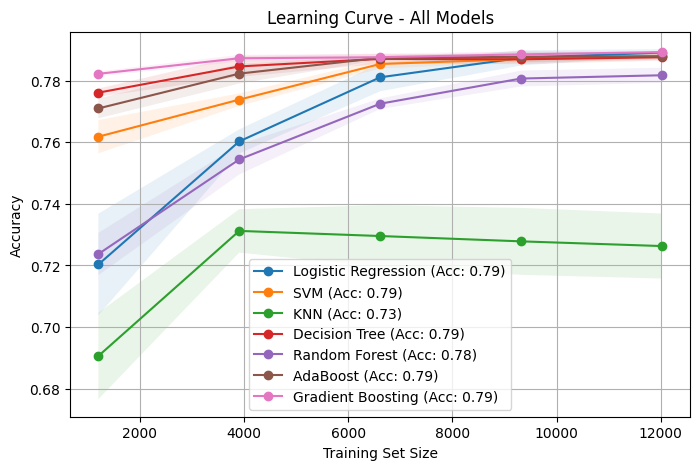


📊 Model Rankings by Test Accuracy:
              Model  Test Accuracy
                SVM       0.787064
           AdaBoost       0.786266
Logistic Regression       0.784402
      Decision Tree       0.784136
  Gradient Boosting       0.784136
      Random Forest       0.777482
                KNN       0.738355

🚀 Model evaluation, ranking, and saving completed!
⚠️ Models that failed: []


In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Create necessary directories
os.makedirs('data/processed_data', exist_ok=True)

# Define ML models (Updated Logistic Regression)
models = {
    "Logistic Regression": LogisticRegression(solver="saga", max_iter=5000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
}

failed_models = []

def process_data(final_cleaned_dataframes, TARGET_COLUMNS):
    """Detects missing values, merges all datasets, resets index, and saves processed data."""
    all_X = []
    all_y = []

    print("\n✅ Checking available dataframes and target columns...")
    print("Dataframes found:", list(final_cleaned_dataframes.keys()))
    print("Target columns expected:", TARGET_COLUMNS)

    for df_name, df in final_cleaned_dataframes.items():
        existing_target_columns = [col for col in df.columns if any(target in col for target in TARGET_COLUMNS)]

        if not existing_target_columns:
            print(f"⚠️ {df_name}: No matching target columns found.")
            continue

        print(f"\n🔍 Processing {df_name} - Found target columns: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"📌 Processing data for target: {target_column}")

            X = df.drop(columns=existing_target_columns)
            y = df[target_column]

            if y.nunique() == 1:
                print(f"⚠️ Skipping {df_name}_{target_column}: Only one class present.")
                continue

            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

            all_X.append(X)
            all_y.append(y)

    print(f"\n✅ Total datasets processed: {len(all_X)}")

    if not all_X or not all_y:
        msg = "🚨 No objects to concatenate. Check TARGET_COLUMNS or ensure target values vary."
        print(msg)
        raise ValueError(msg)

    X_combined = pd.concat(all_X, axis=0).reset_index(drop=True)
    y_combined = pd.concat(all_y, axis=0).reset_index(drop=True)

    print(f"\n✅ Final merged dataset shape: {X_combined.shape}, {y_combined.shape}")

    return X_combined, y_combined

def train_models(X_combined, y_combined):
    """Trains multiple ML models & evaluates performance."""
    print("\n🔍 Checking for NaN values...")
    imputer = SimpleImputer(strategy='mean')
    X_combined = pd.DataFrame(imputer.fit_transform(X_combined), columns=X_combined.columns)
    X_combined.dropna(inplace=True)
    y_combined.dropna(inplace=True)

    # Apply Standard Scaling
    scaler = StandardScaler()
    X_combined = pd.DataFrame(scaler.fit_transform(X_combined), columns=X_combined.columns)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

    model_results = {}

    plt.figure(figsize=(8, 5))

    for name, model in models.items():
        print(f"\n🚀 Training {name}...")
        try:
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            test_accuracy = accuracy_score(y_test, y_pred)
            model_results[name] = test_accuracy

            print(f"✅ {name}: Test Accuracy = {test_accuracy:.4f}")

            # Learning Curve
            train_sizes, train_scores, test_scores = learning_curve(
                model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5)
            )

            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)

            plt.plot(train_sizes, test_mean, marker='o', label=f"{name} (Acc: {test_mean[-1]:.2f})")
            plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

        except Exception as e:
            print(f"⚠️ Error training {name}: {e}")
            failed_models.append(name)

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve - All Models")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

    # Rank models
    print("\n📊 Model Rankings by Test Accuracy:")
    ranked_models = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
    ranking_df = pd.DataFrame(ranked_models, columns=["Model", "Test Accuracy"])
    print(ranking_df.to_string(index=False))

    # Save the top models
    best_models = ranked_models[:2]
    combined_X_train, combined_y_train = X_combined, y_combined

    for name, acc in best_models:
        model = models[name]
        model.fit(combined_X_train, combined_y_train)
        joblib.dump(model, f'models/machine_learning/{name.replace(" ", "_")}_combined.pkl')

    print("\n🚀 Model evaluation, ranking, and saving completed!")
    print(f"⚠️ Models that failed: {failed_models}")

# Run the pipeline
X_combined, y_combined = process_data(final_cleaned_dataframes, TARGET_COLUMNS)
train_models(X_combined, y_combined)

In [26]:
# %pip install xgboost
# %pip install lightgbm

In [27]:
# print("Unique values in y_train:", np.unique(y_train))
# print("Unique values in y_test:", np.unique(y_test))


🔍 Optimizing Random Forest for iris_dataset...
✅ Best Random Forest: Test Accuracy = 0.9500

🔍 Optimizing Logistic Regression for iris_dataset...
✅ Best Logistic Regression: Test Accuracy = 0.9667

🔍 Optimizing SVM for iris_dataset...
✅ Best SVM: Test Accuracy = 0.9750

🔍 Optimizing KNN for iris_dataset...
✅ Best KNN: Test Accuracy = 0.9583

🔍 Optimizing Decision Tree for iris_dataset...
✅ Best Decision Tree: Test Accuracy = 0.9500

🔍 Optimizing AdaBoost for iris_dataset...
✅ Best AdaBoost: Test Accuracy = 0.9667

🔍 Optimizing Gradient Boosting for iris_dataset...
✅ Best Gradient Boosting: Test Accuracy = 0.9500

📊 Ranking for iris_dataset:
              Model  Test Accuracy
                SVM       0.975000
Logistic Regression       0.966667
           AdaBoost       0.966667
                KNN       0.958333
      Random Forest       0.950000
      Decision Tree       0.950000
  Gradient Boosting       0.950000


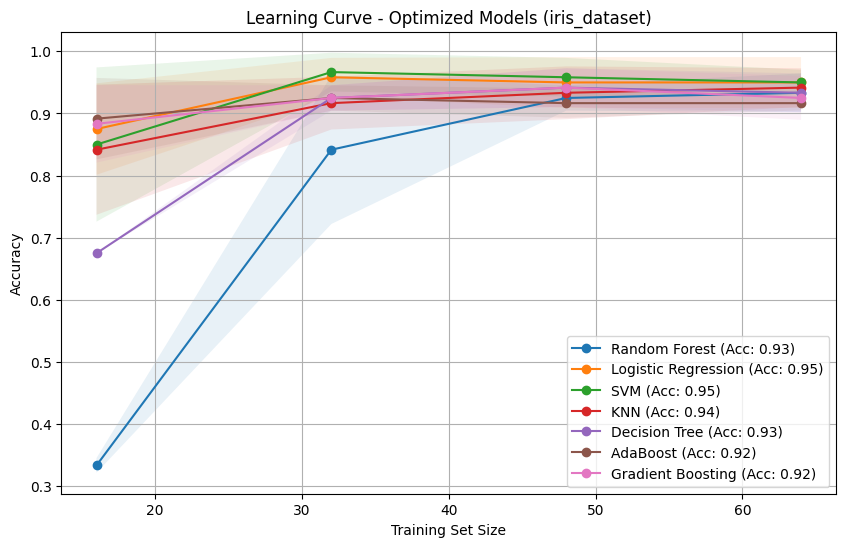


🚀 Hyperparameter tuning, ranking, and saving completed!
⚠️ Models that failed: []


In [33]:
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Create necessary directories
os.makedirs('plots', exist_ok=True)
os.makedirs('models/machine_learning', exist_ok=True)

# Define models and search spaces for Bayesian tuning
param_spaces = {
    "Random Forest": {
        'n_estimators': Integer(100, 1000),
        'max_depth': Integer(3, 30),
        'min_samples_split': Integer(2, 15),
        'max_features': Categorical(['sqrt', 'log2', None])
    },
    "Logistic Regression": {
        'C': Real(0.01, 10, prior='log-uniform'),
        'solver': Categorical(['liblinear', 'lbfgs', 'saga'])
    },
    "SVM": {
        'C': Real(0.1, 10, prior='log-uniform'),
        'gamma': Real(0.01, 1, prior='log-uniform'),
        'kernel': Categorical(['linear', 'rbf'])
    },
    "KNN": {
        'n_neighbors': Integer(3, 15),
        'weights': Categorical(['uniform', 'distance']),
        'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
    },
    "Decision Tree": {
        'max_depth': Integer(3, 20),
        'min_samples_split': Integer(2, 10)
    },
    "AdaBoost": {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 1, prior='log-uniform')
    },
    "Gradient Boosting": {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'max_depth': Integer(3, 15)
    }
}

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

failed_models = []

def optimize_model(model, param_space, X_train, y_train):
    """Bayesian optimization of hyperparameters."""
    opt = BayesSearchCV(
        model,
        param_space,
        n_iter=50,  # Number of optimization steps
        cv=3,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    opt.fit(X_train, y_train)
    return opt.best_estimator_, opt.best_score_

def plot_learning_curve(model, X_train, y_train, dataset_name, model_name):
    """Plots learning curves for all models in one graph."""
    try:
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1,
            train_sizes=np.linspace(0.2, 0.8, 4)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.plot(train_sizes, test_mean, marker='o', label=f"{model_name} (Acc: {test_mean[-1]:.2f})")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    except Exception as e:
        print(f"⚠️ Error generating learning curve for {model_name}: {e}")
        failed_models.append(model_name)

def tune_all_models(X_train, y_train, dataset_name):
    """Runs hyperparameter optimization, saves models, and ranks them."""
    best_models = {}

    plt.figure(figsize=(10, 6))  # Single plot for all learning curves

    for model_name, param_space in param_spaces.items():
        print(f"\n🔍 Optimizing {model_name} for {dataset_name}...")
        best_model, best_score = optimize_model(models[model_name], param_space, X_train, y_train)
        best_models[model_name] = (best_model, best_score)

        print(f"✅ Best {model_name}: Test Accuracy = {best_score:.4f}")
        joblib.dump(best_model, f'models/machine_learning/{model_name.replace(" ", "_")}_optimized.pkl')

        # Plot learning curves for all models in the same graph
        plot_learning_curve(best_model, X_train, y_train, dataset_name, model_name)

    # Rank models
    ranked_models = sorted(best_models.items(), key=lambda x: x[1][1], reverse=True)
    print(f"\n📊 Ranking for {dataset_name}:")
    ranking_df = pd.DataFrame({
        "Model": [model for model, _ in ranked_models],
        "Test Accuracy": [metrics[1] for _, metrics in ranked_models]
    })
    print(ranking_df.to_string(index=False))

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve - Optimized Models ({dataset_name})")
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(f'plots/{dataset_name}_optimized_learning_curves.png')
    plt.show()
    plt.close()

    return ranked_models

# Example Data (Replace with Real `train_test_data`)
if "train_test_data" not in globals():
    from sklearn.datasets import load_iris
    iris = load_iris()
    X, y = pd.DataFrame(iris.data, columns=iris.feature_names), pd.Series(iris.target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_test_data = {"iris_dataset": (X_train, X_test, y_train, y_test)}

# Run model tuning
for dataset_name, (X_train, X_test, y_train, y_test) in train_test_data.items():
    ranked_models = tune_all_models(X_train, y_train, dataset_name)

print("\n🚀 Hyperparameter tuning, ranking, and saving completed!")
print(f"⚠️ Models that failed: {failed_models}")

In [29]:
# %pip install scikit-optimize

<!-- ## Deep Learning -->

In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_train_test_data(final_cleaned_dataframes, TARGET_COLUMNS):
    """Extracts and splits data for training/testing."""
    if not final_cleaned_dataframes:
        raise ValueError("🚨 No available datasets!")

    # Use first available dataset
    df_name, df = list(final_cleaned_dataframes.items())[0]
    existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns]

    if not existing_target_columns:
        raise ValueError("🚨 No target columns found!")

    target_column = existing_target_columns[0]
    X = df.drop(columns=existing_target_columns)  # Features
    y = df[target_column]  # Target

    return train_test_split(X, y, test_size=0.2, random_state=42)

def process_text_features(X_train, X_test):
    """Transforms text features using TF-IDF."""
    text_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
    print(f"📌 Text columns detected: {text_columns}")

    # Initialize text feature storage
    if text_columns:
        vectorizer = TfidfVectorizer(max_features=500)
        X_train_text = pd.DataFrame(vectorizer.fit_transform(X_train[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_train.index)
        X_test_text = pd.DataFrame(vectorizer.transform(X_test[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)).toarray(), index=X_test.index)
    else:
        print("⚠️ No text columns detected. Skipping text feature processing.")
        X_train_text = pd.DataFrame(index=X_train.index)
        X_test_text = pd.DataFrame(index=X_test.index)

    return X_train_text, X_test_text

def preprocess_numerical_features(X_train, X_test):
    """Standardizes numerical features."""
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(exclude=["object"])), columns=X_train.select_dtypes(exclude=["object"]).columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(exclude=["object"])), columns=X_test.select_dtypes(exclude=["object"]).columns, index=X_test.index)

    return X_train_scaled, X_test_scaled

def combine_features(X_train_scaled, X_train_text, X_test_scaled, X_test_text):
    """Ensures feature alignment and combines text & numerical features."""
    X_train_combined = np.hstack([X_train_scaled, X_train_text])
    X_test_combined = np.hstack([X_test_scaled, X_test_text])

    print(f"✅ Final X_train_combined shape: {X_train_combined.shape}")
    print(f"✅ Final X_test_combined shape: {X_test_combined.shape}")

    return X_train_combined, X_test_combined

# Load & process data
X_train, X_test, y_train, y_test = prepare_train_test_data(final_cleaned_dataframes, TARGET_COLUMNS)
X_train_text, X_test_text = process_text_features(X_train, X_test)
X_train_scaled, X_test_scaled = preprocess_numerical_features(X_train, X_test)
X_train_combined, X_test_combined = combine_features(X_train_scaled, X_train_text, X_test_scaled, X_test_text)

ValueError: 🚨 No target columns found!

<!-- 🔹 BERT or GPT → If text has complex relationships
🔹 LSTM or GRU → If text has sequential meaning
🔹 CNN for NLP → If local word patterns matte


🚀 Machine Learning Models
If your data is structured (numerical/tabular), traditional ML methods may work well: ✅ Decision Trees & Random Forest → Good for structured data, feature importance analysis
✅ Gradient Boosting (XGBoost, LightGBM, CatBoost) → Powerful for tabular data with boosting techniques
✅ Support Vector Machines (SVM) → Great for classification problems
✅ K-Nearest Neighbors (KNN) → Simple but useful for certain cases
✅ Logistic Regression → Best for binary classification
🔥 Deep Learning Architectures
If you have images, text, or highly complex patterns, DL might be a better choice: ✅ Convolutional Neural Networks (CNNs) → Best for image processing
✅ Recurrent Neural Networks (RNNs) & LSTMs → Designed for sequential data (like time series or language models)
✅ Transformers (BERT, GPT) → Cutting-edge for NLP and deep sequence understanding
✅ Autoencoders & GANs → Used for generative tasks or anomaly detection
 -->
